In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
import optuna
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [6]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [7]:
X = data.drop(columns = ['quality'])
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
dtc = DecisionTreeClassifier(random_state = RANDOM_STATE)
bc = BaggingClassifier(n_estimators = 100, random_state = RANDOM_STATE)
rfc = RandomForestClassifier(n_estimators = 100, random_state = RANDOM_STATE)

dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

bc.fit(X_train, y_train)
pred_bc = bc.predict(X_test)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

acc_DT = accuracy_score(y_test, pred_dtc)
acc_Bagging = accuracy_score(y_test, pred_bc)
acc_RF = accuracy_score(y_test, pred_rfc)

### Ваш код ###

#acc_DT = 0
#acc_Bagging = 0
#acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

In [9]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



<AxesSubplot:xlabel='tree_cnt'>

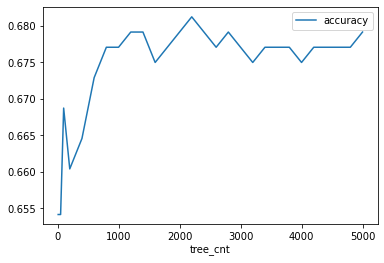

In [10]:
s = [10, 50, 100] + list(range(200, 5001, 200))
tmp_results =  pd.DataFrame(columns = ['tree_cnt', 'accuracy'])

for i, trees in enumerate(s):
  rfc = RandomForestClassifier(n_estimators = trees , random_state = RANDOM_STATE)
  rfc.fit(X_train, y_train)
  pred_rfc = rfc.predict(X_test)
  tmp_results.loc[i] = [trees, accuracy_score(y_test, pred_rfc)]


tmp_results.plot(kind = 'line', x = 'tree_cnt', y= 'accuracy')

### Ваш код ###

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [11]:
le = LabelEncoder()
y_temp = le.fit_transform(y)
y_temp

g = GradientBoostingClassifier()
x = XGBClassifier()

acc_sklearn = np.array(cross_val_score(g, X, y, scoring = "accuracy")).mean()
acc_xgboost = np.array(cross_val_score(x, X, y_temp, scoring = "accuracy", error_score = "raise")).mean()

### Ваш код ###

#acc_sklearn = 0
#acc_xgboost = 0
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

In [12]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [13]:
par = {'learning_rate':np.linspace(0, 0.01, 10), 'n_estimators':range(1, 10), "max_depth":range(1, 5)}
gsg = GridSearchCV(g, par, scoring = "accuracy")
gsg.fit(X, y)

gsx = GridSearchCV(x, par, scoring = "accuracy")
gsx.fit(X, y_temp)

### Ваш код ###

best_params_sklearn = gsg.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = gsx.best_params_
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = gsg.best_score_
acc_xgboost_cv = gsx.best_score_
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 9}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.006666666666666666, 'max_depth': 3, 'n_estimators': 6}


In [14]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [15]:
lgb = LGBMClassifier()
cbc= CatBoostClassifier()

acc_lgb = np.array(cross_val_score(lgb, X, y, scoring = "accuracy")).mean()
acc_cbc = np.array(cross_val_score(cbc, X, y, scoring = "accuracy")).mean()

acc_lightgbm = acc_lgb
acc_catboost = acc_cbc

### Ваш код ###

#acc_lightgbm = 0
#acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

Learning rate set to 0.080126
0:	learn: 1.6829142	total: 155ms	remaining: 2m 35s
1:	learn: 1.5940547	total: 166ms	remaining: 1m 22s
2:	learn: 1.5175367	total: 176ms	remaining: 58.6s
3:	learn: 1.4573818	total: 186ms	remaining: 46.4s
4:	learn: 1.3986323	total: 197ms	remaining: 39.2s
5:	learn: 1.3493535	total: 208ms	remaining: 34.4s
6:	learn: 1.3018142	total: 218ms	remaining: 30.9s
7:	learn: 1.2635278	total: 226ms	remaining: 28s
8:	learn: 1.2288350	total: 235ms	remaining: 25.8s
9:	learn: 1.1965165	total: 244ms	remaining: 24.1s
10:	learn: 1.1667856	total: 254ms	remaining: 22.8s
11:	learn: 1.1415420	total: 261ms	remaining: 21.5s
12:	learn: 1.1189592	total: 272ms	remaining: 20.6s
13:	learn: 1.0971406	total: 279ms	remaining: 19.6s
14:	learn: 1.0774057	total: 289ms	remaining: 19s
15:	learn: 1.0589907	total: 296ms	remaining: 18.2s
16:	learn: 1.0444871	total: 305ms	remaining: 17.6s
17:	learn: 1.0287948	total: 313ms	remaining: 17.1s
18:	learn: 1.0152259	total: 322ms	remaining: 16.6s
19:	learn: 1.

169:	learn: 0.5270007	total: 1.65s	remaining: 8.06s
170:	learn: 0.5250455	total: 1.66s	remaining: 8.04s
171:	learn: 0.5231372	total: 1.67s	remaining: 8.03s
172:	learn: 0.5219469	total: 1.68s	remaining: 8.04s
173:	learn: 0.5204266	total: 1.69s	remaining: 8.02s
174:	learn: 0.5189848	total: 1.7s	remaining: 8s
175:	learn: 0.5173362	total: 1.7s	remaining: 7.98s
176:	learn: 0.5163165	total: 1.71s	remaining: 7.96s
177:	learn: 0.5144963	total: 1.72s	remaining: 7.94s
178:	learn: 0.5131795	total: 1.73s	remaining: 7.92s
179:	learn: 0.5115063	total: 1.73s	remaining: 7.9s
180:	learn: 0.5097465	total: 1.74s	remaining: 7.88s
181:	learn: 0.5074270	total: 1.75s	remaining: 7.87s
182:	learn: 0.5056929	total: 1.76s	remaining: 7.85s
183:	learn: 0.5045378	total: 1.76s	remaining: 7.83s
184:	learn: 0.5029112	total: 1.77s	remaining: 7.81s
185:	learn: 0.5018928	total: 1.78s	remaining: 7.79s
186:	learn: 0.5002399	total: 1.79s	remaining: 7.77s
187:	learn: 0.4983257	total: 1.8s	remaining: 7.76s
188:	learn: 0.49686

350:	learn: 0.3248951	total: 3.14s	remaining: 5.81s
351:	learn: 0.3242439	total: 3.15s	remaining: 5.8s
352:	learn: 0.3238282	total: 3.16s	remaining: 5.79s
353:	learn: 0.3226601	total: 3.17s	remaining: 5.78s
354:	learn: 0.3221505	total: 3.18s	remaining: 5.77s
355:	learn: 0.3216054	total: 3.18s	remaining: 5.76s
356:	learn: 0.3210868	total: 3.19s	remaining: 5.75s
357:	learn: 0.3200036	total: 3.2s	remaining: 5.74s
358:	learn: 0.3189699	total: 3.21s	remaining: 5.73s
359:	learn: 0.3184600	total: 3.22s	remaining: 5.72s
360:	learn: 0.3174605	total: 3.23s	remaining: 5.71s
361:	learn: 0.3165319	total: 3.24s	remaining: 5.71s
362:	learn: 0.3160165	total: 3.25s	remaining: 5.7s
363:	learn: 0.3154056	total: 3.26s	remaining: 5.69s
364:	learn: 0.3147798	total: 3.26s	remaining: 5.68s
365:	learn: 0.3137995	total: 3.27s	remaining: 5.67s
366:	learn: 0.3133096	total: 3.28s	remaining: 5.66s
367:	learn: 0.3127529	total: 3.29s	remaining: 5.65s
368:	learn: 0.3116724	total: 3.3s	remaining: 5.64s
369:	learn: 0.31

512:	learn: 0.2288845	total: 4.42s	remaining: 4.19s
513:	learn: 0.2283263	total: 4.43s	remaining: 4.18s
514:	learn: 0.2279643	total: 4.43s	remaining: 4.18s
515:	learn: 0.2272005	total: 4.44s	remaining: 4.17s
516:	learn: 0.2268566	total: 4.45s	remaining: 4.16s
517:	learn: 0.2265057	total: 4.46s	remaining: 4.15s
518:	learn: 0.2260005	total: 4.46s	remaining: 4.14s
519:	learn: 0.2254782	total: 4.47s	remaining: 4.13s
520:	learn: 0.2248631	total: 4.48s	remaining: 4.12s
521:	learn: 0.2243349	total: 4.49s	remaining: 4.11s
522:	learn: 0.2236116	total: 4.5s	remaining: 4.1s
523:	learn: 0.2233167	total: 4.51s	remaining: 4.09s
524:	learn: 0.2227254	total: 4.51s	remaining: 4.08s
525:	learn: 0.2221492	total: 4.52s	remaining: 4.08s
526:	learn: 0.2217103	total: 4.53s	remaining: 4.07s
527:	learn: 0.2212635	total: 4.54s	remaining: 4.05s
528:	learn: 0.2210729	total: 4.54s	remaining: 4.05s
529:	learn: 0.2207763	total: 4.55s	remaining: 4.04s
530:	learn: 0.2200812	total: 4.56s	remaining: 4.03s
531:	learn: 0.

678:	learn: 0.1645138	total: 5.7s	remaining: 2.69s
679:	learn: 0.1644126	total: 5.7s	remaining: 2.68s
680:	learn: 0.1641063	total: 5.71s	remaining: 2.67s
681:	learn: 0.1638337	total: 5.72s	remaining: 2.67s
682:	learn: 0.1635742	total: 5.73s	remaining: 2.66s
683:	learn: 0.1631675	total: 5.74s	remaining: 2.65s
684:	learn: 0.1627173	total: 5.74s	remaining: 2.64s
685:	learn: 0.1623836	total: 5.75s	remaining: 2.63s
686:	learn: 0.1621042	total: 5.76s	remaining: 2.62s
687:	learn: 0.1618856	total: 5.77s	remaining: 2.62s
688:	learn: 0.1616498	total: 5.78s	remaining: 2.61s
689:	learn: 0.1613022	total: 5.78s	remaining: 2.6s
690:	learn: 0.1611822	total: 5.79s	remaining: 2.59s
691:	learn: 0.1608399	total: 5.8s	remaining: 2.58s
692:	learn: 0.1605741	total: 5.8s	remaining: 2.57s
693:	learn: 0.1603546	total: 5.81s	remaining: 2.56s
694:	learn: 0.1600637	total: 5.82s	remaining: 2.55s
695:	learn: 0.1598550	total: 5.83s	remaining: 2.54s
696:	learn: 0.1596532	total: 5.84s	remaining: 2.54s
697:	learn: 0.159

839:	learn: 0.1272475	total: 6.99s	remaining: 1.33s
840:	learn: 0.1270857	total: 7s	remaining: 1.32s
841:	learn: 0.1267869	total: 7.01s	remaining: 1.31s
842:	learn: 0.1265001	total: 7.02s	remaining: 1.31s
843:	learn: 0.1263548	total: 7.03s	remaining: 1.3s
844:	learn: 0.1260982	total: 7.03s	remaining: 1.29s
845:	learn: 0.1259241	total: 7.04s	remaining: 1.28s
846:	learn: 0.1256509	total: 7.05s	remaining: 1.27s
847:	learn: 0.1254621	total: 7.05s	remaining: 1.26s
848:	learn: 0.1252372	total: 7.06s	remaining: 1.26s
849:	learn: 0.1249651	total: 7.07s	remaining: 1.25s
850:	learn: 0.1247999	total: 7.08s	remaining: 1.24s
851:	learn: 0.1245327	total: 7.08s	remaining: 1.23s
852:	learn: 0.1244360	total: 7.09s	remaining: 1.22s
853:	learn: 0.1242543	total: 7.1s	remaining: 1.21s
854:	learn: 0.1241408	total: 7.11s	remaining: 1.21s
855:	learn: 0.1239785	total: 7.12s	remaining: 1.2s
856:	learn: 0.1236832	total: 7.12s	remaining: 1.19s
857:	learn: 0.1234699	total: 7.13s	remaining: 1.18s
858:	learn: 0.1232

Learning rate set to 0.080126
0:	learn: 1.6840847	total: 11.8ms	remaining: 11.8s
1:	learn: 1.5978039	total: 20.4ms	remaining: 10.2s
2:	learn: 1.5257603	total: 27.7ms	remaining: 9.21s
3:	learn: 1.4631105	total: 34.5ms	remaining: 8.58s
4:	learn: 1.4066852	total: 45.5ms	remaining: 9.05s
5:	learn: 1.3562870	total: 52.8ms	remaining: 8.75s
6:	learn: 1.3106638	total: 60.5ms	remaining: 8.59s
7:	learn: 1.2734663	total: 67.3ms	remaining: 8.34s
8:	learn: 1.2377126	total: 74.8ms	remaining: 8.24s
9:	learn: 1.2070297	total: 82.1ms	remaining: 8.13s
10:	learn: 1.1785148	total: 90ms	remaining: 8.09s
11:	learn: 1.1519585	total: 98.4ms	remaining: 8.1s
12:	learn: 1.1294027	total: 107ms	remaining: 8.09s
13:	learn: 1.1075097	total: 114ms	remaining: 8.03s
14:	learn: 1.0858891	total: 122ms	remaining: 8.01s
15:	learn: 1.0700503	total: 131ms	remaining: 8.04s
16:	learn: 1.0544703	total: 138ms	remaining: 8s
17:	learn: 1.0377472	total: 146ms	remaining: 7.99s
18:	learn: 1.0225451	total: 160ms	remaining: 8.27s
19:	l

172:	learn: 0.5468170	total: 1.48s	remaining: 7.09s
173:	learn: 0.5451484	total: 1.49s	remaining: 7.08s
174:	learn: 0.5423718	total: 1.51s	remaining: 7.11s
175:	learn: 0.5409006	total: 1.52s	remaining: 7.13s
176:	learn: 0.5403445	total: 1.53s	remaining: 7.13s
177:	learn: 0.5383932	total: 1.54s	remaining: 7.12s
178:	learn: 0.5368731	total: 1.55s	remaining: 7.12s
179:	learn: 0.5349053	total: 1.56s	remaining: 7.1s
180:	learn: 0.5341363	total: 1.57s	remaining: 7.09s
181:	learn: 0.5315687	total: 1.57s	remaining: 7.08s
182:	learn: 0.5306685	total: 1.58s	remaining: 7.08s
183:	learn: 0.5289946	total: 1.59s	remaining: 7.07s
184:	learn: 0.5269182	total: 1.6s	remaining: 7.06s
185:	learn: 0.5259008	total: 1.61s	remaining: 7.05s
186:	learn: 0.5247950	total: 1.62s	remaining: 7.04s
187:	learn: 0.5241713	total: 1.63s	remaining: 7.03s
188:	learn: 0.5222136	total: 1.64s	remaining: 7.02s
189:	learn: 0.5196787	total: 1.64s	remaining: 7.01s
190:	learn: 0.5181697	total: 1.65s	remaining: 7s
191:	learn: 0.515

345:	learn: 0.3391274	total: 2.98s	remaining: 5.63s
346:	learn: 0.3384180	total: 2.98s	remaining: 5.62s
347:	learn: 0.3373498	total: 2.99s	remaining: 5.61s
348:	learn: 0.3363833	total: 3s	remaining: 5.6s
349:	learn: 0.3356847	total: 3.01s	remaining: 5.59s
350:	learn: 0.3350593	total: 3.02s	remaining: 5.58s
351:	learn: 0.3343845	total: 3.03s	remaining: 5.58s
352:	learn: 0.3335501	total: 3.04s	remaining: 5.57s
353:	learn: 0.3328392	total: 3.04s	remaining: 5.56s
354:	learn: 0.3323134	total: 3.05s	remaining: 5.55s
355:	learn: 0.3315295	total: 3.06s	remaining: 5.54s
356:	learn: 0.3305690	total: 3.07s	remaining: 5.53s
357:	learn: 0.3295395	total: 3.08s	remaining: 5.52s
358:	learn: 0.3286336	total: 3.08s	remaining: 5.51s
359:	learn: 0.3277383	total: 3.09s	remaining: 5.5s
360:	learn: 0.3270869	total: 3.1s	remaining: 5.49s
361:	learn: 0.3265736	total: 3.11s	remaining: 5.48s
362:	learn: 0.3261228	total: 3.12s	remaining: 5.47s
363:	learn: 0.3255540	total: 3.12s	remaining: 5.46s
364:	learn: 0.3249

524:	learn: 0.2268927	total: 4.44s	remaining: 4.01s
525:	learn: 0.2264518	total: 4.44s	remaining: 4s
526:	learn: 0.2256040	total: 4.45s	remaining: 4s
527:	learn: 0.2251739	total: 4.46s	remaining: 3.99s
528:	learn: 0.2248919	total: 4.47s	remaining: 3.98s
529:	learn: 0.2243926	total: 4.48s	remaining: 3.97s
530:	learn: 0.2237248	total: 4.48s	remaining: 3.96s
531:	learn: 0.2233128	total: 4.49s	remaining: 3.95s
532:	learn: 0.2228956	total: 4.5s	remaining: 3.94s
533:	learn: 0.2223221	total: 4.5s	remaining: 3.93s
534:	learn: 0.2218276	total: 4.51s	remaining: 3.92s
535:	learn: 0.2213394	total: 4.52s	remaining: 3.91s
536:	learn: 0.2208503	total: 4.53s	remaining: 3.9s
537:	learn: 0.2205819	total: 4.53s	remaining: 3.89s
538:	learn: 0.2201948	total: 4.54s	remaining: 3.88s
539:	learn: 0.2196190	total: 4.55s	remaining: 3.87s
540:	learn: 0.2194058	total: 4.56s	remaining: 3.87s
541:	learn: 0.2188541	total: 4.56s	remaining: 3.86s
542:	learn: 0.2183868	total: 4.57s	remaining: 3.85s
543:	learn: 0.2177752

693:	learn: 0.1666048	total: 5.73s	remaining: 2.52s
694:	learn: 0.1663255	total: 5.74s	remaining: 2.52s
695:	learn: 0.1661594	total: 5.74s	remaining: 2.51s
696:	learn: 0.1657807	total: 5.75s	remaining: 2.5s
697:	learn: 0.1653123	total: 5.76s	remaining: 2.49s
698:	learn: 0.1650936	total: 5.76s	remaining: 2.48s
699:	learn: 0.1649033	total: 5.77s	remaining: 2.47s
700:	learn: 0.1646162	total: 5.78s	remaining: 2.46s
701:	learn: 0.1644578	total: 5.79s	remaining: 2.46s
702:	learn: 0.1642065	total: 5.8s	remaining: 2.45s
703:	learn: 0.1639282	total: 5.8s	remaining: 2.44s
704:	learn: 0.1636198	total: 5.81s	remaining: 2.43s
705:	learn: 0.1633852	total: 5.82s	remaining: 2.42s
706:	learn: 0.1629611	total: 5.83s	remaining: 2.41s
707:	learn: 0.1628098	total: 5.83s	remaining: 2.4s
708:	learn: 0.1626598	total: 5.84s	remaining: 2.4s
709:	learn: 0.1623938	total: 5.85s	remaining: 2.39s
710:	learn: 0.1622555	total: 5.85s	remaining: 2.38s
711:	learn: 0.1618813	total: 5.86s	remaining: 2.37s
712:	learn: 0.161

863:	learn: 0.1261372	total: 7.01s	remaining: 1.1s
864:	learn: 0.1258912	total: 7.02s	remaining: 1.09s
865:	learn: 0.1257261	total: 7.02s	remaining: 1.09s
866:	learn: 0.1254739	total: 7.03s	remaining: 1.08s
867:	learn: 0.1252815	total: 7.04s	remaining: 1.07s
868:	learn: 0.1250005	total: 7.05s	remaining: 1.06s
869:	learn: 0.1248487	total: 7.05s	remaining: 1.05s
870:	learn: 0.1247146	total: 7.06s	remaining: 1.05s
871:	learn: 0.1246235	total: 7.07s	remaining: 1.04s
872:	learn: 0.1244535	total: 7.08s	remaining: 1.03s
873:	learn: 0.1241815	total: 7.08s	remaining: 1.02s
874:	learn: 0.1240661	total: 7.09s	remaining: 1.01s
875:	learn: 0.1239151	total: 7.1s	remaining: 1s
876:	learn: 0.1237052	total: 7.11s	remaining: 997ms
877:	learn: 0.1236060	total: 7.12s	remaining: 989ms
878:	learn: 0.1233486	total: 7.12s	remaining: 981ms
879:	learn: 0.1230123	total: 7.13s	remaining: 972ms
880:	learn: 0.1228617	total: 7.14s	remaining: 964ms
881:	learn: 0.1225303	total: 7.14s	remaining: 956ms
882:	learn: 0.122

24:	learn: 0.9681532	total: 199ms	remaining: 7.75s
25:	learn: 0.9581810	total: 207ms	remaining: 7.75s
26:	learn: 0.9486378	total: 216ms	remaining: 7.77s
27:	learn: 0.9392594	total: 223ms	remaining: 7.73s
28:	learn: 0.9320832	total: 230ms	remaining: 7.72s
29:	learn: 0.9253473	total: 239ms	remaining: 7.71s
30:	learn: 0.9189705	total: 246ms	remaining: 7.68s
31:	learn: 0.9112920	total: 253ms	remaining: 7.64s
32:	learn: 0.9045347	total: 260ms	remaining: 7.61s
33:	learn: 0.8971980	total: 267ms	remaining: 7.58s
34:	learn: 0.8907502	total: 274ms	remaining: 7.56s
35:	learn: 0.8861688	total: 283ms	remaining: 7.57s
36:	learn: 0.8799876	total: 290ms	remaining: 7.54s
37:	learn: 0.8753575	total: 297ms	remaining: 7.53s
38:	learn: 0.8716160	total: 304ms	remaining: 7.5s
39:	learn: 0.8669613	total: 311ms	remaining: 7.47s
40:	learn: 0.8626042	total: 319ms	remaining: 7.45s
41:	learn: 0.8578934	total: 326ms	remaining: 7.45s
42:	learn: 0.8539124	total: 335ms	remaining: 7.45s
43:	learn: 0.8502529	total: 342m

188:	learn: 0.5294647	total: 1.48s	remaining: 6.34s
189:	learn: 0.5285029	total: 1.49s	remaining: 6.33s
190:	learn: 0.5272674	total: 1.49s	remaining: 6.33s
191:	learn: 0.5252965	total: 1.5s	remaining: 6.32s
192:	learn: 0.5241122	total: 1.51s	remaining: 6.31s
193:	learn: 0.5225003	total: 1.52s	remaining: 6.3s
194:	learn: 0.5203216	total: 1.52s	remaining: 6.29s
195:	learn: 0.5185018	total: 1.53s	remaining: 6.29s
196:	learn: 0.5181601	total: 1.54s	remaining: 6.28s
197:	learn: 0.5172341	total: 1.55s	remaining: 6.27s
198:	learn: 0.5151797	total: 1.56s	remaining: 6.26s
199:	learn: 0.5130580	total: 1.56s	remaining: 6.26s
200:	learn: 0.5124734	total: 1.57s	remaining: 6.25s
201:	learn: 0.5103534	total: 1.58s	remaining: 6.24s
202:	learn: 0.5093462	total: 1.59s	remaining: 6.23s
203:	learn: 0.5076391	total: 1.59s	remaining: 6.21s
204:	learn: 0.5070853	total: 1.6s	remaining: 6.21s
205:	learn: 0.5059308	total: 1.61s	remaining: 6.2s
206:	learn: 0.5041469	total: 1.61s	remaining: 6.18s
207:	learn: 0.50

354:	learn: 0.3461971	total: 2.75s	remaining: 5s
355:	learn: 0.3455191	total: 2.76s	remaining: 5s
356:	learn: 0.3450580	total: 2.77s	remaining: 4.99s
357:	learn: 0.3440247	total: 2.78s	remaining: 4.98s
358:	learn: 0.3433066	total: 2.79s	remaining: 4.98s
359:	learn: 0.3426193	total: 2.79s	remaining: 4.97s
360:	learn: 0.3420286	total: 2.8s	remaining: 4.96s
361:	learn: 0.3417445	total: 2.81s	remaining: 4.95s
362:	learn: 0.3411256	total: 2.82s	remaining: 4.94s
363:	learn: 0.3403779	total: 2.82s	remaining: 4.93s
364:	learn: 0.3393192	total: 2.83s	remaining: 4.93s
365:	learn: 0.3388845	total: 2.84s	remaining: 4.92s
366:	learn: 0.3383643	total: 2.85s	remaining: 4.91s
367:	learn: 0.3374657	total: 2.85s	remaining: 4.9s
368:	learn: 0.3361077	total: 2.86s	remaining: 4.9s
369:	learn: 0.3352809	total: 2.87s	remaining: 4.89s
370:	learn: 0.3344412	total: 2.88s	remaining: 4.88s
371:	learn: 0.3334419	total: 2.88s	remaining: 4.87s
372:	learn: 0.3325876	total: 2.89s	remaining: 4.86s
373:	learn: 0.3318717

520:	learn: 0.2393747	total: 4.04s	remaining: 3.71s
521:	learn: 0.2388244	total: 4.04s	remaining: 3.7s
522:	learn: 0.2383741	total: 4.05s	remaining: 3.7s
523:	learn: 0.2380288	total: 4.06s	remaining: 3.69s
524:	learn: 0.2375878	total: 4.07s	remaining: 3.68s
525:	learn: 0.2369332	total: 4.08s	remaining: 3.67s
526:	learn: 0.2364359	total: 4.08s	remaining: 3.67s
527:	learn: 0.2361520	total: 4.09s	remaining: 3.66s
528:	learn: 0.2356340	total: 4.1s	remaining: 3.65s
529:	learn: 0.2351506	total: 4.11s	remaining: 3.64s
530:	learn: 0.2346550	total: 4.12s	remaining: 3.63s
531:	learn: 0.2341771	total: 4.12s	remaining: 3.63s
532:	learn: 0.2337543	total: 4.13s	remaining: 3.62s
533:	learn: 0.2333112	total: 4.14s	remaining: 3.61s
534:	learn: 0.2330745	total: 4.15s	remaining: 3.6s
535:	learn: 0.2323915	total: 4.15s	remaining: 3.6s
536:	learn: 0.2318431	total: 4.16s	remaining: 3.59s
537:	learn: 0.2311364	total: 4.17s	remaining: 3.58s
538:	learn: 0.2309154	total: 4.18s	remaining: 3.57s
539:	learn: 0.230

683:	learn: 0.1749751	total: 5.34s	remaining: 2.46s
684:	learn: 0.1747921	total: 5.34s	remaining: 2.46s
685:	learn: 0.1746634	total: 5.35s	remaining: 2.45s
686:	learn: 0.1742716	total: 5.36s	remaining: 2.44s
687:	learn: 0.1738171	total: 5.37s	remaining: 2.43s
688:	learn: 0.1735287	total: 5.38s	remaining: 2.43s
689:	learn: 0.1731643	total: 5.38s	remaining: 2.42s
690:	learn: 0.1729648	total: 5.39s	remaining: 2.41s
691:	learn: 0.1729346	total: 5.39s	remaining: 2.4s
692:	learn: 0.1723829	total: 5.4s	remaining: 2.39s
693:	learn: 0.1720841	total: 5.41s	remaining: 2.38s
694:	learn: 0.1718325	total: 5.42s	remaining: 2.38s
695:	learn: 0.1717052	total: 5.42s	remaining: 2.37s
696:	learn: 0.1714790	total: 5.43s	remaining: 2.36s
697:	learn: 0.1712306	total: 5.44s	remaining: 2.35s
698:	learn: 0.1709322	total: 5.45s	remaining: 2.35s
699:	learn: 0.1705416	total: 5.46s	remaining: 2.34s
700:	learn: 0.1703158	total: 5.46s	remaining: 2.33s
701:	learn: 0.1698897	total: 5.47s	remaining: 2.32s
702:	learn: 0.

847:	learn: 0.1357845	total: 6.61s	remaining: 1.19s
848:	learn: 0.1355574	total: 6.62s	remaining: 1.18s
849:	learn: 0.1353013	total: 6.63s	remaining: 1.17s
850:	learn: 0.1350653	total: 6.64s	remaining: 1.16s
851:	learn: 0.1348515	total: 6.65s	remaining: 1.15s
852:	learn: 0.1346982	total: 6.65s	remaining: 1.15s
853:	learn: 0.1345455	total: 6.66s	remaining: 1.14s
854:	learn: 0.1344063	total: 6.67s	remaining: 1.13s
855:	learn: 0.1342027	total: 6.68s	remaining: 1.12s
856:	learn: 0.1340700	total: 6.68s	remaining: 1.11s
857:	learn: 0.1338694	total: 6.7s	remaining: 1.11s
858:	learn: 0.1335859	total: 6.71s	remaining: 1.1s
859:	learn: 0.1334517	total: 6.71s	remaining: 1.09s
860:	learn: 0.1332457	total: 6.72s	remaining: 1.08s
861:	learn: 0.1330578	total: 6.73s	remaining: 1.08s
862:	learn: 0.1329112	total: 6.74s	remaining: 1.07s
863:	learn: 0.1327440	total: 6.75s	remaining: 1.06s
864:	learn: 0.1326055	total: 6.75s	remaining: 1.05s
865:	learn: 0.1325075	total: 6.76s	remaining: 1.05s
866:	learn: 0.

26:	learn: 0.9327310	total: 214ms	remaining: 7.72s
27:	learn: 0.9248994	total: 223ms	remaining: 7.75s
28:	learn: 0.9183338	total: 232ms	remaining: 7.77s
29:	learn: 0.9110382	total: 240ms	remaining: 7.75s
30:	learn: 0.9054243	total: 247ms	remaining: 7.73s
31:	learn: 0.8991784	total: 255ms	remaining: 7.72s
32:	learn: 0.8928995	total: 263ms	remaining: 7.72s
33:	learn: 0.8863983	total: 271ms	remaining: 7.69s
34:	learn: 0.8782515	total: 279ms	remaining: 7.68s
35:	learn: 0.8723190	total: 287ms	remaining: 7.68s
36:	learn: 0.8671644	total: 294ms	remaining: 7.66s
37:	learn: 0.8618355	total: 303ms	remaining: 7.66s
38:	learn: 0.8563884	total: 310ms	remaining: 7.64s
39:	learn: 0.8513855	total: 318ms	remaining: 7.63s
40:	learn: 0.8474891	total: 326ms	remaining: 7.62s
41:	learn: 0.8416086	total: 334ms	remaining: 7.62s
42:	learn: 0.8383906	total: 342ms	remaining: 7.61s
43:	learn: 0.8337874	total: 350ms	remaining: 7.6s
44:	learn: 0.8297850	total: 358ms	remaining: 7.59s
45:	learn: 0.8260110	total: 366m

193:	learn: 0.5288662	total: 1.54s	remaining: 6.41s
194:	learn: 0.5277368	total: 1.55s	remaining: 6.4s
195:	learn: 0.5266698	total: 1.56s	remaining: 6.4s
196:	learn: 0.5249044	total: 1.57s	remaining: 6.39s
197:	learn: 0.5242579	total: 1.57s	remaining: 6.38s
198:	learn: 0.5231838	total: 1.58s	remaining: 6.37s
199:	learn: 0.5212958	total: 1.59s	remaining: 6.36s
200:	learn: 0.5204984	total: 1.6s	remaining: 6.36s
201:	learn: 0.5177290	total: 1.61s	remaining: 6.34s
202:	learn: 0.5165313	total: 1.61s	remaining: 6.33s
203:	learn: 0.5148328	total: 1.62s	remaining: 6.33s
204:	learn: 0.5136346	total: 1.63s	remaining: 6.32s
205:	learn: 0.5123359	total: 1.64s	remaining: 6.31s
206:	learn: 0.5111955	total: 1.64s	remaining: 6.3s
207:	learn: 0.5097729	total: 1.65s	remaining: 6.29s
208:	learn: 0.5081185	total: 1.66s	remaining: 6.28s
209:	learn: 0.5067985	total: 1.67s	remaining: 6.27s
210:	learn: 0.5053257	total: 1.68s	remaining: 6.26s
211:	learn: 0.5037243	total: 1.68s	remaining: 6.26s
212:	learn: 0.50

356:	learn: 0.3559243	total: 2.82s	remaining: 5.08s
357:	learn: 0.3552831	total: 2.83s	remaining: 5.07s
358:	learn: 0.3547557	total: 2.84s	remaining: 5.06s
359:	learn: 0.3542011	total: 2.84s	remaining: 5.06s
360:	learn: 0.3531647	total: 2.85s	remaining: 5.05s
361:	learn: 0.3520893	total: 2.86s	remaining: 5.04s
362:	learn: 0.3511755	total: 2.87s	remaining: 5.03s
363:	learn: 0.3501613	total: 2.88s	remaining: 5.03s
364:	learn: 0.3486379	total: 2.88s	remaining: 5.02s
365:	learn: 0.3478542	total: 2.89s	remaining: 5.01s
366:	learn: 0.3469563	total: 2.9s	remaining: 5s
367:	learn: 0.3456187	total: 2.91s	remaining: 4.99s
368:	learn: 0.3447314	total: 2.92s	remaining: 4.99s
369:	learn: 0.3440149	total: 2.92s	remaining: 4.98s
370:	learn: 0.3434785	total: 2.93s	remaining: 4.97s
371:	learn: 0.3419798	total: 2.94s	remaining: 4.96s
372:	learn: 0.3414747	total: 2.95s	remaining: 4.95s
373:	learn: 0.3410107	total: 2.95s	remaining: 4.94s
374:	learn: 0.3403813	total: 2.96s	remaining: 4.94s
375:	learn: 0.33

518:	learn: 0.2513677	total: 4.1s	remaining: 3.8s
519:	learn: 0.2507210	total: 4.11s	remaining: 3.79s
520:	learn: 0.2500787	total: 4.12s	remaining: 3.79s
521:	learn: 0.2495211	total: 4.12s	remaining: 3.78s
522:	learn: 0.2490087	total: 4.13s	remaining: 3.77s
523:	learn: 0.2483830	total: 4.14s	remaining: 3.76s
524:	learn: 0.2479883	total: 4.15s	remaining: 3.75s
525:	learn: 0.2472084	total: 4.16s	remaining: 3.75s
526:	learn: 0.2466687	total: 4.16s	remaining: 3.74s
527:	learn: 0.2463419	total: 4.17s	remaining: 3.73s
528:	learn: 0.2458363	total: 4.18s	remaining: 3.72s
529:	learn: 0.2453140	total: 4.19s	remaining: 3.71s
530:	learn: 0.2447282	total: 4.2s	remaining: 3.71s
531:	learn: 0.2442630	total: 4.2s	remaining: 3.7s
532:	learn: 0.2433976	total: 4.21s	remaining: 3.69s
533:	learn: 0.2429928	total: 4.22s	remaining: 3.68s
534:	learn: 0.2425355	total: 4.23s	remaining: 3.67s
535:	learn: 0.2421542	total: 4.23s	remaining: 3.67s
536:	learn: 0.2417157	total: 4.24s	remaining: 3.66s
537:	learn: 0.241

680:	learn: 0.1865522	total: 5.37s	remaining: 2.51s
681:	learn: 0.1860526	total: 5.37s	remaining: 2.5s
682:	learn: 0.1857698	total: 5.38s	remaining: 2.5s
683:	learn: 0.1855097	total: 5.39s	remaining: 2.49s
684:	learn: 0.1850727	total: 5.4s	remaining: 2.48s
685:	learn: 0.1847874	total: 5.41s	remaining: 2.47s
686:	learn: 0.1844486	total: 5.41s	remaining: 2.47s
687:	learn: 0.1842546	total: 5.42s	remaining: 2.46s
688:	learn: 0.1838501	total: 5.43s	remaining: 2.45s
689:	learn: 0.1835546	total: 5.43s	remaining: 2.44s
690:	learn: 0.1833894	total: 5.44s	remaining: 2.43s
691:	learn: 0.1831339	total: 5.45s	remaining: 2.42s
692:	learn: 0.1828263	total: 5.46s	remaining: 2.42s
693:	learn: 0.1826660	total: 5.46s	remaining: 2.41s
694:	learn: 0.1823476	total: 5.47s	remaining: 2.4s
695:	learn: 0.1820308	total: 5.48s	remaining: 2.39s
696:	learn: 0.1816743	total: 5.49s	remaining: 2.39s
697:	learn: 0.1814429	total: 5.5s	remaining: 2.38s
698:	learn: 0.1810134	total: 5.5s	remaining: 2.37s
699:	learn: 0.1806

845:	learn: 0.1434098	total: 6.65s	remaining: 1.21s
846:	learn: 0.1431790	total: 6.66s	remaining: 1.2s
847:	learn: 0.1428820	total: 6.66s	remaining: 1.19s
848:	learn: 0.1426650	total: 6.67s	remaining: 1.19s
849:	learn: 0.1423848	total: 6.68s	remaining: 1.18s
850:	learn: 0.1422161	total: 6.69s	remaining: 1.17s
851:	learn: 0.1421049	total: 6.7s	remaining: 1.16s
852:	learn: 0.1419318	total: 6.7s	remaining: 1.16s
853:	learn: 0.1418058	total: 6.71s	remaining: 1.15s
854:	learn: 0.1416846	total: 6.72s	remaining: 1.14s
855:	learn: 0.1414363	total: 6.73s	remaining: 1.13s
856:	learn: 0.1411447	total: 6.73s	remaining: 1.12s
857:	learn: 0.1409037	total: 6.74s	remaining: 1.11s
858:	learn: 0.1407526	total: 6.75s	remaining: 1.11s
859:	learn: 0.1404790	total: 6.76s	remaining: 1.1s
860:	learn: 0.1402942	total: 6.77s	remaining: 1.09s
861:	learn: 0.1401498	total: 6.77s	remaining: 1.08s
862:	learn: 0.1399837	total: 6.78s	remaining: 1.08s
863:	learn: 0.1398143	total: 6.79s	remaining: 1.07s
864:	learn: 0.13

22:	learn: 0.9752634	total: 193ms	remaining: 8.2s
23:	learn: 0.9644049	total: 203ms	remaining: 8.24s
24:	learn: 0.9544808	total: 211ms	remaining: 8.25s
25:	learn: 0.9458778	total: 219ms	remaining: 8.21s
26:	learn: 0.9382258	total: 227ms	remaining: 8.18s
27:	learn: 0.9292684	total: 235ms	remaining: 8.16s
28:	learn: 0.9218072	total: 243ms	remaining: 8.13s
29:	learn: 0.9129614	total: 251ms	remaining: 8.1s
30:	learn: 0.9069511	total: 258ms	remaining: 8.05s
31:	learn: 0.9006937	total: 265ms	remaining: 8.01s
32:	learn: 0.8947128	total: 272ms	remaining: 7.97s
33:	learn: 0.8898082	total: 279ms	remaining: 7.94s
34:	learn: 0.8849363	total: 287ms	remaining: 7.91s
35:	learn: 0.8795608	total: 294ms	remaining: 7.88s
36:	learn: 0.8740574	total: 302ms	remaining: 7.85s
37:	learn: 0.8693586	total: 309ms	remaining: 7.81s
38:	learn: 0.8646597	total: 316ms	remaining: 7.8s
39:	learn: 0.8595065	total: 324ms	remaining: 7.77s
40:	learn: 0.8553630	total: 331ms	remaining: 7.75s
41:	learn: 0.8507407	total: 339ms	

187:	learn: 0.5397166	total: 1.5s	remaining: 6.47s
188:	learn: 0.5382223	total: 1.5s	remaining: 6.46s
189:	learn: 0.5362690	total: 1.51s	remaining: 6.46s
190:	learn: 0.5344521	total: 1.52s	remaining: 6.45s
191:	learn: 0.5322240	total: 1.53s	remaining: 6.44s
192:	learn: 0.5311317	total: 1.54s	remaining: 6.43s
193:	learn: 0.5290998	total: 1.55s	remaining: 6.42s
194:	learn: 0.5277178	total: 1.55s	remaining: 6.42s
195:	learn: 0.5267258	total: 1.57s	remaining: 6.43s
196:	learn: 0.5264844	total: 1.57s	remaining: 6.42s
197:	learn: 0.5254300	total: 1.58s	remaining: 6.41s
198:	learn: 0.5238593	total: 1.59s	remaining: 6.4s
199:	learn: 0.5228304	total: 1.6s	remaining: 6.39s
200:	learn: 0.5209856	total: 1.6s	remaining: 6.38s
201:	learn: 0.5186701	total: 1.61s	remaining: 6.37s
202:	learn: 0.5175596	total: 1.62s	remaining: 6.37s
203:	learn: 0.5163397	total: 1.63s	remaining: 6.36s
204:	learn: 0.5150086	total: 1.64s	remaining: 6.35s
205:	learn: 0.5140876	total: 1.64s	remaining: 6.34s
206:	learn: 0.511

348:	learn: 0.3529423	total: 2.76s	remaining: 5.14s
349:	learn: 0.3519112	total: 2.77s	remaining: 5.14s
350:	learn: 0.3512001	total: 2.77s	remaining: 5.13s
351:	learn: 0.3504396	total: 2.78s	remaining: 5.12s
352:	learn: 0.3499474	total: 2.79s	remaining: 5.11s
353:	learn: 0.3491041	total: 2.8s	remaining: 5.11s
354:	learn: 0.3482887	total: 2.81s	remaining: 5.1s
355:	learn: 0.3475744	total: 2.81s	remaining: 5.09s
356:	learn: 0.3470409	total: 2.82s	remaining: 5.08s
357:	learn: 0.3464309	total: 2.83s	remaining: 5.07s
358:	learn: 0.3459411	total: 2.84s	remaining: 5.06s
359:	learn: 0.3450515	total: 2.84s	remaining: 5.06s
360:	learn: 0.3445623	total: 2.85s	remaining: 5.05s
361:	learn: 0.3442709	total: 2.86s	remaining: 5.04s
362:	learn: 0.3436333	total: 2.87s	remaining: 5.03s
363:	learn: 0.3428324	total: 2.88s	remaining: 5.02s
364:	learn: 0.3423372	total: 2.88s	remaining: 5.02s
365:	learn: 0.3416048	total: 2.89s	remaining: 5.01s
366:	learn: 0.3406496	total: 2.9s	remaining: 5s
367:	learn: 0.3396

512:	learn: 0.2483168	total: 4.04s	remaining: 3.84s
513:	learn: 0.2479814	total: 4.05s	remaining: 3.83s
514:	learn: 0.2478193	total: 4.06s	remaining: 3.82s
515:	learn: 0.2475632	total: 4.07s	remaining: 3.82s
516:	learn: 0.2467396	total: 4.08s	remaining: 3.81s
517:	learn: 0.2459245	total: 4.08s	remaining: 3.8s
518:	learn: 0.2452443	total: 4.09s	remaining: 3.79s
519:	learn: 0.2450509	total: 4.1s	remaining: 3.78s
520:	learn: 0.2442606	total: 4.11s	remaining: 3.78s
521:	learn: 0.2436398	total: 4.12s	remaining: 3.77s
522:	learn: 0.2429056	total: 4.12s	remaining: 3.76s
523:	learn: 0.2424607	total: 4.13s	remaining: 3.75s
524:	learn: 0.2421400	total: 4.14s	remaining: 3.74s
525:	learn: 0.2413133	total: 4.15s	remaining: 3.74s
526:	learn: 0.2407319	total: 4.15s	remaining: 3.73s
527:	learn: 0.2402773	total: 4.16s	remaining: 3.72s
528:	learn: 0.2396850	total: 4.17s	remaining: 3.71s
529:	learn: 0.2393998	total: 4.18s	remaining: 3.7s
530:	learn: 0.2389646	total: 4.18s	remaining: 3.69s
531:	learn: 0.2

679:	learn: 0.1815134	total: 5.35s	remaining: 2.52s
680:	learn: 0.1811187	total: 5.36s	remaining: 2.51s
681:	learn: 0.1808575	total: 5.37s	remaining: 2.5s
682:	learn: 0.1806819	total: 5.37s	remaining: 2.49s
683:	learn: 0.1801560	total: 5.38s	remaining: 2.49s
684:	learn: 0.1795313	total: 5.39s	remaining: 2.48s
685:	learn: 0.1791208	total: 5.4s	remaining: 2.47s
686:	learn: 0.1789027	total: 5.41s	remaining: 2.46s
687:	learn: 0.1785305	total: 5.41s	remaining: 2.46s
688:	learn: 0.1782232	total: 5.42s	remaining: 2.45s
689:	learn: 0.1779594	total: 5.43s	remaining: 2.44s
690:	learn: 0.1777647	total: 5.44s	remaining: 2.43s
691:	learn: 0.1775076	total: 5.45s	remaining: 2.42s
692:	learn: 0.1772559	total: 5.45s	remaining: 2.42s
693:	learn: 0.1771718	total: 5.46s	remaining: 2.41s
694:	learn: 0.1767664	total: 5.47s	remaining: 2.4s
695:	learn: 0.1763033	total: 5.48s	remaining: 2.39s
696:	learn: 0.1762716	total: 5.49s	remaining: 2.38s
697:	learn: 0.1758909	total: 5.5s	remaining: 2.38s
698:	learn: 0.17

846:	learn: 0.1392536	total: 6.66s	remaining: 1.2s
847:	learn: 0.1390489	total: 6.67s	remaining: 1.2s
848:	learn: 0.1388226	total: 6.68s	remaining: 1.19s
849:	learn: 0.1385575	total: 6.68s	remaining: 1.18s
850:	learn: 0.1383454	total: 6.69s	remaining: 1.17s
851:	learn: 0.1381746	total: 6.7s	remaining: 1.16s
852:	learn: 0.1380103	total: 6.71s	remaining: 1.16s
853:	learn: 0.1378413	total: 6.72s	remaining: 1.15s
854:	learn: 0.1376879	total: 6.72s	remaining: 1.14s
855:	learn: 0.1375764	total: 6.73s	remaining: 1.13s
856:	learn: 0.1373183	total: 6.74s	remaining: 1.12s
857:	learn: 0.1370952	total: 6.75s	remaining: 1.12s
858:	learn: 0.1368359	total: 6.75s	remaining: 1.11s
859:	learn: 0.1365267	total: 6.76s	remaining: 1.1s
860:	learn: 0.1362246	total: 6.77s	remaining: 1.09s
861:	learn: 0.1360737	total: 6.78s	remaining: 1.08s
862:	learn: 0.1357745	total: 6.79s	remaining: 1.08s
863:	learn: 0.1354950	total: 6.79s	remaining: 1.07s
864:	learn: 0.1353303	total: 6.8s	remaining: 1.06s
865:	learn: 0.135

In [16]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878
7,LGBMClassifier,task6,0.554103
8,CatBoostClassifier,task6,0.545976


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [17]:
par = {'learning_rate':np.linspace(0, 0.01, 10), 'n_estimators':range(1, 10), "max_depth":range(1, 5)}
gs_lgb = GridSearchCV(lgb, par, scoring = "accuracy")
gs_lgb.fit(X, y)

gs_cbc = GridSearchCV(cbc, par, scoring = "accuracy")
gs_cbc.fit(X, y)

acc_sklearn_cv = gsg.best_score_


best_params_lightgbm =  gs_lgb.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = gs_cbc.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = gs_lgb.best_score_
acc_catboost_cv = gs_cbc.best_score_
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

### Ваш код ###

0:	learn: 1.7903567	total: 1.12ms	remaining: 0us
0:	learn: 1.7903468	total: 1.04ms	remaining: 0us
0:	learn: 1.7903803	total: 1.33ms	remaining: 0us
0:	learn: 1.7905137	total: 1.14ms	remaining: 0us
0:	learn: 1.7901429	total: 1.26ms	remaining: 0us
0:	learn: 1.7903567	total: 1.34ms	remaining: 1.34ms
1:	learn: 1.7888180	total: 2.5ms	remaining: 0us
0:	learn: 1.7903468	total: 1.27ms	remaining: 1.27ms
1:	learn: 1.7887896	total: 3.13ms	remaining: 0us
0:	learn: 1.7903803	total: 1.33ms	remaining: 1.33ms
1:	learn: 1.7889042	total: 2.66ms	remaining: 0us
0:	learn: 1.7905137	total: 1.13ms	remaining: 1.13ms
1:	learn: 1.7889531	total: 2.31ms	remaining: 0us
0:	learn: 1.7901429	total: 1.06ms	remaining: 1.06ms
1:	learn: 1.7885670	total: 2.15ms	remaining: 0us
0:	learn: 1.7903567	total: 1.13ms	remaining: 2.27ms
1:	learn: 1.7888180	total: 2.23ms	remaining: 1.12ms
2:	learn: 1.7871488	total: 3.45ms	remaining: 0us
0:	learn: 1.7903468	total: 1.02ms	remaining: 2.04ms
1:	learn: 1.7887896	total: 1.99ms	remaining: 9

1:	learn: 1.7888180	total: 3.7ms	remaining: 13ms
2:	learn: 1.7871488	total: 5.96ms	remaining: 11.9ms
3:	learn: 1.7854923	total: 8.3ms	remaining: 10.4ms
4:	learn: 1.7838494	total: 10.9ms	remaining: 8.72ms
5:	learn: 1.7821969	total: 13.7ms	remaining: 6.87ms
6:	learn: 1.7808132	total: 16.2ms	remaining: 4.62ms
7:	learn: 1.7795037	total: 18.3ms	remaining: 2.29ms
8:	learn: 1.7781153	total: 20.6ms	remaining: 0us
0:	learn: 1.7903468	total: 1.37ms	remaining: 11ms
1:	learn: 1.7887896	total: 2.91ms	remaining: 10.2ms
2:	learn: 1.7871617	total: 4.34ms	remaining: 8.68ms
3:	learn: 1.7855457	total: 5.79ms	remaining: 7.23ms
4:	learn: 1.7839289	total: 7.26ms	remaining: 5.81ms
5:	learn: 1.7823099	total: 8.66ms	remaining: 4.33ms
6:	learn: 1.7809113	total: 10.1ms	remaining: 2.88ms
7:	learn: 1.7796904	total: 11.8ms	remaining: 1.48ms
8:	learn: 1.7782843	total: 13.6ms	remaining: 0us
0:	learn: 1.7903803	total: 10.4ms	remaining: 83.5ms
1:	learn: 1.7889042	total: 11.9ms	remaining: 41.8ms
2:	learn: 1.7873910	tota

1:	learn: 1.7886065	total: 3.74ms	remaining: 11.2ms
2:	learn: 1.7868901	total: 5.73ms	remaining: 9.55ms
3:	learn: 1.7851678	total: 7.45ms	remaining: 7.45ms
4:	learn: 1.7835375	total: 9.11ms	remaining: 5.46ms
5:	learn: 1.7819145	total: 10.7ms	remaining: 3.57ms
6:	learn: 1.7802527	total: 12.5ms	remaining: 1.79ms
7:	learn: 1.7785581	total: 14.2ms	remaining: 0us
0:	learn: 1.7902910	total: 1.43ms	remaining: 10ms
1:	learn: 1.7886714	total: 2.81ms	remaining: 8.44ms
2:	learn: 1.7870006	total: 4.18ms	remaining: 6.97ms
3:	learn: 1.7855477	total: 5.75ms	remaining: 5.75ms
4:	learn: 1.7839411	total: 7.37ms	remaining: 4.42ms
5:	learn: 1.7823526	total: 8.88ms	remaining: 2.96ms
6:	learn: 1.7806997	total: 10.6ms	remaining: 1.51ms
7:	learn: 1.7792396	total: 12.4ms	remaining: 0us
0:	learn: 1.7903114	total: 1.49ms	remaining: 10.4ms
1:	learn: 1.7888905	total: 2.93ms	remaining: 8.78ms
2:	learn: 1.7875631	total: 4.47ms	remaining: 7.44ms
3:	learn: 1.7861839	total: 6ms	remaining: 6ms
4:	learn: 1.7846833	total:

0:	learn: 1.7901180	total: 2.33ms	remaining: 11.6ms
1:	learn: 1.7887537	total: 5.15ms	remaining: 10.3ms
2:	learn: 1.7872414	total: 7.34ms	remaining: 7.34ms
3:	learn: 1.7856793	total: 9.31ms	remaining: 4.66ms
4:	learn: 1.7841018	total: 11.7ms	remaining: 2.35ms
5:	learn: 1.7825501	total: 13.7ms	remaining: 0us
0:	learn: 1.7902634	total: 2.09ms	remaining: 12.5ms
1:	learn: 1.7885676	total: 4.15ms	remaining: 10.4ms
2:	learn: 1.7869100	total: 6.28ms	remaining: 8.38ms
3:	learn: 1.7852540	total: 8.54ms	remaining: 6.41ms
4:	learn: 1.7836791	total: 10.4ms	remaining: 4.17ms
5:	learn: 1.7820783	total: 12.5ms	remaining: 2.09ms
6:	learn: 1.7804507	total: 14.5ms	remaining: 0us
0:	learn: 1.7903020	total: 2.31ms	remaining: 13.9ms
1:	learn: 1.7886177	total: 4.29ms	remaining: 10.7ms
2:	learn: 1.7870366	total: 6.39ms	remaining: 8.53ms
3:	learn: 1.7854802	total: 8.6ms	remaining: 6.45ms
4:	learn: 1.7838914	total: 10.8ms	remaining: 4.31ms
5:	learn: 1.7823039	total: 12.7ms	remaining: 2.11ms
6:	learn: 1.7806826

1:	learn: 1.7887294	total: 8.29ms	remaining: 8.29ms
2:	learn: 1.7871571	total: 11.5ms	remaining: 3.85ms
3:	learn: 1.7857212	total: 15.1ms	remaining: 0us
0:	learn: 1.7901610	total: 3.03ms	remaining: 9.1ms
1:	learn: 1.7885606	total: 5.9ms	remaining: 5.9ms
2:	learn: 1.7869846	total: 8.73ms	remaining: 2.91ms
3:	learn: 1.7855383	total: 11.7ms	remaining: 0us
0:	learn: 1.7902974	total: 3.01ms	remaining: 12.1ms
1:	learn: 1.7885978	total: 6.14ms	remaining: 9.21ms
2:	learn: 1.7869600	total: 8.87ms	remaining: 5.91ms
3:	learn: 1.7855143	total: 11.6ms	remaining: 2.89ms
4:	learn: 1.7839623	total: 14.4ms	remaining: 0us
0:	learn: 1.7903220	total: 3.92ms	remaining: 15.7ms
1:	learn: 1.7887473	total: 7.21ms	remaining: 10.8ms
2:	learn: 1.7871218	total: 10.2ms	remaining: 6.8ms
3:	learn: 1.7856550	total: 13.4ms	remaining: 3.35ms
4:	learn: 1.7841435	total: 16.9ms	remaining: 0us
0:	learn: 1.7903213	total: 20.4ms	remaining: 81.4ms
1:	learn: 1.7887709	total: 23.4ms	remaining: 35.1ms
2:	learn: 1.7872490	total: 2

4:	learn: 1.7840931	total: 21.5ms	remaining: 17.2ms
5:	learn: 1.7826002	total: 25.2ms	remaining: 12.6ms
6:	learn: 1.7810467	total: 28.8ms	remaining: 8.24ms
7:	learn: 1.7794546	total: 32.6ms	remaining: 4.08ms
8:	learn: 1.7780112	total: 37.1ms	remaining: 0us
0:	learn: 1.7889553	total: 1.42ms	remaining: 0us
0:	learn: 1.7889357	total: 1.48ms	remaining: 0us
0:	learn: 1.7890026	total: 1.68ms	remaining: 0us
0:	learn: 1.7892693	total: 1.19ms	remaining: 0us
0:	learn: 1.7885281	total: 1.14ms	remaining: 0us
0:	learn: 1.7889553	total: 1.04ms	remaining: 1.04ms
1:	learn: 1.7858877	total: 2.17ms	remaining: 0us
0:	learn: 1.7889357	total: 1.67ms	remaining: 1.67ms
1:	learn: 1.7858310	total: 3.2ms	remaining: 0us
0:	learn: 1.7890026	total: 1.34ms	remaining: 1.34ms
1:	learn: 1.7860597	total: 2.89ms	remaining: 0us
0:	learn: 1.7892693	total: 1.16ms	remaining: 1.16ms
1:	learn: 1.7861576	total: 2.44ms	remaining: 0us
0:	learn: 1.7885281	total: 1.61ms	remaining: 1.61ms
1:	learn: 1.7853880	total: 3.61ms	remaining

1:	learn: 1.7858877	total: 3.69ms	remaining: 12.9ms
2:	learn: 1.7825707	total: 5.51ms	remaining: 11ms
3:	learn: 1.7792910	total: 6.83ms	remaining: 8.54ms
4:	learn: 1.7760455	total: 8.37ms	remaining: 6.7ms
5:	learn: 1.7727934	total: 9.85ms	remaining: 4.92ms
6:	learn: 1.7700729	total: 11.3ms	remaining: 3.23ms
7:	learn: 1.7675058	total: 12.6ms	remaining: 1.58ms
8:	learn: 1.7647914	total: 14.2ms	remaining: 0us
0:	learn: 1.7889357	total: 1.19ms	remaining: 9.54ms
1:	learn: 1.7858310	total: 2.77ms	remaining: 9.69ms
2:	learn: 1.7825963	total: 4.41ms	remaining: 8.81ms
3:	learn: 1.7793968	total: 5.59ms	remaining: 6.99ms
4:	learn: 1.7762026	total: 6.84ms	remaining: 5.47ms
5:	learn: 1.7730162	total: 8.03ms	remaining: 4.01ms
6:	learn: 1.7702673	total: 9.45ms	remaining: 2.7ms
7:	learn: 1.7678738	total: 10.7ms	remaining: 1.34ms
8:	learn: 1.7651255	total: 11.8ms	remaining: 0us
0:	learn: 1.7890026	total: 1.24ms	remaining: 9.91ms
1:	learn: 1.7860597	total: 2.53ms	remaining: 8.84ms
2:	learn: 1.7830522	to

2:	learn: 1.7832927	total: 5.91ms	remaining: 7.88ms
3:	learn: 1.7804784	total: 7.91ms	remaining: 5.93ms
4:	learn: 1.7773671	total: 9.47ms	remaining: 3.79ms
5:	learn: 1.7742439	total: 11ms	remaining: 1.83ms
6:	learn: 1.7711305	total: 12.8ms	remaining: 0us
0:	learn: 1.7884812	total: 1.74ms	remaining: 10.4ms
1:	learn: 1.7853528	total: 3.32ms	remaining: 8.31ms
2:	learn: 1.7821173	total: 4.96ms	remaining: 6.62ms
3:	learn: 1.7790098	total: 6.79ms	remaining: 5.09ms
4:	learn: 1.7760134	total: 8.24ms	remaining: 3.3ms
5:	learn: 1.7729507	total: 9.7ms	remaining: 1.62ms
6:	learn: 1.7697426	total: 11.2ms	remaining: 0us
0:	learn: 1.7887617	total: 1.7ms	remaining: 11.9ms
1:	learn: 1.7854651	total: 3.81ms	remaining: 11.4ms
2:	learn: 1.7820540	total: 5.89ms	remaining: 9.82ms
3:	learn: 1.7786433	total: 8.23ms	remaining: 8.23ms
4:	learn: 1.7754262	total: 10.4ms	remaining: 6.27ms
5:	learn: 1.7722352	total: 12.4ms	remaining: 4.14ms
6:	learn: 1.7689694	total: 14.3ms	remaining: 2.04ms
7:	learn: 1.7656572	tot

1:	learn: 1.7857585	total: 4.7ms	remaining: 7.05ms
2:	learn: 1.7827511	total: 6.91ms	remaining: 4.61ms
3:	learn: 1.7796547	total: 8.91ms	remaining: 2.23ms
4:	learn: 1.7765362	total: 10.8ms	remaining: 0us
0:	learn: 1.7887689	total: 2.07ms	remaining: 10.4ms
1:	learn: 1.7853880	total: 4.03ms	remaining: 8.05ms
2:	learn: 1.7820935	total: 6ms	remaining: 6ms
3:	learn: 1.7788130	total: 7.91ms	remaining: 3.95ms
4:	learn: 1.7757016	total: 9.89ms	remaining: 1.98ms
5:	learn: 1.7725499	total: 11.8ms	remaining: 0us
0:	learn: 1.7888460	total: 2.31ms	remaining: 11.6ms
1:	learn: 1.7854880	total: 4.47ms	remaining: 8.95ms
2:	learn: 1.7823451	total: 6.3ms	remaining: 6.3ms
3:	learn: 1.7792604	total: 8.01ms	remaining: 4ms
4:	learn: 1.7761204	total: 9.65ms	remaining: 1.93ms
5:	learn: 1.7729933	total: 11.3ms	remaining: 0us
0:	learn: 1.7888571	total: 1.78ms	remaining: 8.89ms
1:	learn: 1.7857090	total: 3.78ms	remaining: 7.56ms
2:	learn: 1.7826740	total: 5.66ms	remaining: 5.66ms
3:	learn: 1.7801718	total: 7.69ms

0:	learn: 1.7888860	total: 4.68ms	remaining: 4.68ms
1:	learn: 1.7857462	total: 8.1ms	remaining: 0us
0:	learn: 1.7888845	total: 3.36ms	remaining: 3.36ms
1:	learn: 1.7857931	total: 6.05ms	remaining: 0us
0:	learn: 1.7888721	total: 2.74ms	remaining: 2.74ms
1:	learn: 1.7857101	total: 5.43ms	remaining: 0us
0:	learn: 1.7885642	total: 2.92ms	remaining: 2.92ms
1:	learn: 1.7853741	total: 5.56ms	remaining: 0us
0:	learn: 1.7888369	total: 3.25ms	remaining: 6.5ms
1:	learn: 1.7854477	total: 6.39ms	remaining: 3.2ms
2:	learn: 1.7821928	total: 9.19ms	remaining: 0us
0:	learn: 1.7888860	total: 3.22ms	remaining: 6.45ms
1:	learn: 1.7857462	total: 6.91ms	remaining: 3.46ms
2:	learn: 1.7825151	total: 9.87ms	remaining: 0us
0:	learn: 1.7888845	total: 9.6ms	remaining: 19.2ms
1:	learn: 1.7857931	total: 12.5ms	remaining: 6.26ms
2:	learn: 1.7827677	total: 15.9ms	remaining: 0us
0:	learn: 1.7888721	total: 6.28ms	remaining: 12.6ms
1:	learn: 1.7857101	total: 8.99ms	remaining: 4.49ms
2:	learn: 1.7825845	total: 11.9ms	rem

1:	learn: 1.7854477	total: 6.22ms	remaining: 21.8ms
2:	learn: 1.7821928	total: 9.33ms	remaining: 18.7ms
3:	learn: 1.7793261	total: 12.1ms	remaining: 15.1ms
4:	learn: 1.7762583	total: 15.1ms	remaining: 12.1ms
5:	learn: 1.7729584	total: 18.1ms	remaining: 9.05ms
6:	learn: 1.7698314	total: 21.6ms	remaining: 6.16ms
7:	learn: 1.7665041	total: 24.4ms	remaining: 3.05ms
8:	learn: 1.7633926	total: 27.7ms	remaining: 0us
0:	learn: 1.7888860	total: 3.16ms	remaining: 25.3ms
1:	learn: 1.7857462	total: 5.88ms	remaining: 20.6ms
2:	learn: 1.7825151	total: 8.78ms	remaining: 17.6ms
3:	learn: 1.7796071	total: 11.6ms	remaining: 14.5ms
4:	learn: 1.7766189	total: 14.7ms	remaining: 11.8ms
5:	learn: 1.7734204	total: 17.3ms	remaining: 8.65ms
6:	learn: 1.7701515	total: 20.2ms	remaining: 5.78ms
7:	learn: 1.7669270	total: 23.3ms	remaining: 2.91ms
8:	learn: 1.7639968	total: 26.4ms	remaining: 0us
0:	learn: 1.7888845	total: 3.02ms	remaining: 24.1ms
1:	learn: 1.7857931	total: 5.82ms	remaining: 20.4ms
2:	learn: 1.782767

1:	learn: 1.7829688	total: 2.83ms	remaining: 8.5ms
2:	learn: 1.7780250	total: 4.22ms	remaining: 7.04ms
3:	learn: 1.7731548	total: 5.65ms	remaining: 5.65ms
4:	learn: 1.7683457	total: 6.8ms	remaining: 4.08ms
5:	learn: 1.7635451	total: 8ms	remaining: 2.67ms
6:	learn: 1.7595329	total: 9.06ms	remaining: 1.29ms
7:	learn: 1.7557583	total: 10.5ms	remaining: 0us
0:	learn: 1.7875261	total: 1.05ms	remaining: 7.34ms
1:	learn: 1.7828839	total: 2.12ms	remaining: 6.35ms
2:	learn: 1.7780630	total: 3.19ms	remaining: 5.32ms
3:	learn: 1.7733118	total: 4.29ms	remaining: 4.29ms
4:	learn: 1.7685786	total: 5.37ms	remaining: 3.22ms
5:	learn: 1.7638747	total: 6.72ms	remaining: 2.24ms
6:	learn: 1.7598220	total: 8.08ms	remaining: 1.15ms
7:	learn: 1.7563021	total: 9.18ms	remaining: 0us
0:	learn: 1.7876264	total: 1.08ms	remaining: 7.57ms
1:	learn: 1.7832260	total: 2.34ms	remaining: 7.03ms
2:	learn: 1.7787430	total: 3.68ms	remaining: 6.14ms
3:	learn: 1.7743187	total: 5.11ms	remaining: 5.11ms
4:	learn: 1.7700452	tot

0:	learn: 1.7868446	total: 2.19ms	remaining: 11ms
1:	learn: 1.7821706	total: 4.52ms	remaining: 9.03ms
2:	learn: 1.7773474	total: 6.7ms	remaining: 6.7ms
3:	learn: 1.7727317	total: 8.68ms	remaining: 4.34ms
4:	learn: 1.7682909	total: 10.7ms	remaining: 2.13ms
5:	learn: 1.7637696	total: 12.5ms	remaining: 0us
0:	learn: 1.7872653	total: 2.37ms	remaining: 14.2ms
1:	learn: 1.7823353	total: 4.46ms	remaining: 11.2ms
2:	learn: 1.7772510	total: 6.42ms	remaining: 8.56ms
3:	learn: 1.7721848	total: 8.49ms	remaining: 6.37ms
4:	learn: 1.7674234	total: 10.4ms	remaining: 4.17ms
5:	learn: 1.7627172	total: 12.5ms	remaining: 2.08ms
6:	learn: 1.7579031	total: 14.5ms	remaining: 0us
0:	learn: 1.7873586	total: 1.93ms	remaining: 11.6ms
1:	learn: 1.7825292	total: 3.67ms	remaining: 9.17ms
2:	learn: 1.7775791	total: 5.62ms	remaining: 7.49ms
3:	learn: 1.7732975	total: 7.36ms	remaining: 5.52ms
4:	learn: 1.7685969	total: 9.46ms	remaining: 3.79ms
5:	learn: 1.7639805	total: 11.5ms	remaining: 1.92ms
6:	learn: 1.7591893	to

1:	learn: 1.7823702	total: 14.2ms	remaining: 14.2ms
2:	learn: 1.7776848	total: 16.9ms	remaining: 5.62ms
3:	learn: 1.7730996	total: 19ms	remaining: 0us
0:	learn: 1.7874081	total: 1.96ms	remaining: 5.89ms
1:	learn: 1.7827007	total: 4.03ms	remaining: 4.03ms
2:	learn: 1.7781758	total: 5.96ms	remaining: 1.99ms
3:	learn: 1.7744541	total: 7.96ms	remaining: 0us
0:	learn: 1.7877185	total: 13.1ms	remaining: 39.3ms
1:	learn: 1.7828941	total: 15.2ms	remaining: 15.2ms
2:	learn: 1.7782073	total: 17.3ms	remaining: 5.75ms
3:	learn: 1.7737015	total: 19.1ms	remaining: 0us
0:	learn: 1.7868401	total: 2.27ms	remaining: 6.82ms
1:	learn: 1.7827738	total: 4.46ms	remaining: 4.46ms
2:	learn: 1.7782886	total: 6.43ms	remaining: 2.14ms
3:	learn: 1.7736849	total: 8.94ms	remaining: 0us
0:	learn: 1.7872759	total: 2.05ms	remaining: 8.21ms
1:	learn: 1.7822206	total: 4.06ms	remaining: 6.08ms
2:	learn: 1.7773097	total: 6.82ms	remaining: 4.55ms
3:	learn: 1.7724354	total: 9.28ms	remaining: 2.32ms
4:	learn: 1.7678252	total:

1:	learn: 1.7827738	total: 6ms	remaining: 21ms
2:	learn: 1.7782886	total: 9.51ms	remaining: 19ms
3:	learn: 1.7736849	total: 13.1ms	remaining: 16.3ms
4:	learn: 1.7690612	total: 16.5ms	remaining: 13.2ms
5:	learn: 1.7645421	total: 19.8ms	remaining: 9.89ms
6:	learn: 1.7601662	total: 23.3ms	remaining: 6.67ms
7:	learn: 1.7564952	total: 26.6ms	remaining: 3.33ms
8:	learn: 1.7518186	total: 29.8ms	remaining: 0us
0:	learn: 1.7873778	total: 3.97ms	remaining: 0us
0:	learn: 1.7874514	total: 4.15ms	remaining: 0us
0:	learn: 1.7874493	total: 3.68ms	remaining: 0us
0:	learn: 1.7874306	total: 3.65ms	remaining: 0us
0:	learn: 1.7869690	total: 3.8ms	remaining: 0us
0:	learn: 1.7873778	total: 3.57ms	remaining: 3.57ms
1:	learn: 1.7823092	total: 6.75ms	remaining: 0us
0:	learn: 1.7874514	total: 3.11ms	remaining: 3.11ms
1:	learn: 1.7827563	total: 6.29ms	remaining: 0us
0:	learn: 1.7874493	total: 3.25ms	remaining: 3.25ms
1:	learn: 1.7828263	total: 5.86ms	remaining: 0us
0:	learn: 1.7874306	total: 3.31ms	remaining: 3.

4:	learn: 1.7690293	total: 23.2ms	remaining: 13.9ms
5:	learn: 1.7646711	total: 26.2ms	remaining: 8.72ms
6:	learn: 1.7601660	total: 29.3ms	remaining: 4.19ms
7:	learn: 1.7555778	total: 32.2ms	remaining: 0us
0:	learn: 1.7873778	total: 9.63ms	remaining: 77.1ms
1:	learn: 1.7823092	total: 12.6ms	remaining: 43.9ms
2:	learn: 1.7774574	total: 15.6ms	remaining: 31.1ms
3:	learn: 1.7731941	total: 18.7ms	remaining: 23.4ms
4:	learn: 1.7686459	total: 21.6ms	remaining: 17.3ms
5:	learn: 1.7637675	total: 24.3ms	remaining: 12.2ms
6:	learn: 1.7591547	total: 27.3ms	remaining: 7.79ms
7:	learn: 1.7542647	total: 30.3ms	remaining: 3.79ms
8:	learn: 1.7497087	total: 33.1ms	remaining: 0us
0:	learn: 1.7874514	total: 2.93ms	remaining: 23.4ms
1:	learn: 1.7827563	total: 6ms	remaining: 21ms
2:	learn: 1.7779393	total: 9.14ms	remaining: 18.3ms
3:	learn: 1.7736152	total: 12.2ms	remaining: 15.2ms
4:	learn: 1.7691841	total: 15.2ms	remaining: 12.2ms
5:	learn: 1.7644558	total: 18.1ms	remaining: 9.06ms
6:	learn: 1.7596379	tot

2:	learn: 1.7742912	total: 4.82ms	remaining: 6.43ms
3:	learn: 1.7680917	total: 6.51ms	remaining: 4.88ms
4:	learn: 1.7621526	total: 8.31ms	remaining: 3.33ms
5:	learn: 1.7561120	total: 10.2ms	remaining: 1.7ms
6:	learn: 1.7508455	total: 11.9ms	remaining: 0us
0:	learn: 1.7853037	total: 1.25ms	remaining: 7.5ms
1:	learn: 1.7790699	total: 2.61ms	remaining: 6.54ms
2:	learn: 1.7728437	total: 4.07ms	remaining: 5.43ms
3:	learn: 1.7668933	total: 5.68ms	remaining: 4.26ms
4:	learn: 1.7608949	total: 7.22ms	remaining: 2.89ms
5:	learn: 1.7551723	total: 8.97ms	remaining: 1.49ms
6:	learn: 1.7500328	total: 10.6ms	remaining: 0us
0:	learn: 1.7861573	total: 1.1ms	remaining: 7.71ms
1:	learn: 1.7800610	total: 2.76ms	remaining: 8.29ms
2:	learn: 1.7735113	total: 4.28ms	remaining: 7.13ms
3:	learn: 1.7670826	total: 5.65ms	remaining: 5.65ms
4:	learn: 1.7607481	total: 7.23ms	remaining: 4.34ms
5:	learn: 1.7544482	total: 8.91ms	remaining: 2.97ms
6:	learn: 1.7491879	total: 10.4ms	remaining: 1.48ms
7:	learn: 1.7442536	t

0:	learn: 1.7857703	total: 15.8ms	remaining: 79ms
1:	learn: 1.7792170	total: 17.5ms	remaining: 35.1ms
2:	learn: 1.7724807	total: 19.3ms	remaining: 19.3ms
3:	learn: 1.7657915	total: 20.7ms	remaining: 10.4ms
4:	learn: 1.7595270	total: 22.3ms	remaining: 4.45ms
5:	learn: 1.7533564	total: 23.7ms	remaining: 0us
0:	learn: 1.7858947	total: 1.66ms	remaining: 8.31ms
1:	learn: 1.7794750	total: 3.18ms	remaining: 6.36ms
2:	learn: 1.7729159	total: 4.85ms	remaining: 4.85ms
3:	learn: 1.7672576	total: 6.51ms	remaining: 3.25ms
4:	learn: 1.7610677	total: 8.06ms	remaining: 1.61ms
5:	learn: 1.7550086	total: 9.48ms	remaining: 0us
0:	learn: 1.7859766	total: 1.53ms	remaining: 7.63ms
1:	learn: 1.7803467	total: 3.02ms	remaining: 6.04ms
2:	learn: 1.7751306	total: 4.56ms	remaining: 4.56ms
3:	learn: 1.7697475	total: 5.98ms	remaining: 2.99ms
4:	learn: 1.7639371	total: 7.51ms	remaining: 1.5ms
5:	learn: 1.7582530	total: 8.99ms	remaining: 0us
0:	learn: 1.7863654	total: 1.54ms	remaining: 7.7ms
1:	learn: 1.7801311	total

1:	learn: 1.7797036	total: 12ms	remaining: 0us
0:	learn: 1.7863744	total: 2.35ms	remaining: 2.35ms
1:	learn: 1.7799602	total: 4.7ms	remaining: 0us
0:	learn: 1.7852037	total: 2.64ms	remaining: 2.64ms
1:	learn: 1.7797995	total: 4.8ms	remaining: 0us
0:	learn: 1.7857845	total: 2.2ms	remaining: 4.41ms
1:	learn: 1.7790653	total: 4.25ms	remaining: 2.13ms
2:	learn: 1.7725583	total: 6.29ms	remaining: 0us
0:	learn: 1.7859385	total: 2.1ms	remaining: 4.2ms
1:	learn: 1.7792643	total: 3.94ms	remaining: 1.97ms
2:	learn: 1.7730554	total: 5.97ms	remaining: 0us
0:	learn: 1.7859608	total: 2.08ms	remaining: 4.15ms
1:	learn: 1.7797036	total: 4.69ms	remaining: 2.34ms
2:	learn: 1.7737070	total: 7.14ms	remaining: 0us
0:	learn: 1.7863744	total: 1.97ms	remaining: 3.94ms
1:	learn: 1.7799602	total: 4.04ms	remaining: 2.02ms
2:	learn: 1.7737490	total: 6.05ms	remaining: 0us
0:	learn: 1.7852037	total: 2.15ms	remaining: 4.31ms
1:	learn: 1.7797995	total: 4.29ms	remaining: 2.15ms
2:	learn: 1.7738535	total: 6.29ms	remain

6:	learn: 1.7499987	total: 20ms	remaining: 2.86ms
7:	learn: 1.7451952	total: 23.6ms	remaining: 0us
0:	learn: 1.7857845	total: 2.48ms	remaining: 19.8ms
1:	learn: 1.7790653	total: 5.3ms	remaining: 18.5ms
2:	learn: 1.7725583	total: 7.89ms	remaining: 15.8ms
3:	learn: 1.7661205	total: 10.5ms	remaining: 13.1ms
4:	learn: 1.7600481	total: 13.1ms	remaining: 10.5ms
5:	learn: 1.7539378	total: 15.6ms	remaining: 7.8ms
6:	learn: 1.7477797	total: 18.1ms	remaining: 5.18ms
7:	learn: 1.7429615	total: 20.9ms	remaining: 2.61ms
8:	learn: 1.7372615	total: 23.8ms	remaining: 0us
0:	learn: 1.7859385	total: 2.49ms	remaining: 19.9ms
1:	learn: 1.7792643	total: 4.74ms	remaining: 16.6ms
2:	learn: 1.7730554	total: 7.02ms	remaining: 14ms
3:	learn: 1.7669968	total: 9.03ms	remaining: 11.3ms
4:	learn: 1.7608631	total: 11.2ms	remaining: 8.93ms
5:	learn: 1.7547949	total: 13.2ms	remaining: 6.6ms
6:	learn: 1.7486577	total: 15.3ms	remaining: 4.38ms
7:	learn: 1.7435188	total: 17.5ms	remaining: 2.19ms
8:	learn: 1.7378510	total

4:	learn: 1.7616289	total: 32ms	remaining: 12.8ms
5:	learn: 1.7558962	total: 35.4ms	remaining: 5.89ms
6:	learn: 1.7499891	total: 38.5ms	remaining: 0us
0:	learn: 1.7859202	total: 2.9ms	remaining: 20.3ms
1:	learn: 1.7791822	total: 5.34ms	remaining: 16ms
2:	learn: 1.7727537	total: 8.11ms	remaining: 13.5ms
3:	learn: 1.7671178	total: 10.8ms	remaining: 10.8ms
4:	learn: 1.7611236	total: 13.5ms	remaining: 8.08ms
5:	learn: 1.7547125	total: 16.2ms	remaining: 5.41ms
6:	learn: 1.7486630	total: 18.9ms	remaining: 2.7ms
7:	learn: 1.7422737	total: 21.7ms	remaining: 0us
0:	learn: 1.7860184	total: 2.82ms	remaining: 19.8ms
1:	learn: 1.7797774	total: 5.83ms	remaining: 17.5ms
2:	learn: 1.7733941	total: 8.74ms	remaining: 14.6ms
3:	learn: 1.7676786	total: 11.5ms	remaining: 11.5ms
4:	learn: 1.7618378	total: 14.4ms	remaining: 8.65ms
5:	learn: 1.7556239	total: 17.3ms	remaining: 5.76ms
6:	learn: 1.7493109	total: 20.1ms	remaining: 2.87ms
7:	learn: 1.7431196	total: 23.1ms	remaining: 0us
0:	learn: 1.7860156	total: 

1:	learn: 1.7778357	total: 3.44ms	remaining: 6.88ms
2:	learn: 1.7699999	total: 5.15ms	remaining: 5.15ms
3:	learn: 1.7623252	total: 6.63ms	remaining: 3.31ms
4:	learn: 1.7549975	total: 8.07ms	remaining: 1.61ms
5:	learn: 1.7475593	total: 9.46ms	remaining: 0us
0:	learn: 1.7836941	total: 1.08ms	remaining: 5.38ms
1:	learn: 1.7759307	total: 2.32ms	remaining: 4.63ms
2:	learn: 1.7682036	total: 3.58ms	remaining: 3.58ms
3:	learn: 1.7608358	total: 4.85ms	remaining: 2.43ms
4:	learn: 1.7534358	total: 6.02ms	remaining: 1.2ms
5:	learn: 1.7463869	total: 7.18ms	remaining: 0us
0:	learn: 1.7847605	total: 1.21ms	remaining: 7.26ms
1:	learn: 1.7771644	total: 2.46ms	remaining: 6.16ms
2:	learn: 1.7690293	total: 3.64ms	remaining: 4.86ms
3:	learn: 1.7610735	total: 5.01ms	remaining: 3.76ms
4:	learn: 1.7532508	total: 6.33ms	remaining: 2.53ms
5:	learn: 1.7454992	total: 7.67ms	remaining: 1.28ms
6:	learn: 1.7390327	total: 9.02ms	remaining: 0us
0:	learn: 1.7847114	total: 1.1ms	remaining: 6.62ms
1:	learn: 1.7770235	tot

1:	learn: 1.7758481	total: 3.6ms	remaining: 3.6ms
2:	learn: 1.7679081	total: 5.42ms	remaining: 1.81ms
3:	learn: 1.7603647	total: 7.18ms	remaining: 0us
0:	learn: 1.7842770	total: 1.78ms	remaining: 7.14ms
1:	learn: 1.7761102	total: 3.34ms	remaining: 5.01ms
2:	learn: 1.7677429	total: 4.84ms	remaining: 3.23ms
3:	learn: 1.7594625	total: 6.31ms	remaining: 1.58ms
4:	learn: 1.7517349	total: 7.73ms	remaining: 0us
0:	learn: 1.7844323	total: 1.86ms	remaining: 7.44ms
1:	learn: 1.7764320	total: 3.3ms	remaining: 4.95ms
2:	learn: 1.7682841	total: 4.81ms	remaining: 3.21ms
3:	learn: 1.7612736	total: 6.45ms	remaining: 1.61ms
4:	learn: 1.7536315	total: 7.96ms	remaining: 0us
0:	learn: 1.7845347	total: 1.77ms	remaining: 7.08ms
1:	learn: 1.7775196	total: 3.17ms	remaining: 4.75ms
2:	learn: 1.7710379	total: 4.57ms	remaining: 3.05ms
3:	learn: 1.7643637	total: 6.13ms	remaining: 1.53ms
4:	learn: 1.7571782	total: 7.53ms	remaining: 0us
0:	learn: 1.7850205	total: 1.69ms	remaining: 6.75ms
1:	learn: 1.7772507	total: 

2:	learn: 1.7679081	total: 5.8ms	remaining: 11.6ms
3:	learn: 1.7603647	total: 8.24ms	remaining: 10.3ms
4:	learn: 1.7531383	total: 10.2ms	remaining: 8.17ms
5:	learn: 1.7458375	total: 12.4ms	remaining: 6.19ms
6:	learn: 1.7382392	total: 14.4ms	remaining: 4.12ms
7:	learn: 1.7315099	total: 16.9ms	remaining: 2.11ms
8:	learn: 1.7244322	total: 23.8ms	remaining: 0us
0:	learn: 1.7842947	total: 2.54ms	remaining: 0us
0:	learn: 1.7844871	total: 2.62ms	remaining: 0us
0:	learn: 1.7845149	total: 2.55ms	remaining: 0us
0:	learn: 1.7850318	total: 2.72ms	remaining: 0us
0:	learn: 1.7835691	total: 2.55ms	remaining: 0us
0:	learn: 1.7842947	total: 2.57ms	remaining: 2.57ms
1:	learn: 1.7759221	total: 5.03ms	remaining: 0us
0:	learn: 1.7844871	total: 2.64ms	remaining: 2.64ms
1:	learn: 1.7761703	total: 5.06ms	remaining: 0us
0:	learn: 1.7845149	total: 2.55ms	remaining: 2.55ms
1:	learn: 1.7767176	total: 4.95ms	remaining: 0us
0:	learn: 1.7850318	total: 2.81ms	remaining: 2.81ms
1:	learn: 1.7770369	total: 4.91ms	remain

0:	learn: 1.7842947	total: 3.03ms	remaining: 24.2ms
1:	learn: 1.7759221	total: 5.32ms	remaining: 18.6ms
2:	learn: 1.7678391	total: 7.51ms	remaining: 15ms
3:	learn: 1.7598674	total: 9.52ms	remaining: 11.9ms
4:	learn: 1.7523685	total: 11.9ms	remaining: 9.5ms
5:	learn: 1.7448474	total: 13.8ms	remaining: 6.92ms
6:	learn: 1.7372888	total: 16.4ms	remaining: 4.7ms
7:	learn: 1.7313752	total: 19.2ms	remaining: 2.4ms
8:	learn: 1.7244003	total: 21.2ms	remaining: 0us
0:	learn: 1.7844871	total: 11.7ms	remaining: 93.9ms
1:	learn: 1.7761703	total: 13.9ms	remaining: 48.6ms
2:	learn: 1.7684567	total: 16ms	remaining: 32ms
3:	learn: 1.7609513	total: 17.9ms	remaining: 22.4ms
4:	learn: 1.7533736	total: 19.9ms	remaining: 15.9ms
5:	learn: 1.7459009	total: 21.9ms	remaining: 10.9ms
6:	learn: 1.7383667	total: 23.6ms	remaining: 6.75ms
7:	learn: 1.7320590	total: 25.4ms	remaining: 3.17ms
8:	learn: 1.7251247	total: 27.3ms	remaining: 0us
0:	learn: 1.7845149	total: 2.19ms	remaining: 17.5ms
1:	learn: 1.7767176	total: 

6:	learn: 1.7413538	total: 28.2ms	remaining: 0us
0:	learn: 1.7845521	total: 3.6ms	remaining: 21.6ms
1:	learn: 1.7767163	total: 7.24ms	remaining: 18.1ms
2:	learn: 1.7690433	total: 10.5ms	remaining: 14ms
3:	learn: 1.7620986	total: 14.4ms	remaining: 10.8ms
4:	learn: 1.7549764	total: 18.2ms	remaining: 7.3ms
5:	learn: 1.7475562	total: 21.7ms	remaining: 3.62ms
6:	learn: 1.7400684	total: 24.9ms	remaining: 0us
0:	learn: 1.7837835	total: 4.08ms	remaining: 24.5ms
1:	learn: 1.7758888	total: 7.59ms	remaining: 19ms
2:	learn: 1.7682191	total: 11.1ms	remaining: 14.8ms
3:	learn: 1.7612281	total: 14.8ms	remaining: 11.1ms
4:	learn: 1.7537844	total: 18.2ms	remaining: 7.29ms
5:	learn: 1.7467136	total: 21.6ms	remaining: 3.6ms
6:	learn: 1.7394575	total: 25.2ms	remaining: 0us
0:	learn: 1.7844641	total: 3.63ms	remaining: 25.4ms
1:	learn: 1.7760667	total: 6.97ms	remaining: 20.9ms
2:	learn: 1.7680813	total: 10.2ms	remaining: 17ms
3:	learn: 1.7610965	total: 13.4ms	remaining: 13.4ms
4:	learn: 1.7536898	total: 17.

1:	learn: 1.7741102	total: 2.79ms	remaining: 5.58ms
2:	learn: 1.7646530	total: 4.29ms	remaining: 4.29ms
3:	learn: 1.7554313	total: 5.99ms	remaining: 2.99ms
4:	learn: 1.7463018	total: 7.66ms	remaining: 1.53ms
5:	learn: 1.7373282	total: 9.48ms	remaining: 0us
0:	learn: 1.7835068	total: 1.25ms	remaining: 6.24ms
1:	learn: 1.7747893	total: 2.45ms	remaining: 4.9ms
2:	learn: 1.7659902	total: 3.73ms	remaining: 3.73ms
3:	learn: 1.7573918	total: 4.98ms	remaining: 2.49ms
4:	learn: 1.7491648	total: 6.32ms	remaining: 1.26ms
5:	learn: 1.7408170	total: 7.63ms	remaining: 0us
0:	learn: 1.7843052	total: 1.04ms	remaining: 5.21ms
1:	learn: 1.7750832	total: 2.15ms	remaining: 4.3ms
2:	learn: 1.7657385	total: 3.27ms	remaining: 3.27ms
3:	learn: 1.7566173	total: 4.52ms	remaining: 2.26ms
4:	learn: 1.7479374	total: 5.75ms	remaining: 1.15ms
5:	learn: 1.7391437	total: 6.92ms	remaining: 0us
0:	learn: 1.7820863	total: 1.49ms	remaining: 7.44ms
1:	learn: 1.7728047	total: 3.03ms	remaining: 6.06ms
2:	learn: 1.7635982	tot

0:	learn: 1.7836770	total: 1.57ms	remaining: 3.15ms
1:	learn: 1.7743810	total: 2.82ms	remaining: 1.41ms
2:	learn: 1.7666708	total: 4.13ms	remaining: 0us
0:	learn: 1.7819454	total: 4.57ms	remaining: 9.14ms
1:	learn: 1.7727077	total: 6.06ms	remaining: 3.03ms
2:	learn: 1.7632383	total: 7.54ms	remaining: 0us
0:	learn: 1.7827852	total: 1.7ms	remaining: 5.11ms
1:	learn: 1.7730148	total: 3.18ms	remaining: 3.18ms
2:	learn: 1.7630374	total: 4.72ms	remaining: 1.57ms
3:	learn: 1.7531968	total: 6.22ms	remaining: 0us
0:	learn: 1.7829715	total: 1.88ms	remaining: 5.65ms
1:	learn: 1.7734001	total: 3.67ms	remaining: 3.67ms
2:	learn: 1.7636834	total: 5.51ms	remaining: 1.84ms
3:	learn: 1.7553448	total: 6.98ms	remaining: 0us
0:	learn: 1.7830943	total: 1.62ms	remaining: 4.85ms
1:	learn: 1.7747029	total: 3.21ms	remaining: 3.21ms
2:	learn: 1.7669707	total: 4.88ms	remaining: 1.63ms
3:	learn: 1.7590264	total: 6.45ms	remaining: 0us
0:	learn: 1.7836770	total: 1.54ms	remaining: 4.63ms
1:	learn: 1.7743810	total: 3

4:	learn: 1.7504956	total: 11.1ms	remaining: 8.85ms
5:	learn: 1.7422011	total: 14.7ms	remaining: 7.35ms
6:	learn: 1.7334727	total: 17.2ms	remaining: 4.9ms
7:	learn: 1.7259854	total: 19.3ms	remaining: 2.41ms
8:	learn: 1.7185287	total: 21.2ms	remaining: 0us
0:	learn: 1.7836770	total: 2ms	remaining: 16ms
1:	learn: 1.7743810	total: 3.77ms	remaining: 13.2ms
2:	learn: 1.7666708	total: 5.65ms	remaining: 11.3ms
3:	learn: 1.7585077	total: 7.42ms	remaining: 9.28ms
4:	learn: 1.7495812	total: 9.24ms	remaining: 7.39ms
5:	learn: 1.7407262	total: 11.1ms	remaining: 5.53ms
6:	learn: 1.7319617	total: 12.8ms	remaining: 3.67ms
7:	learn: 1.7230154	total: 14.5ms	remaining: 1.82ms
8:	learn: 1.7143896	total: 16.2ms	remaining: 0us
0:	learn: 1.7819454	total: 1.67ms	remaining: 13.4ms
1:	learn: 1.7727077	total: 3.27ms	remaining: 11.4ms
2:	learn: 1.7632383	total: 4.88ms	remaining: 9.76ms
3:	learn: 1.7542742	total: 6.54ms	remaining: 8.18ms
4:	learn: 1.7457047	total: 8.19ms	remaining: 6.55ms
5:	learn: 1.7370800	tota

1:	learn: 1.7730882	total: 5.29ms	remaining: 15.9ms
2:	learn: 1.7638884	total: 7.95ms	remaining: 13.3ms
3:	learn: 1.7549625	total: 10.2ms	remaining: 10.2ms
4:	learn: 1.7459747	total: 12.4ms	remaining: 7.45ms
5:	learn: 1.7371398	total: 14.5ms	remaining: 4.83ms
6:	learn: 1.7282592	total: 16.6ms	remaining: 2.37ms
7:	learn: 1.7208257	total: 19ms	remaining: 0us
0:	learn: 1.7830706	total: 2.19ms	remaining: 15.3ms
1:	learn: 1.7737427	total: 4.47ms	remaining: 13.4ms
2:	learn: 1.7648566	total: 6.73ms	remaining: 11.2ms
3:	learn: 1.7575334	total: 8.8ms	remaining: 8.8ms
4:	learn: 1.7492425	total: 11.1ms	remaining: 6.64ms
5:	learn: 1.7412154	total: 13ms	remaining: 4.33ms
6:	learn: 1.7330289	total: 15ms	remaining: 2.14ms
7:	learn: 1.7255963	total: 17.2ms	remaining: 0us
0:	learn: 1.7836906	total: 5.31ms	remaining: 37.2ms
1:	learn: 1.7741241	total: 7.3ms	remaining: 21.9ms
2:	learn: 1.7649197	total: 9.13ms	remaining: 15.2ms
3:	learn: 1.7561382	total: 11.3ms	remaining: 11.3ms
4:	learn: 1.7472553	total: 

4:	learn: 1.7478698	total: 19.6ms	remaining: 3.91ms
5:	learn: 1.7390874	total: 23.7ms	remaining: 0us
0:	learn: 1.7821932	total: 3.49ms	remaining: 17.5ms
1:	learn: 1.7727516	total: 8.2ms	remaining: 16.4ms
2:	learn: 1.7636097	total: 11.6ms	remaining: 11.6ms
3:	learn: 1.7552908	total: 15.1ms	remaining: 7.56ms
4:	learn: 1.7464540	total: 18.8ms	remaining: 3.77ms
5:	learn: 1.7380818	total: 22.4ms	remaining: 0us
0:	learn: 1.7830095	total: 3.58ms	remaining: 21.5ms
1:	learn: 1.7729627	total: 6.88ms	remaining: 17.2ms
2:	learn: 1.7634401	total: 10.1ms	remaining: 13.4ms
3:	learn: 1.7551294	total: 13.4ms	remaining: 10.1ms
4:	learn: 1.7463433	total: 16.8ms	remaining: 6.71ms
5:	learn: 1.7369983	total: 19.9ms	remaining: 3.32ms
6:	learn: 1.7282162	total: 23.1ms	remaining: 0us
0:	learn: 1.7831565	total: 3.14ms	remaining: 18.8ms
1:	learn: 1.7738528	total: 6.08ms	remaining: 15.2ms
2:	learn: 1.7643944	total: 9.06ms	remaining: 12.1ms
3:	learn: 1.7559687	total: 12.1ms	remaining: 9.06ms
4:	learn: 1.7474045	to

1:	learn: 1.7719985	total: 2.92ms	remaining: 2.92ms
2:	learn: 1.7617967	total: 4.18ms	remaining: 1.4ms
3:	learn: 1.7518601	total: 5.55ms	remaining: 0us
0:	learn: 1.7830676	total: 1.59ms	remaining: 4.76ms
1:	learn: 1.7723413	total: 2.78ms	remaining: 2.78ms
2:	learn: 1.7615067	total: 4.05ms	remaining: 1.35ms
3:	learn: 1.7509670	total: 5.56ms	remaining: 0us
0:	learn: 1.7804802	total: 1.13ms	remaining: 3.38ms
1:	learn: 1.7696918	total: 2.26ms	remaining: 2.26ms
2:	learn: 1.7590273	total: 3.44ms	remaining: 1.15ms
3:	learn: 1.7489056	total: 4.62ms	remaining: 0us
0:	learn: 1.7819716	total: 1.24ms	remaining: 4.94ms
1:	learn: 1.7714045	total: 2.54ms	remaining: 3.81ms
2:	learn: 1.7601597	total: 3.72ms	remaining: 2.48ms
3:	learn: 1.7492411	total: 4.72ms	remaining: 1.18ms
4:	learn: 1.7385496	total: 6.04ms	remaining: 0us
0:	learn: 1.7819029	total: 1.18ms	remaining: 4.73ms
1:	learn: 1.7712081	total: 2.12ms	remaining: 3.18ms
2:	learn: 1.7602454	total: 3.08ms	remaining: 2.06ms
3:	learn: 1.7495931	total

0:	learn: 1.7816555	total: 2.11ms	remaining: 0us
0:	learn: 1.7823350	total: 1.93ms	remaining: 0us
0:	learn: 1.7803157	total: 2.81ms	remaining: 0us
0:	learn: 1.7812951	total: 2.5ms	remaining: 2.5ms
1:	learn: 1.7699309	total: 4.65ms	remaining: 0us
0:	learn: 1.7815123	total: 2.07ms	remaining: 2.07ms
1:	learn: 1.7703793	total: 3.91ms	remaining: 0us
0:	learn: 1.7816555	total: 2.92ms	remaining: 2.92ms
1:	learn: 1.7718965	total: 5.26ms	remaining: 0us
0:	learn: 1.7823350	total: 2.08ms	remaining: 2.08ms
1:	learn: 1.7715218	total: 3.97ms	remaining: 0us
0:	learn: 1.7803157	total: 1.99ms	remaining: 1.99ms
1:	learn: 1.7695812	total: 3.8ms	remaining: 0us
0:	learn: 1.7812951	total: 1.52ms	remaining: 3.05ms
1:	learn: 1.7699309	total: 3.02ms	remaining: 1.51ms
2:	learn: 1.7583638	total: 4.63ms	remaining: 0us
0:	learn: 1.7815123	total: 1.71ms	remaining: 3.41ms
1:	learn: 1.7703793	total: 3.32ms	remaining: 1.66ms
2:	learn: 1.7591135	total: 5.22ms	remaining: 0us
0:	learn: 1.7816555	total: 1.91ms	remaining: 

0:	learn: 1.7803157	total: 1.73ms	remaining: 12.1ms
1:	learn: 1.7695812	total: 3.56ms	remaining: 10.7ms
2:	learn: 1.7586014	total: 6.04ms	remaining: 10.1ms
3:	learn: 1.7482444	total: 7.97ms	remaining: 7.97ms
4:	learn: 1.7383643	total: 9.89ms	remaining: 5.93ms
5:	learn: 1.7284574	total: 11.7ms	remaining: 3.89ms
6:	learn: 1.7181884	total: 13.4ms	remaining: 1.91ms
7:	learn: 1.7091240	total: 15.3ms	remaining: 0us
0:	learn: 1.7812951	total: 1.95ms	remaining: 15.6ms
1:	learn: 1.7699309	total: 3.53ms	remaining: 12.4ms
2:	learn: 1.7583638	total: 5.12ms	remaining: 10.2ms
3:	learn: 1.7469935	total: 6.63ms	remaining: 8.28ms
4:	learn: 1.7364555	total: 8.2ms	remaining: 6.56ms
5:	learn: 1.7261787	total: 9.72ms	remaining: 4.86ms
6:	learn: 1.7156873	total: 11.4ms	remaining: 3.25ms
7:	learn: 1.7053122	total: 12.9ms	remaining: 1.62ms
8:	learn: 1.6952683	total: 14.4ms	remaining: 0us
0:	learn: 1.7815123	total: 12.7ms	remaining: 102ms
1:	learn: 1.7703793	total: 14.2ms	remaining: 49.8ms
2:	learn: 1.7591135	

1:	learn: 1.7700178	total: 5.05ms	remaining: 12.6ms
2:	learn: 1.7593502	total: 7.44ms	remaining: 9.92ms
3:	learn: 1.7490296	total: 9.3ms	remaining: 6.97ms
4:	learn: 1.7386650	total: 11.5ms	remaining: 4.6ms
5:	learn: 1.7285087	total: 13.6ms	remaining: 2.26ms
6:	learn: 1.7183304	total: 15.7ms	remaining: 0us
0:	learn: 1.7816278	total: 2.18ms	remaining: 13.1ms
1:	learn: 1.7707790	total: 4.3ms	remaining: 10.7ms
2:	learn: 1.7604746	total: 6.66ms	remaining: 8.88ms
3:	learn: 1.7520021	total: 8.69ms	remaining: 6.52ms
4:	learn: 1.7424365	total: 10.8ms	remaining: 4.33ms
5:	learn: 1.7331945	total: 12.9ms	remaining: 2.15ms
6:	learn: 1.7237970	total: 15.2ms	remaining: 0us
0:	learn: 1.7823508	total: 2.6ms	remaining: 15.6ms
1:	learn: 1.7712218	total: 5.24ms	remaining: 13.1ms
2:	learn: 1.7605483	total: 7.63ms	remaining: 10.2ms
3:	learn: 1.7503907	total: 10.2ms	remaining: 7.61ms
4:	learn: 1.7401420	total: 12.8ms	remaining: 5.14ms
5:	learn: 1.7302575	total: 15.2ms	remaining: 2.54ms
6:	learn: 1.7203608	to

1:	learn: 1.7707736	total: 6.48ms	remaining: 9.72ms
2:	learn: 1.7601605	total: 9.89ms	remaining: 6.59ms
3:	learn: 1.7505971	total: 13.2ms	remaining: 3.29ms
4:	learn: 1.7408435	total: 16.1ms	remaining: 0us
0:	learn: 1.7806045	total: 3ms	remaining: 12ms
1:	learn: 1.7696267	total: 5.79ms	remaining: 8.69ms
2:	learn: 1.7590325	total: 8.45ms	remaining: 5.63ms
3:	learn: 1.7494082	total: 11.1ms	remaining: 2.77ms
4:	learn: 1.7392085	total: 13.8ms	remaining: 0us
0:	learn: 1.7815563	total: 3.17ms	remaining: 15.9ms
1:	learn: 1.7698701	total: 6.23ms	remaining: 12.5ms
2:	learn: 1.7588297	total: 9.14ms	remaining: 9.14ms
3:	learn: 1.7492160	total: 12.1ms	remaining: 6.03ms
4:	learn: 1.7390825	total: 15ms	remaining: 3ms
5:	learn: 1.7283337	total: 18ms	remaining: 0us
0:	learn: 1.7817278	total: 3.27ms	remaining: 16.4ms
1:	learn: 1.7709070	total: 6ms	remaining: 12ms
2:	learn: 1.7599395	total: 8.74ms	remaining: 8.74ms
3:	learn: 1.7501941	total: 11.6ms	remaining: 5.79ms
4:	learn: 1.7403147	total: 14.4ms	rema

0:	learn: 1.7818314	total: 1.2ms	remaining: 0us
0:	learn: 1.7788759	total: 1.14ms	remaining: 0us
0:	learn: 1.7805794	total: 1.23ms	remaining: 1.23ms
1:	learn: 1.7685412	total: 2.31ms	remaining: 0us
0:	learn: 1.7805009	total: 1.25ms	remaining: 1.25ms
1:	learn: 1.7683171	total: 2.52ms	remaining: 0us
0:	learn: 1.7807679	total: 1.27ms	remaining: 1.27ms
1:	learn: 1.7692182	total: 2.6ms	remaining: 0us
0:	learn: 1.7818314	total: 1.14ms	remaining: 1.14ms
1:	learn: 1.7696101	total: 2.48ms	remaining: 0us
0:	learn: 1.7788759	total: 1.13ms	remaining: 1.13ms
1:	learn: 1.7665920	total: 2.77ms	remaining: 0us
0:	learn: 1.7805794	total: 1.01ms	remaining: 2.03ms
1:	learn: 1.7685412	total: 2.04ms	remaining: 1.02ms
2:	learn: 1.7557714	total: 3.12ms	remaining: 0us
0:	learn: 1.7805009	total: 1.3ms	remaining: 2.6ms
1:	learn: 1.7683171	total: 2.61ms	remaining: 1.3ms
2:	learn: 1.7558686	total: 3.8ms	remaining: 0us
0:	learn: 1.7807679	total: 974us	remaining: 1.95ms
1:	learn: 1.7692182	total: 2.17ms	remaining: 1

1:	learn: 1.7665920	total: 4.35ms	remaining: 13ms
2:	learn: 1.7544906	total: 6.08ms	remaining: 10.1ms
3:	learn: 1.7430312	total: 8.45ms	remaining: 8.45ms
4:	learn: 1.7316446	total: 9.85ms	remaining: 5.91ms
5:	learn: 1.7208474	total: 11.5ms	remaining: 3.83ms
6:	learn: 1.7112225	total: 13ms	remaining: 1.86ms
7:	learn: 1.7015843	total: 14.6ms	remaining: 0us
0:	learn: 1.7805794	total: 1.74ms	remaining: 13.9ms
1:	learn: 1.7685412	total: 3.37ms	remaining: 11.8ms
2:	learn: 1.7557714	total: 4.9ms	remaining: 9.81ms
3:	learn: 1.7434160	total: 6.68ms	remaining: 8.36ms
4:	learn: 1.7313421	total: 8.16ms	remaining: 6.53ms
5:	learn: 1.7195053	total: 9.8ms	remaining: 4.9ms
6:	learn: 1.7096580	total: 11.4ms	remaining: 3.27ms
7:	learn: 1.7005258	total: 13.2ms	remaining: 1.65ms
8:	learn: 1.6910076	total: 14.7ms	remaining: 0us
0:	learn: 1.7805009	total: 4.18ms	remaining: 33.5ms
1:	learn: 1.7683171	total: 5.78ms	remaining: 20.2ms
2:	learn: 1.7558686	total: 8.04ms	remaining: 16.1ms
3:	learn: 1.7438145	total

1:	learn: 1.7686731	total: 3.39ms	remaining: 8.47ms
2:	learn: 1.7585126	total: 5.16ms	remaining: 6.88ms
3:	learn: 1.7478093	total: 6.83ms	remaining: 5.12ms
4:	learn: 1.7361665	total: 8.48ms	remaining: 3.39ms
5:	learn: 1.7246826	total: 10ms	remaining: 1.67ms
6:	learn: 1.7133546	total: 11.6ms	remaining: 0us
0:	learn: 1.7786879	total: 1.54ms	remaining: 9.26ms
1:	learn: 1.7664684	total: 3.08ms	remaining: 7.7ms
2:	learn: 1.7539970	total: 4.57ms	remaining: 6.09ms
3:	learn: 1.7422748	total: 6.11ms	remaining: 4.58ms
4:	learn: 1.7311152	total: 7.54ms	remaining: 3.02ms
5:	learn: 1.7199668	total: 9.02ms	remaining: 1.5ms
6:	learn: 1.7084333	total: 10.6ms	remaining: 0us
0:	learn: 1.7798065	total: 1.89ms	remaining: 13.2ms
1:	learn: 1.7668583	total: 3.51ms	remaining: 10.5ms
2:	learn: 1.7537218	total: 5.48ms	remaining: 9.13ms
3:	learn: 1.7408519	total: 7.51ms	remaining: 7.51ms
4:	learn: 1.7289644	total: 9.44ms	remaining: 5.66ms
5:	learn: 1.7174089	total: 11.3ms	remaining: 3.76ms
6:	learn: 1.7056176	to

0:	learn: 1.7810125	total: 2.52ms	remaining: 10.1ms
1:	learn: 1.7683299	total: 5.05ms	remaining: 7.58ms
2:	learn: 1.7562053	total: 7.65ms	remaining: 5.1ms
3:	learn: 1.7446955	total: 10.3ms	remaining: 2.58ms
4:	learn: 1.7331120	total: 12.9ms	remaining: 0us
0:	learn: 1.7786757	total: 2.55ms	remaining: 10.2ms
1:	learn: 1.7680063	total: 4.97ms	remaining: 7.46ms
2:	learn: 1.7563840	total: 7.17ms	remaining: 4.78ms
3:	learn: 1.7446364	total: 9.61ms	remaining: 2.4ms
4:	learn: 1.7329935	total: 12.1ms	remaining: 0us
0:	learn: 1.7798346	total: 2.32ms	remaining: 11.6ms
1:	learn: 1.7665647	total: 4.81ms	remaining: 9.62ms
2:	learn: 1.7538717	total: 7.2ms	remaining: 7.2ms
3:	learn: 1.7414710	total: 9.82ms	remaining: 4.91ms
4:	learn: 1.7298977	total: 12.2ms	remaining: 2.44ms
5:	learn: 1.7184005	total: 14.7ms	remaining: 0us
0:	learn: 1.7801419	total: 2.3ms	remaining: 11.5ms
1:	learn: 1.7669592	total: 4.31ms	remaining: 8.62ms
2:	learn: 1.7548421	total: 6.47ms	remaining: 6.47ms
3:	learn: 1.7431520	total:

0:	learn: 1.7802954	total: 7.52ms	remaining: 0us
0:	learn: 1.7802456	total: 18.8ms	remaining: 0us
0:	learn: 1.7790175	total: 2.55ms	remaining: 0us
0:	learn: 1.7801046	total: 3.96ms	remaining: 3.96ms
1:	learn: 1.7667889	total: 6.77ms	remaining: 0us
0:	learn: 1.7803005	total: 3.47ms	remaining: 3.47ms
1:	learn: 1.7679721	total: 6.54ms	remaining: 0us
0:	learn: 1.7802954	total: 3.18ms	remaining: 3.18ms
1:	learn: 1.7681537	total: 7.21ms	remaining: 0us
0:	learn: 1.7802456	total: 3.81ms	remaining: 3.81ms
1:	learn: 1.7678180	total: 7.29ms	remaining: 0us
0:	learn: 1.7790175	total: 3.17ms	remaining: 3.17ms
1:	learn: 1.7665139	total: 5.89ms	remaining: 0us
0:	learn: 1.7801046	total: 16.3ms	remaining: 32.5ms
1:	learn: 1.7667889	total: 19.1ms	remaining: 9.56ms
2:	learn: 1.7542500	total: 22ms	remaining: 0us
0:	learn: 1.7803005	total: 2.88ms	remaining: 5.75ms
1:	learn: 1.7679721	total: 5.54ms	remaining: 2.77ms
2:	learn: 1.7555142	total: 8.13ms	remaining: 0us
0:	learn: 1.7802954	total: 4.02ms	remaining:

0:	learn: 1.7790175	total: 3.9ms	remaining: 27.3ms
1:	learn: 1.7665139	total: 7.43ms	remaining: 22.3ms
2:	learn: 1.7544873	total: 10.8ms	remaining: 17.9ms
3:	learn: 1.7435796	total: 14ms	remaining: 14ms
4:	learn: 1.7320466	total: 17.3ms	remaining: 10.4ms
5:	learn: 1.7211760	total: 20.2ms	remaining: 6.74ms
6:	learn: 1.7101292	total: 23.1ms	remaining: 3.3ms
7:	learn: 1.6990381	total: 26.2ms	remaining: 0us
0:	learn: 1.7801046	total: 3.23ms	remaining: 25.8ms
1:	learn: 1.7667889	total: 6.31ms	remaining: 22.1ms
2:	learn: 1.7542500	total: 9.57ms	remaining: 19.1ms
3:	learn: 1.7433557	total: 12.5ms	remaining: 15.6ms
4:	learn: 1.7319060	total: 15.4ms	remaining: 12.3ms
5:	learn: 1.7197939	total: 18.2ms	remaining: 9.08ms
6:	learn: 1.7084558	total: 20.9ms	remaining: 5.96ms
7:	learn: 1.6966485	total: 23.8ms	remaining: 2.97ms
8:	learn: 1.6858345	total: 26.7ms	remaining: 0us
0:	learn: 1.7803005	total: 3.3ms	remaining: 26.4ms
1:	learn: 1.7679721	total: 6.4ms	remaining: 22.4ms
2:	learn: 1.7555142	total:

1:	learn: 1.7654373	total: 2.81ms	remaining: 7.03ms
2:	learn: 1.7515223	total: 4.26ms	remaining: 5.68ms
3:	learn: 1.7380945	total: 5.71ms	remaining: 4.28ms
4:	learn: 1.7248805	total: 7.02ms	remaining: 2.81ms
5:	learn: 1.7120291	total: 8.43ms	remaining: 1.4ms
6:	learn: 1.7010398	total: 9.72ms	remaining: 0us
0:	learn: 1.7794007	total: 983us	remaining: 5.9ms
1:	learn: 1.7664485	total: 2ms	remaining: 4.99ms
2:	learn: 1.7545891	total: 3.19ms	remaining: 4.25ms
3:	learn: 1.7419689	total: 4.35ms	remaining: 3.27ms
4:	learn: 1.7300207	total: 5.42ms	remaining: 2.17ms
5:	learn: 1.7179824	total: 6.41ms	remaining: 1.07ms
6:	learn: 1.7070596	total: 7.36ms	remaining: 0us
0:	learn: 1.7805965	total: 1.02ms	remaining: 6.13ms
1:	learn: 1.7668894	total: 2ms	remaining: 5.01ms
2:	learn: 1.7531307	total: 3.13ms	remaining: 4.18ms
3:	learn: 1.7398366	total: 4.2ms	remaining: 3.15ms
4:	learn: 1.7273089	total: 5.4ms	remaining: 2.16ms
5:	learn: 1.7146883	total: 6.68ms	remaining: 1.11ms
6:	learn: 1.7037487	total: 7.

0:	learn: 1.7787824	total: 1.81ms	remaining: 7.23ms
1:	learn: 1.7663146	total: 3.73ms	remaining: 5.59ms
2:	learn: 1.7549199	total: 5.1ms	remaining: 3.4ms
3:	learn: 1.7432891	total: 6.77ms	remaining: 1.69ms
4:	learn: 1.7308932	total: 8.59ms	remaining: 0us
0:	learn: 1.7796554	total: 1.64ms	remaining: 6.55ms
1:	learn: 1.7658350	total: 3.25ms	remaining: 4.87ms
2:	learn: 1.7544711	total: 5.18ms	remaining: 3.46ms
3:	learn: 1.7425298	total: 7.11ms	remaining: 1.78ms
4:	learn: 1.7295743	total: 9.29ms	remaining: 0us
0:	learn: 1.7770617	total: 1.52ms	remaining: 6.08ms
1:	learn: 1.7633693	total: 3.31ms	remaining: 4.97ms
2:	learn: 1.7494249	total: 5.1ms	remaining: 3.4ms
3:	learn: 1.7363643	total: 6.74ms	remaining: 1.68ms
4:	learn: 1.7239560	total: 8.45ms	remaining: 0us
0:	learn: 1.7783195	total: 1.42ms	remaining: 7.1ms
1:	learn: 1.7637971	total: 2.83ms	remaining: 5.66ms
2:	learn: 1.7491113	total: 4.25ms	remaining: 4.25ms
3:	learn: 1.7347709	total: 5.69ms	remaining: 2.84ms
4:	learn: 1.7215698	total:

0:	learn: 1.7796756	total: 2.39ms	remaining: 0us
0:	learn: 1.7770480	total: 2.28ms	remaining: 0us
0:	learn: 1.7783511	total: 2.39ms	remaining: 2.39ms
1:	learn: 1.7634695	total: 4.61ms	remaining: 0us
0:	learn: 1.7786965	total: 2.3ms	remaining: 2.3ms
1:	learn: 1.7639123	total: 4.59ms	remaining: 0us
0:	learn: 1.7787469	total: 9.09ms	remaining: 9.09ms
1:	learn: 1.7648846	total: 11.3ms	remaining: 0us
0:	learn: 1.7796756	total: 1.83ms	remaining: 1.83ms
1:	learn: 1.7654485	total: 3.84ms	remaining: 0us
0:	learn: 1.7770480	total: 11.9ms	remaining: 11.9ms
1:	learn: 1.7650838	total: 14.1ms	remaining: 0us
0:	learn: 1.7783511	total: 2.17ms	remaining: 4.34ms
1:	learn: 1.7634695	total: 4.15ms	remaining: 2.07ms
2:	learn: 1.7492786	total: 6.32ms	remaining: 0us
0:	learn: 1.7786965	total: 2.9ms	remaining: 5.8ms
1:	learn: 1.7639123	total: 5.76ms	remaining: 2.88ms
2:	learn: 1.7503636	total: 8.17ms	remaining: 0us
0:	learn: 1.7787469	total: 3.25ms	remaining: 6.49ms
1:	learn: 1.7648846	total: 6.02ms	remaining

0:	learn: 1.7796756	total: 2.95ms	remaining: 20.6ms
1:	learn: 1.7654485	total: 5.21ms	remaining: 15.6ms
2:	learn: 1.7518905	total: 7.52ms	remaining: 12.5ms
3:	learn: 1.7390520	total: 9.7ms	remaining: 9.7ms
4:	learn: 1.7261638	total: 12.1ms	remaining: 7.27ms
5:	learn: 1.7138109	total: 14.7ms	remaining: 4.9ms
6:	learn: 1.7015124	total: 17.3ms	remaining: 2.48ms
7:	learn: 1.6896990	total: 19.8ms	remaining: 0us
0:	learn: 1.7770480	total: 2.11ms	remaining: 14.7ms
1:	learn: 1.7650838	total: 3.87ms	remaining: 11.6ms
2:	learn: 1.7520833	total: 5.8ms	remaining: 9.67ms
3:	learn: 1.7389824	total: 7.65ms	remaining: 7.65ms
4:	learn: 1.7260316	total: 9.65ms	remaining: 5.79ms
5:	learn: 1.7136000	total: 11.7ms	remaining: 3.9ms
6:	learn: 1.7016909	total: 13.6ms	remaining: 1.95ms
7:	learn: 1.6918320	total: 15.6ms	remaining: 0us
0:	learn: 1.7783511	total: 8.31ms	remaining: 66.5ms
1:	learn: 1.7634695	total: 10.2ms	remaining: 35.5ms
2:	learn: 1.7492786	total: 11.9ms	remaining: 23.8ms
3:	learn: 1.7354572	tot

2:	learn: 1.7497006	total: 10.2ms	remaining: 13.6ms
3:	learn: 1.7375478	total: 14ms	remaining: 10.5ms
4:	learn: 1.7248125	total: 17.6ms	remaining: 7.05ms
5:	learn: 1.7113762	total: 21.4ms	remaining: 3.57ms
6:	learn: 1.6988225	total: 25.4ms	remaining: 0us
0:	learn: 1.7788748	total: 4.06ms	remaining: 24.4ms
1:	learn: 1.7650481	total: 7.34ms	remaining: 18.3ms
2:	learn: 1.7511182	total: 10.5ms	remaining: 14ms
3:	learn: 1.7388023	total: 14ms	remaining: 10.5ms
4:	learn: 1.7263824	total: 17.4ms	remaining: 6.95ms
5:	learn: 1.7133603	total: 20.9ms	remaining: 3.48ms
6:	learn: 1.7003127	total: 24.3ms	remaining: 0us
0:	learn: 1.7788691	total: 4.49ms	remaining: 26.9ms
1:	learn: 1.7652513	total: 7.97ms	remaining: 19.9ms
2:	learn: 1.7521974	total: 11.7ms	remaining: 15.6ms
3:	learn: 1.7403810	total: 15.3ms	remaining: 11.5ms
4:	learn: 1.7286597	total: 19.4ms	remaining: 7.75ms
5:	learn: 1.7164063	total: 22.4ms	remaining: 3.74ms
6:	learn: 1.7038745	total: 25.6ms	remaining: 0us
0:	learn: 1.7788131	total: 

In [22]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878
7,LGBMClassifier,task6,0.554103
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.515954


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [24]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 1, 100),
        "max_depth":  trial.suggest_int("max_depth", 1, 15)
    }

    bst = xgb.train(param, dtrain, evals=[(dvalid, "validation")])
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
study.optimize(objective, n_trials = 100)

best_params_xgboost_optuna = study.best_params
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = study.best_value
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

### Ваш код ###

[I 2024-03-18 15:41:20,050] A new study created in memory with name: no-name-de8d8abd-0d3d-4e68-ba09-cb9c2942db8e


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21576
[4]	validation-rmse:5.21576
[5]	validation-rmse:5.21576
[6]	validation-rmse:5.21576
[7]	validation-rmse:5.21576
[8]	validation-rmse:5.21576
[9]	validation-rmse:5.21576


[I 2024-03-18 15:41:20,126] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 1.5365783808710054e-08, 'n_estimators': 10, 'max_depth': 6}. Best is trial 0 with value: 0.0.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21576
[4]	validation-rmse:5.21576
[5]	validation-rmse:5.21576
[6]	validation-rmse:5.21576
[7]	validation-rmse:5.21576
[8]	validation-rmse:5.21576
[9]	validation-rmse:5.21576


[I 2024-03-18 15:41:20,180] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 5.624130653333788e-08, 'n_estimators': 88, 'max_depth': 7}. Best is trial 0 with value: 0.0.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21570
[1]	validation-rmse:5.21563
[2]	validation-rmse:5.21556
[3]	validation-rmse:5.21550
[4]	validation-rmse:5.21543
[5]	validation-rmse:5.21536
[6]	validation-rmse:5.21530
[7]	validation-rmse:5.21523
[8]	validation-rmse:5.21517
[9]	validation-rmse:5.21510


[I 2024-03-18 15:41:20,235] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 1.2984328193518573e-05, 'n_estimators': 1, 'max_depth': 14}. Best is trial 0 with value: 0.0.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21154
[1]	validation-rmse:5.20732
[2]	validation-rmse:5.20310
[3]	validation-rmse:5.19889
[4]	validation-rmse:5.19467
[5]	validation-rmse:5.19047
[6]	validation-rmse:5.18627
[7]	validation-rmse:5.18207
[8]	validation-rmse:5.17787
[9]	validation-rmse:5.17368


[I 2024-03-18 15:41:20,302] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.00083010955062623, 'n_estimators': 10, 'max_depth': 15}. Best is trial 0 with value: 0.0.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.14567
[1]	validation-rmse:0.74638
[2]	validation-rmse:0.71720
[3]	validation-rmse:0.71771
[4]	validation-rmse:0.70681
[5]	validation-rmse:0.70283
[6]	validation-rmse:0.70075
[7]	validation-rmse:0.69903
[8]	validation-rmse:0.69646
[9]	validation-rmse:0.69190


[I 2024-03-18 15:41:20,350] Trial 4 finished with value: 0.55 and parameters: {'learning_rate': 0.837289049890435, 'n_estimators': 91, 'max_depth': 1}. Best is trial 4 with value: 0.55.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.04237
[1]	validation-rmse:4.87500
[2]	validation-rmse:4.71358
[3]	validation-rmse:4.55781
[4]	validation-rmse:4.40745
[5]	validation-rmse:4.26189
[6]	validation-rmse:4.12124
[7]	validation-rmse:3.98559
[8]	validation-rmse:3.85458
[9]	validation-rmse:3.72789


[I 2024-03-18 15:41:20,409] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.034084582427512736, 'n_estimators': 1, 'max_depth': 10}. Best is trial 4 with value: 0.55.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.75998
[1]	validation-rmse:1.53817
[2]	validation-rmse:1.00239
[3]	validation-rmse:0.78213
[4]	validation-rmse:0.70554
[5]	validation-rmse:0.69122
[6]	validation-rmse:0.68599
[7]	validation-rmse:0.68385
[8]	validation-rmse:0.68837
[9]	validation-rmse:0.68864


[I 2024-03-18 15:41:20,471] Trial 6 finished with value: 0.64375 and parameters: {'learning_rate': 0.48726324114887365, 'n_estimators': 83, 'max_depth': 10}. Best is trial 6 with value: 0.64375.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21441
[1]	validation-rmse:5.21307
[2]	validation-rmse:5.21172
[3]	validation-rmse:5.21037
[4]	validation-rmse:5.20903
[5]	validation-rmse:5.20768
[6]	validation-rmse:5.20634
[7]	validation-rmse:5.20499
[8]	validation-rmse:5.20365
[9]	validation-rmse:5.20230


[I 2024-03-18 15:41:20,521] Trial 7 finished with value: 0.0 and parameters: {'learning_rate': 0.00026480667004896014, 'n_estimators': 29, 'max_depth': 3}. Best is trial 6 with value: 0.64375.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21576
[4]	validation-rmse:5.21576
[5]	validation-rmse:5.21576
[6]	validation-rmse:5.21576
[7]	validation-rmse:5.21576
[8]	validation-rmse:5.21576
[9]	validation-rmse:5.21576


[I 2024-03-18 15:41:20,568] Trial 8 finished with value: 0.0 and parameters: {'learning_rate': 1.0944827752766893e-08, 'n_estimators': 80, 'max_depth': 8}. Best is trial 6 with value: 0.64375.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21576
[4]	validation-rmse:5.21576
[5]	validation-rmse:5.21576
[6]	validation-rmse:5.21576
[7]	validation-rmse:5.21576
[8]	validation-rmse:5.21576
[9]	validation-rmse:5.21576


[I 2024-03-18 15:41:20,616] Trial 9 finished with value: 0.0 and parameters: {'learning_rate': 3.49563763934544e-08, 'n_estimators': 77, 'max_depth': 8}. Best is trial 6 with value: 0.64375.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:0.77771
[1]	validation-rmse:0.77591
[2]	validation-rmse:0.79885
[3]	validation-rmse:0.79698
[4]	validation-rmse:0.80065
[5]	validation-rmse:0.80176
[6]	validation-rmse:0.80203
[7]	validation-rmse:0.80226
[8]	validation-rmse:0.80217
[9]	validation-rmse:0.80218


[I 2024-03-18 15:41:20,709] Trial 10 finished with value: 0.56875 and parameters: {'learning_rate': 0.9665624930617394, 'n_estimators': 58, 'max_depth': 12}. Best is trial 6 with value: 0.64375.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.29233
[1]	validation-rmse:1.14973
[2]	validation-rmse:0.81727
[3]	validation-rmse:0.72554
[4]	validation-rmse:0.70229
[5]	validation-rmse:0.70602
[6]	validation-rmse:0.70221
[7]	validation-rmse:0.70046
[8]	validation-rmse:0.70275
[9]	validation-rmse:0.69880


[I 2024-03-18 15:41:20,789] Trial 11 finished with value: 0.6604166666666667 and parameters: {'learning_rate': 0.5825826935837218, 'n_estimators': 58, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.14424
[1]	validation-rmse:5.07374
[2]	validation-rmse:5.00424
[3]	validation-rmse:4.93581
[4]	validation-rmse:4.86835
[5]	validation-rmse:4.80186
[6]	validation-rmse:4.73628
[7]	validation-rmse:4.67168
[8]	validation-rmse:4.60803
[9]	validation-rmse:4.54518


[I 2024-03-18 15:41:20,851] Trial 12 finished with value: 0.0 and parameters: {'learning_rate': 0.014056936565693411, 'n_estimators': 58, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.04036
[1]	validation-rmse:4.87112
[2]	validation-rmse:4.70796
[3]	validation-rmse:4.55059
[4]	validation-rmse:4.39873
[5]	validation-rmse:4.25180
[6]	validation-rmse:4.10987
[7]	validation-rmse:3.97305
[8]	validation-rmse:3.84096
[9]	validation-rmse:3.71329


[I 2024-03-18 15:41:20,915] Trial 13 finished with value: 0.0 and parameters: {'learning_rate': 0.03448005374861149, 'n_estimators': 39, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21572
[1]	validation-rmse:5.21569
[2]	validation-rmse:5.21565
[3]	validation-rmse:5.21561
[4]	validation-rmse:5.21557
[5]	validation-rmse:5.21553
[6]	validation-rmse:5.21550
[7]	validation-rmse:5.21546
[8]	validation-rmse:5.21542
[9]	validation-rmse:5.21538


[I 2024-03-18 15:41:20,978] Trial 14 finished with value: 0.0 and parameters: {'learning_rate': 7.458478567859596e-06, 'n_estimators': 69, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.20099
[1]	validation-rmse:5.18627
[2]	validation-rmse:5.17159
[3]	validation-rmse:5.15695
[4]	validation-rmse:5.14236
[5]	validation-rmse:5.12780
[6]	validation-rmse:5.11330
[7]	validation-rmse:5.09883
[8]	validation-rmse:5.08441
[9]	validation-rmse:5.07003


[I 2024-03-18 15:41:21,041] Trial 15 finished with value: 0.0 and parameters: {'learning_rate': 0.002902060163736094, 'n_estimators': 100, 'max_depth': 5}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.50749
[1]	validation-rmse:3.90030
[2]	validation-rmse:3.37784
[3]	validation-rmse:2.92971
[4]	validation-rmse:2.54914
[5]	validation-rmse:2.22630
[6]	validation-rmse:1.95221
[7]	validation-rmse:1.72134
[8]	validation-rmse:1.52409
[9]	validation-rmse:1.35965


[I 2024-03-18 15:41:21,113] Trial 16 finished with value: 0.0875 and parameters: {'learning_rate': 0.1394116338903788, 'n_estimators': 42, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.43677
[1]	validation-rmse:3.78009
[2]	validation-rmse:3.22454
[3]	validation-rmse:2.75778
[4]	validation-rmse:2.36925
[5]	validation-rmse:2.04247
[6]	validation-rmse:1.77108
[7]	validation-rmse:1.54585
[8]	validation-rmse:1.36616
[9]	validation-rmse:1.21256


[I 2024-03-18 15:41:21,181] Trial 17 finished with value: 0.16666666666666666 and parameters: {'learning_rate': 0.15336347660894672, 'n_estimators': 65, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21563
[1]	validation-rmse:5.21549
[2]	validation-rmse:5.21536
[3]	validation-rmse:5.21522
[4]	validation-rmse:5.21509
[5]	validation-rmse:5.21495
[6]	validation-rmse:5.21481
[7]	validation-rmse:5.21468
[8]	validation-rmse:5.21454
[9]	validation-rmse:5.21441


[I 2024-03-18 15:41:21,241] Trial 18 finished with value: 0.0 and parameters: {'learning_rate': 2.657270741040448e-05, 'n_estimators': 47, 'max_depth': 15}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.18753
[1]	validation-rmse:5.15946
[2]	validation-rmse:5.13155
[3]	validation-rmse:5.10380
[4]	validation-rmse:5.07620
[5]	validation-rmse:5.04876
[6]	validation-rmse:5.02148
[7]	validation-rmse:4.99437
[8]	validation-rmse:4.96742
[9]	validation-rmse:4.94061


[I 2024-03-18 15:41:21,307] Trial 19 finished with value: 0.0 and parameters: {'learning_rate': 0.005547326388207243, 'n_estimators': 72, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21575
[3]	validation-rmse:5.21575
[4]	validation-rmse:5.21575
[5]	validation-rmse:5.21574
[6]	validation-rmse:5.21574
[7]	validation-rmse:5.21574
[8]	validation-rmse:5.21574
[9]	validation-rmse:5.21573


[I 2024-03-18 15:41:21,371] Trial 20 finished with value: 0.0 and parameters: {'learning_rate': 5.363724033875397e-07, 'n_estimators': 86, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.67294
[1]	validation-rmse:0.88632
[2]	validation-rmse:0.76928
[3]	validation-rmse:0.76443
[4]	validation-rmse:0.76869
[5]	validation-rmse:0.76956
[6]	validation-rmse:0.77441
[7]	validation-rmse:0.77424
[8]	validation-rmse:0.77404
[9]	validation-rmse:0.77179


[I 2024-03-18 15:41:21,460] Trial 21 finished with value: 0.6166666666666667 and parameters: {'learning_rate': 0.7131314518864802, 'n_estimators': 56, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.24245
[1]	validation-rmse:3.46039
[2]	validation-rmse:2.82952
[3]	validation-rmse:2.32713
[4]	validation-rmse:1.92709
[5]	validation-rmse:1.61241
[6]	validation-rmse:1.36879
[7]	validation-rmse:1.17887
[8]	validation-rmse:1.03497
[9]	validation-rmse:0.92639


[I 2024-03-18 15:41:21,538] Trial 22 finished with value: 0.4354166666666667 and parameters: {'learning_rate': 0.19173053281977953, 'n_estimators': 31, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.74513
[1]	validation-rmse:2.71004
[2]	validation-rmse:1.99764
[3]	validation-rmse:1.51470
[4]	validation-rmse:1.18188
[5]	validation-rmse:0.97938
[6]	validation-rmse:0.85404
[7]	validation-rmse:0.78197
[8]	validation-rmse:0.73663
[9]	validation-rmse:0.71324


[I 2024-03-18 15:41:21,625] Trial 23 finished with value: 0.61875 and parameters: {'learning_rate': 0.2902064785836872, 'n_estimators': 59, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.93307
[1]	validation-rmse:4.66663
[2]	validation-rmse:4.41537
[3]	validation-rmse:4.17755
[4]	validation-rmse:3.95303
[5]	validation-rmse:3.74149
[6]	validation-rmse:3.54177
[7]	validation-rmse:3.35347
[8]	validation-rmse:3.17672
[9]	validation-rmse:3.01070


[I 2024-03-18 15:41:21,695] Trial 24 finished with value: 0.00625 and parameters: {'learning_rate': 0.05558325871050598, 'n_estimators': 51, 'max_depth': 14}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.20857
[1]	validation-rmse:5.20138
[2]	validation-rmse:5.19421
[3]	validation-rmse:5.18704
[4]	validation-rmse:5.17989
[5]	validation-rmse:5.17275
[6]	validation-rmse:5.16561
[7]	validation-rmse:5.15849
[8]	validation-rmse:5.15138
[9]	validation-rmse:5.14428


[I 2024-03-18 15:41:21,761] Trial 25 finished with value: 0.0 and parameters: {'learning_rate': 0.001413833063878295, 'n_estimators': 67, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.17028
[1]	validation-rmse:5.12521
[2]	validation-rmse:5.08055
[3]	validation-rmse:5.03630
[4]	validation-rmse:4.99245
[5]	validation-rmse:4.94903
[6]	validation-rmse:4.90602
[7]	validation-rmse:4.86339
[8]	validation-rmse:4.82115
[9]	validation-rmse:4.77930


[I 2024-03-18 15:41:21,822] Trial 26 finished with value: 0.0 and parameters: {'learning_rate': 0.008938458596823346, 'n_estimators': 30, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.84211
[1]	validation-rmse:2.84778
[2]	validation-rmse:2.13935
[3]	validation-rmse:1.63443
[4]	validation-rmse:1.29306
[5]	validation-rmse:1.06096
[6]	validation-rmse:0.90962
[7]	validation-rmse:0.80962
[8]	validation-rmse:0.74860
[9]	validation-rmse:0.71175


[I 2024-03-18 15:41:21,906] Trial 27 finished with value: 0.5833333333333334 and parameters: {'learning_rate': 0.27096663949736155, 'n_estimators': 77, 'max_depth': 14}. Best is trial 11 with value: 0.6604166666666667.


[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.95436
[1]	validation-rmse:4.70686
[2]	validation-rmse:4.47241
[3]	validation-rmse:4.24970
[4]	validation-rmse:4.03850
[5]	validation-rmse:3.83838
[6]	validation-rmse:3.64869
[7]	validation-rmse:3.46863
[8]	validation-rmse:3.29926
[9]	validation-rmse:3.13912


[I 2024-03-18 15:41:21,978] Trial 28 finished with value: 0.004166666666666667 and parameters: {'learning_rate': 0.05139524394057511, 'n_estimators': 96, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21421
[1]	validation-rmse:5.21265
[2]	validation-rmse:5.21110
[3]	validation-rmse:5.20955
[4]	validation-rmse:5.20799
[5]	validation-rmse:5.20644
[6]	validation-rmse:5.20489
[7]	validation-rmse:5.20334
[8]	validation-rmse:5.20179
[9]	validation-rmse:5.20024


[I 2024-03-18 15:41:22,044] Trial 29 finished with value: 0.0 and parameters: {'learning_rate': 0.00030552668707506533, 'n_estimators': 62, 'max_depth': 6}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.13166
[1]	validation-rmse:5.04897
[2]	validation-rmse:4.96768
[3]	validation-rmse:4.88782
[4]	validation-rmse:4.80930
[5]	validation-rmse:4.73206
[6]	validation-rmse:4.65618
[7]	validation-rmse:4.58159
[8]	validation-rmse:4.50826
[9]	validation-rmse:4.43605


[I 2024-03-18 15:41:22,112] Trial 30 finished with value: 0.0 and parameters: {'learning_rate': 0.01652945238255884, 'n_estimators': 18, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.85447
[1]	validation-rmse:1.63034
[2]	validation-rmse:1.05732
[3]	validation-rmse:0.82372
[4]	validation-rmse:0.72657
[5]	validation-rmse:0.69511
[6]	validation-rmse:0.69535
[7]	validation-rmse:0.69297
[8]	validation-rmse:0.69115
[9]	validation-rmse:0.69255


[I 2024-03-18 15:41:22,201] Trial 31 finished with value: 0.6395833333333333 and parameters: {'learning_rate': 0.4681907111286268, 'n_estimators': 52, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.32943
[1]	validation-rmse:2.16001
[2]	validation-rmse:1.46756
[3]	validation-rmse:1.07666
[4]	validation-rmse:0.86058
[5]	validation-rmse:0.74590
[6]	validation-rmse:0.69452
[7]	validation-rmse:0.67037
[8]	validation-rmse:0.65955
[9]	validation-rmse:0.65563


[I 2024-03-18 15:41:22,283] Trial 32 finished with value: 0.6541666666666667 and parameters: {'learning_rate': 0.3729452367477568, 'n_estimators': 50, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.79990
[1]	validation-rmse:4.41878
[2]	validation-rmse:4.06877
[3]	validation-rmse:3.74758
[4]	validation-rmse:3.45489
[5]	validation-rmse:3.18506
[6]	validation-rmse:2.93890
[7]	validation-rmse:2.71364
[8]	validation-rmse:2.50802
[9]	validation-rmse:2.32151


[I 2024-03-18 15:41:22,349] Trial 33 finished with value: 0.014583333333333334 and parameters: {'learning_rate': 0.0817940686020593, 'n_estimators': 50, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.19545
[1]	validation-rmse:2.00660
[2]	validation-rmse:1.32987
[3]	validation-rmse:0.97462
[4]	validation-rmse:0.80660
[5]	validation-rmse:0.72622
[6]	validation-rmse:0.68642
[7]	validation-rmse:0.67833
[8]	validation-rmse:0.67585
[9]	validation-rmse:0.67299


[I 2024-03-18 15:41:22,429] Trial 34 finished with value: 0.6333333333333333 and parameters: {'learning_rate': 0.3997200454808938, 'n_estimators': 39, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.07968
[1]	validation-rmse:1.87363
[2]	validation-rmse:1.22028
[3]	validation-rmse:0.91306
[4]	validation-rmse:0.76946
[5]	validation-rmse:0.70553
[6]	validation-rmse:0.68069
[7]	validation-rmse:0.67077
[8]	validation-rmse:0.66902
[9]	validation-rmse:0.66828


[I 2024-03-18 15:41:22,501] Trial 35 finished with value: 0.6354166666666666 and parameters: {'learning_rate': 0.4229115050600897, 'n_estimators': 43, 'max_depth': 8}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.75951
[1]	validation-rmse:4.34508
[2]	validation-rmse:3.96787
[3]	validation-rmse:3.62479
[4]	validation-rmse:3.31282
[5]	validation-rmse:3.03128
[6]	validation-rmse:2.77552
[7]	validation-rmse:2.54416
[8]	validation-rmse:2.33306
[9]	validation-rmse:2.14480


[I 2024-03-18 15:41:22,568] Trial 36 finished with value: 0.020833333333333332 and parameters: {'learning_rate': 0.08974724580809565, 'n_estimators': 83, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21575
[4]	validation-rmse:5.21575
[5]	validation-rmse:5.21575
[6]	validation-rmse:5.21575
[7]	validation-rmse:5.21575
[8]	validation-rmse:5.21575
[9]	validation-rmse:5.21574


[I 2024-03-18 15:41:22,630] Trial 37 finished with value: 0.0 and parameters: {'learning_rate': 3.4878352210735443e-07, 'n_estimators': 73, 'max_depth': 14}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:0.97325
[1]	validation-rmse:0.75033
[2]	validation-rmse:0.76350
[3]	validation-rmse:0.76305
[4]	validation-rmse:0.76469
[5]	validation-rmse:0.76230
[6]	validation-rmse:0.76528
[7]	validation-rmse:0.76855
[8]	validation-rmse:0.77800
[9]	validation-rmse:0.77681


[I 2024-03-18 15:41:22,701] Trial 38 finished with value: 0.5729166666666666 and parameters: {'learning_rate': 0.8838706721210455, 'n_estimators': 34, 'max_depth': 7}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.10100
[1]	validation-rmse:4.98887
[2]	validation-rmse:4.87942
[3]	validation-rmse:4.77248
[4]	validation-rmse:4.66794
[5]	validation-rmse:4.56589
[6]	validation-rmse:4.46602
[7]	validation-rmse:4.36833
[8]	validation-rmse:4.27309
[9]	validation-rmse:4.17974


[I 2024-03-18 15:41:22,765] Trial 39 finished with value: 0.0 and parameters: {'learning_rate': 0.02255642603419072, 'n_estimators': 52, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.20091
[1]	validation-rmse:5.18610
[2]	validation-rmse:5.17133
[3]	validation-rmse:5.15661
[4]	validation-rmse:5.14193
[5]	validation-rmse:5.12729
[6]	validation-rmse:5.11270
[7]	validation-rmse:5.09815
[8]	validation-rmse:5.08364
[9]	validation-rmse:5.06918


[I 2024-03-18 15:41:22,828] Trial 40 finished with value: 0.0 and parameters: {'learning_rate': 0.0029191441864220135, 'n_estimators': 24, 'max_depth': 15}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.20686
[1]	validation-rmse:2.01985
[2]	validation-rmse:1.34239
[3]	validation-rmse:0.98702
[4]	validation-rmse:0.80749
[5]	validation-rmse:0.73718
[6]	validation-rmse:0.70604
[7]	validation-rmse:0.69080
[8]	validation-rmse:0.69095
[9]	validation-rmse:0.68956


[I 2024-03-18 15:41:22,900] Trial 41 finished with value: 0.5979166666666667 and parameters: {'learning_rate': 0.3974386821443108, 'n_estimators': 49, 'max_depth': 8}. Best is trial 11 with value: 0.6604166666666667.


[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.20630
[1]	validation-rmse:2.01921
[2]	validation-rmse:1.34428
[3]	validation-rmse:0.98320
[4]	validation-rmse:0.80992
[5]	validation-rmse:0.73575
[6]	validation-rmse:0.70140
[7]	validation-rmse:0.69220
[8]	validation-rmse:0.68425
[9]	validation-rmse:0.68394


[I 2024-03-18 15:41:22,975] Trial 42 finished with value: 0.6041666666666666 and parameters: {'learning_rate': 0.39754902711536805, 'n_estimators': 43, 'max_depth': 7}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.61831
[1]	validation-rmse:4.09311
[2]	validation-rmse:3.62911
[3]	validation-rmse:3.22050
[4]	validation-rmse:2.86557
[5]	validation-rmse:2.55047
[6]	validation-rmse:2.27620
[7]	validation-rmse:2.03876
[8]	validation-rmse:1.83144
[9]	validation-rmse:1.65169


[I 2024-03-18 15:41:23,044] Trial 43 finished with value: 0.04375 and parameters: {'learning_rate': 0.11756450203025698, 'n_estimators': 45, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.03128
[1]	validation-rmse:0.73858
[2]	validation-rmse:0.71758
[3]	validation-rmse:0.71860
[4]	validation-rmse:0.70645
[5]	validation-rmse:0.70286
[6]	validation-rmse:0.70122
[7]	validation-rmse:0.69981
[8]	validation-rmse:0.69759
[9]	validation-rmse:0.69242


[I 2024-03-18 15:41:23,106] Trial 44 finished with value: 0.55 and parameters: {'learning_rate': 0.8684649299978527, 'n_estimators': 55, 'max_depth': 1}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.07111
[1]	validation-rmse:4.93065
[2]	validation-rmse:4.79438
[3]	validation-rmse:4.66197
[4]	validation-rmse:4.53352
[5]	validation-rmse:4.40859
[6]	validation-rmse:4.28712
[7]	validation-rmse:4.16975
[8]	validation-rmse:4.05509
[9]	validation-rmse:3.94388


[I 2024-03-18 15:41:23,186] Trial 45 finished with value: 0.0 and parameters: {'learning_rate': 0.028432431156218945, 'n_estimators': 37, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.13309
[1]	validation-rmse:3.28661
[2]	validation-rmse:2.62432
[3]	validation-rmse:2.11633
[4]	validation-rmse:1.72140
[5]	validation-rmse:1.42014
[6]	validation-rmse:1.19389
[7]	validation-rmse:1.02558
[8]	validation-rmse:0.90359
[9]	validation-rmse:0.81686


[I 2024-03-18 15:41:23,255] Trial 46 finished with value: 0.5166666666666667 and parameters: {'learning_rate': 0.21334682103971306, 'n_estimators': 91, 'max_depth': 4}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.91101
[1]	validation-rmse:4.62511
[2]	validation-rmse:4.35678
[3]	validation-rmse:4.10400
[4]	validation-rmse:3.86647
[5]	validation-rmse:3.64369
[6]	validation-rmse:3.43447
[7]	validation-rmse:3.23870
[8]	validation-rmse:3.05596
[9]	validation-rmse:2.88393


[I 2024-03-18 15:41:23,319] Trial 47 finished with value: 0.00625 and parameters: {'learning_rate': 0.05992524472201359, 'n_estimators': 24, 'max_depth': 8}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.21937
[1]	validation-rmse:2.03380
[2]	validation-rmse:1.35618
[3]	validation-rmse:0.98592
[4]	validation-rmse:0.79615
[5]	validation-rmse:0.70983
[6]	validation-rmse:0.68091
[7]	validation-rmse:0.67336
[8]	validation-rmse:0.66901
[9]	validation-rmse:0.66428


[I 2024-03-18 15:41:23,387] Trial 48 finished with value: 0.6 and parameters: {'learning_rate': 0.3949353621290659, 'n_estimators': 62, 'max_depth': 6}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.17763
[1]	validation-rmse:5.13978
[2]	validation-rmse:5.10223
[3]	validation-rmse:5.06496
[4]	validation-rmse:5.02798
[5]	validation-rmse:4.99128
[6]	validation-rmse:4.95489
[7]	validation-rmse:4.91878
[8]	validation-rmse:4.88294
[9]	validation-rmse:4.84738


[I 2024-03-18 15:41:23,449] Trial 49 finished with value: 0.0 and parameters: {'learning_rate': 0.0074939910099414185, 'n_estimators': 9, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21529
[1]	validation-rmse:5.21481
[2]	validation-rmse:5.21434
[3]	validation-rmse:5.21387
[4]	validation-rmse:5.21339
[5]	validation-rmse:5.21292
[6]	validation-rmse:5.21244
[7]	validation-rmse:5.21197
[8]	validation-rmse:5.21150
[9]	validation-rmse:5.21102


[I 2024-03-18 15:41:23,513] Trial 50 finished with value: 0.0 and parameters: {'learning_rate': 9.31295344868223e-05, 'n_estimators': 54, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.69173
[1]	validation-rmse:1.47388
[2]	validation-rmse:0.95310
[3]	validation-rmse:0.75959
[4]	validation-rmse:0.70430
[5]	validation-rmse:0.68995
[6]	validation-rmse:0.68988
[7]	validation-rmse:0.68652
[8]	validation-rmse:0.68876
[9]	validation-rmse:0.68658


[I 2024-03-18 15:41:23,592] Trial 51 finished with value: 0.6458333333333334 and parameters: {'learning_rate': 0.5010735894421748, 'n_estimators': 40, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.24534
[1]	validation-rmse:1.11700
[2]	validation-rmse:0.79290
[3]	validation-rmse:0.71040
[4]	validation-rmse:0.68803
[5]	validation-rmse:0.68539
[6]	validation-rmse:0.68943
[7]	validation-rmse:0.69308
[8]	validation-rmse:0.69298
[9]	validation-rmse:0.69441


[I 2024-03-18 15:41:23,674] Trial 52 finished with value: 0.6375 and parameters: {'learning_rate': 0.5922705208111525, 'n_estimators': 46, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.46875
[1]	validation-rmse:3.83420
[2]	validation-rmse:3.29321
[3]	validation-rmse:2.83545
[4]	validation-rmse:2.44766
[5]	validation-rmse:2.12538
[6]	validation-rmse:1.85121
[7]	validation-rmse:1.61998
[8]	validation-rmse:1.43072
[9]	validation-rmse:1.27041


[I 2024-03-18 15:41:23,746] Trial 53 finished with value: 0.12291666666666666 and parameters: {'learning_rate': 0.14705364587134867, 'n_estimators': 47, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.12578
[1]	validation-rmse:0.77244
[2]	validation-rmse:0.74697
[3]	validation-rmse:0.75137
[4]	validation-rmse:0.75394
[5]	validation-rmse:0.75185
[6]	validation-rmse:0.75169
[7]	validation-rmse:0.75291
[8]	validation-rmse:0.75332
[9]	validation-rmse:0.75378


[I 2024-03-18 15:41:23,834] Trial 54 finished with value: 0.5979166666666667 and parameters: {'learning_rate': 0.8409697872104127, 'n_estimators': 35, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.44878
[1]	validation-rmse:3.80037
[2]	validation-rmse:3.25021
[3]	validation-rmse:2.78660
[4]	validation-rmse:2.39755
[5]	validation-rmse:2.07112
[6]	validation-rmse:1.80169
[7]	validation-rmse:1.57383
[8]	validation-rmse:1.38685
[9]	validation-rmse:1.23554


[I 2024-03-18 15:41:23,904] Trial 55 finished with value: 0.15 and parameters: {'learning_rate': 0.15099308875260087, 'n_estimators': 61, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.03340
[1]	validation-rmse:4.85771
[2]	validation-rmse:4.68857
[3]	validation-rmse:4.52567
[4]	validation-rmse:4.36871
[5]	validation-rmse:4.21706
[6]	validation-rmse:4.07077
[7]	validation-rmse:3.92997
[8]	validation-rmse:3.79423
[9]	validation-rmse:3.66323


[I 2024-03-18 15:41:23,971] Trial 56 finished with value: 0.0 and parameters: {'learning_rate': 0.035847590994661685, 'n_estimators': 40, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.22885
[1]	validation-rmse:1.10551
[2]	validation-rmse:0.79627
[3]	validation-rmse:0.71307
[4]	validation-rmse:0.70450
[5]	validation-rmse:0.70061
[6]	validation-rmse:0.70285
[7]	validation-rmse:0.70393
[8]	validation-rmse:0.70493
[9]	validation-rmse:0.70678


[I 2024-03-18 15:41:24,062] Trial 57 finished with value: 0.6458333333333334 and parameters: {'learning_rate': 0.5956752102999325, 'n_estimators': 65, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21575
[1]	validation-rmse:5.21573
[2]	validation-rmse:5.21572
[3]	validation-rmse:5.21570
[4]	validation-rmse:5.21569
[5]	validation-rmse:5.21568
[6]	validation-rmse:5.21566
[7]	validation-rmse:5.21565
[8]	validation-rmse:5.21563
[9]	validation-rmse:5.21562


[I 2024-03-18 15:41:24,130] Trial 58 finished with value: 0.0 and parameters: {'learning_rate': 2.8247611896012174e-06, 'n_estimators': 73, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.08379
[1]	validation-rmse:3.20835
[2]	validation-rmse:2.53725
[3]	validation-rmse:2.02926
[4]	validation-rmse:1.64455
[5]	validation-rmse:1.36137
[6]	validation-rmse:1.15329
[7]	validation-rmse:1.00578
[8]	validation-rmse:0.89620
[9]	validation-rmse:0.82284


[I 2024-03-18 15:41:24,209] Trial 59 finished with value: 0.5145833333333333 and parameters: {'learning_rate': 0.22309906142567662, 'n_estimators': 66, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.88927
[1]	validation-rmse:4.58441
[2]	validation-rmse:4.29962
[3]	validation-rmse:4.03258
[4]	validation-rmse:3.78282
[5]	validation-rmse:3.54909
[6]	validation-rmse:3.33119
[7]	validation-rmse:3.12824
[8]	validation-rmse:2.93984
[9]	validation-rmse:2.76415


[I 2024-03-18 15:41:24,277] Trial 60 finished with value: 0.00625 and parameters: {'learning_rate': 0.06420216093064875, 'n_estimators': 79, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.94169
[1]	validation-rmse:1.72052
[2]	validation-rmse:1.12130
[3]	validation-rmse:0.86959
[4]	validation-rmse:0.74907
[5]	validation-rmse:0.70772
[6]	validation-rmse:0.69743
[7]	validation-rmse:0.69490
[8]	validation-rmse:0.68954
[9]	validation-rmse:0.68957


[I 2024-03-18 15:41:24,358] Trial 61 finished with value: 0.63125 and parameters: {'learning_rate': 0.4506252188715368, 'n_estimators': 57, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.92963
[1]	validation-rmse:0.95670
[2]	validation-rmse:0.74788
[3]	validation-rmse:0.71868
[4]	validation-rmse:0.72793
[5]	validation-rmse:0.73435
[6]	validation-rmse:0.74024
[7]	validation-rmse:0.74472
[8]	validation-rmse:0.74994
[9]	validation-rmse:0.74890


[I 2024-03-18 15:41:24,439] Trial 62 finished with value: 0.6208333333333333 and parameters: {'learning_rate': 0.6581350156915106, 'n_estimators': 46, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.96278
[1]	validation-rmse:3.02475
[2]	validation-rmse:2.32942
[3]	validation-rmse:1.81409
[4]	validation-rmse:1.44222
[5]	validation-rmse:1.17828
[6]	validation-rmse:1.00190
[7]	validation-rmse:0.88283
[8]	validation-rmse:0.80048
[9]	validation-rmse:0.74913


[I 2024-03-18 15:41:24,514] Trial 63 finished with value: 0.5625 and parameters: {'learning_rate': 0.2470518806320882, 'n_estimators': 53, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:0.77054
[1]	validation-rmse:0.77720
[2]	validation-rmse:0.77215
[3]	validation-rmse:0.77775
[4]	validation-rmse:0.77841
[5]	validation-rmse:0.77763
[6]	validation-rmse:0.77961
[7]	validation-rmse:0.78375
[8]	validation-rmse:0.78369
[9]	validation-rmse:0.78199


[I 2024-03-18 15:41:24,592] Trial 64 finished with value: 0.61875 and parameters: {'learning_rate': 0.9727576338520428, 'n_estimators': 49, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.58884
[1]	validation-rmse:4.04146
[2]	validation-rmse:3.56114
[3]	validation-rmse:3.14111
[4]	validation-rmse:2.77886
[5]	validation-rmse:2.46204
[6]	validation-rmse:2.18613
[7]	validation-rmse:1.95093
[8]	validation-rmse:1.74503
[9]	validation-rmse:1.56647


[I 2024-03-18 15:41:24,665] Trial 65 finished with value: 0.05625 and parameters: {'learning_rate': 0.12337310231634464, 'n_estimators': 69, 'max_depth': 12}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.13978
[1]	validation-rmse:1.04293
[2]	validation-rmse:0.77886
[3]	validation-rmse:0.71366
[4]	validation-rmse:0.69627
[5]	validation-rmse:0.69782
[6]	validation-rmse:0.69907
[7]	validation-rmse:0.70039
[8]	validation-rmse:0.70096
[9]	validation-rmse:0.70262


[I 2024-03-18 15:41:24,753] Trial 66 finished with value: 0.6354166666666666 and parameters: {'learning_rate': 0.6141297626497403, 'n_estimators': 59, 'max_depth': 13}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.01013
[1]	validation-rmse:3.09587
[2]	validation-rmse:2.40889
[3]	validation-rmse:1.89309
[4]	validation-rmse:1.52149
[5]	validation-rmse:1.24528
[6]	validation-rmse:1.04348
[7]	validation-rmse:0.90797
[8]	validation-rmse:0.81744
[9]	validation-rmse:0.75754


[I 2024-03-18 15:41:24,835] Trial 67 finished with value: 0.5520833333333334 and parameters: {'learning_rate': 0.23767566383133756, 'n_estimators': 90, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.76222
[1]	validation-rmse:4.35001
[2]	validation-rmse:3.97459
[3]	validation-rmse:3.63294
[4]	validation-rmse:3.32494
[5]	validation-rmse:3.04433
[6]	validation-rmse:2.78935
[7]	validation-rmse:2.55879
[8]	validation-rmse:2.34887
[9]	validation-rmse:2.15887


[I 2024-03-18 15:41:24,907] Trial 68 finished with value: 0.020833333333333332 and parameters: {'learning_rate': 0.08921291933357235, 'n_estimators': 65, 'max_depth': 14}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.15096
[1]	validation-rmse:5.08700
[2]	validation-rmse:5.02388
[3]	validation-rmse:4.96162
[4]	validation-rmse:4.90012
[5]	validation-rmse:4.83947
[6]	validation-rmse:4.77961
[7]	validation-rmse:4.72048
[8]	validation-rmse:4.66218
[9]	validation-rmse:4.60462


[I 2024-03-18 15:41:24,970] Trial 69 finished with value: 0.0 and parameters: {'learning_rate': 0.012734781625381738, 'n_estimators': 44, 'max_depth': 9}. Best is trial 11 with value: 0.6604166666666667.


[15:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.02958
[1]	validation-rmse:4.85034
[2]	validation-rmse:4.67793
[3]	validation-rmse:4.51201
[4]	validation-rmse:4.35227
[5]	validation-rmse:4.19805
[6]	validation-rmse:4.04941
[7]	validation-rmse:3.90646
[8]	validation-rmse:3.76876
[9]	validation-rmse:3.63597


[I 2024-03-18 15:41:25,039] Trial 70 finished with value: 0.0 and parameters: {'learning_rate': 0.03659989997702227, 'n_estimators': 40, 'max_depth': 11}. Best is trial 11 with value: 0.6604166666666667.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.86513
[1]	validation-rmse:1.64109
[2]	validation-rmse:1.06042
[3]	validation-rmse:0.82294
[4]	validation-rmse:0.75115
[5]	validation-rmse:0.71339
[6]	validation-rmse:0.70816
[7]	validation-rmse:0.70096
[8]	validation-rmse:0.69833
[9]	validation-rmse:0.70032


[I 2024-03-18 15:41:25,117] Trial 71 finished with value: 0.6208333333333333 and parameters: {'learning_rate': 0.466040689018042, 'n_estimators': 42, 'max_depth': 8}. Best is trial 11 with value: 0.6604166666666667.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.44461
[1]	validation-rmse:2.30365
[2]	validation-rmse:1.59991
[3]	validation-rmse:1.17702
[4]	validation-rmse:0.93177
[5]	validation-rmse:0.79717
[6]	validation-rmse:0.73316
[7]	validation-rmse:0.69996
[8]	validation-rmse:0.68245
[9]	validation-rmse:0.67497


[I 2024-03-18 15:41:25,199] Trial 72 finished with value: 0.6333333333333333 and parameters: {'learning_rate': 0.3499719191455553, 'n_estimators': 50, 'max_depth': 10}. Best is trial 11 with value: 0.6604166666666667.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.52010
[1]	validation-rmse:1.32796
[2]	validation-rmse:0.87413
[3]	validation-rmse:0.73548
[4]	validation-rmse:0.70518
[5]	validation-rmse:0.69694
[6]	validation-rmse:0.69506
[7]	validation-rmse:0.69738
[8]	validation-rmse:0.69714
[9]	validation-rmse:0.70006


[I 2024-03-18 15:41:25,288] Trial 73 finished with value: 0.6625 and parameters: {'learning_rate': 0.5359378895007639, 'n_estimators': 33, 'max_depth': 12}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.36237
[1]	validation-rmse:1.20152
[2]	validation-rmse:0.82660
[3]	validation-rmse:0.72645
[4]	validation-rmse:0.70002
[5]	validation-rmse:0.70039
[6]	validation-rmse:0.70012
[7]	validation-rmse:0.70345
[8]	validation-rmse:0.70550
[9]	validation-rmse:0.70726


[I 2024-03-18 15:41:25,378] Trial 74 finished with value: 0.6520833333333333 and parameters: {'learning_rate': 0.5681864463945094, 'n_estimators': 25, 'max_depth': 12}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.28397
[1]	validation-rmse:3.52740
[2]	validation-rmse:2.91029
[3]	validation-rmse:2.41360
[4]	validation-rmse:2.01583
[5]	validation-rmse:1.69703
[6]	validation-rmse:1.45003
[7]	validation-rmse:1.25417
[8]	validation-rmse:1.10039
[9]	validation-rmse:0.98236


[I 2024-03-18 15:41:25,453] Trial 75 finished with value: 0.375 and parameters: {'learning_rate': 0.18352803439063206, 'n_estimators': 26, 'max_depth': 13}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.74621
[1]	validation-rmse:4.32097
[2]	validation-rmse:3.93505
[3]	validation-rmse:3.58510
[4]	validation-rmse:3.26783
[5]	validation-rmse:2.98241
[6]	validation-rmse:2.72393
[7]	validation-rmse:2.49285
[8]	validation-rmse:2.28178
[9]	validation-rmse:2.09251


[I 2024-03-18 15:41:25,522] Trial 76 finished with value: 0.020833333333333332 and parameters: {'learning_rate': 0.09236538595807493, 'n_estimators': 33, 'max_depth': 12}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.95720
[1]	validation-rmse:3.01643
[2]	validation-rmse:2.32020
[3]	validation-rmse:1.80507
[4]	validation-rmse:1.43407
[5]	validation-rmse:1.17406
[6]	validation-rmse:0.99641
[7]	validation-rmse:0.88256
[8]	validation-rmse:0.79978
[9]	validation-rmse:0.74562


[I 2024-03-18 15:41:25,605] Trial 77 finished with value: 0.5583333333333333 and parameters: {'learning_rate': 0.24815750076699936, 'n_estimators': 94, 'max_depth': 14}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:1.94118
[1]	validation-rmse:0.96252
[2]	validation-rmse:0.74239
[3]	validation-rmse:0.72042
[4]	validation-rmse:0.71702
[5]	validation-rmse:0.71835
[6]	validation-rmse:0.71901
[7]	validation-rmse:0.72328
[8]	validation-rmse:0.72348
[9]	validation-rmse:0.72290


[I 2024-03-18 15:41:25,694] Trial 78 finished with value: 0.6104166666666667 and parameters: {'learning_rate': 0.6556975669623758, 'n_estimators': 18, 'max_depth': 12}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:0.87140
[1]	validation-rmse:0.78455
[2]	validation-rmse:0.78702
[3]	validation-rmse:0.78814
[4]	validation-rmse:0.78920
[5]	validation-rmse:0.78905
[6]	validation-rmse:0.78875
[7]	validation-rmse:0.78850
[8]	validation-rmse:0.78869
[9]	validation-rmse:0.78876


[I 2024-03-18 15:41:25,792] Trial 79 finished with value: 0.56875 and parameters: {'learning_rate': 0.9186036955552087, 'n_estimators': 29, 'max_depth': 13}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21576
[1]	validation-rmse:5.21576
[2]	validation-rmse:5.21576
[3]	validation-rmse:5.21576
[4]	validation-rmse:5.21576
[5]	validation-rmse:5.21576
[6]	validation-rmse:5.21576
[7]	validation-rmse:5.21576
[8]	validation-rmse:5.21576
[9]	validation-rmse:5.21576


[I 2024-03-18 15:41:25,857] Trial 80 finished with value: 0.0 and parameters: {'learning_rate': 3.507994213492482e-08, 'n_estimators': 21, 'max_depth': 12}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.44742
[1]	validation-rmse:1.26839
[2]	validation-rmse:0.86355
[3]	validation-rmse:0.71565
[4]	validation-rmse:0.69257
[5]	validation-rmse:0.67387
[6]	validation-rmse:0.67268
[7]	validation-rmse:0.67666
[8]	validation-rmse:0.67510
[9]	validation-rmse:0.67753


[I 2024-03-18 15:41:25,941] Trial 81 finished with value: 0.6479166666666667 and parameters: {'learning_rate': 0.5507718698710504, 'n_estimators': 32, 'max_depth': 11}. Best is trial 73 with value: 0.6625.


[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.77669
[1]	validation-rmse:2.75442
[2]	validation-rmse:2.04110
[3]	validation-rmse:1.54025
[4]	validation-rmse:1.21987
[5]	validation-rmse:1.01360
[6]	validation-rmse:0.87301
[7]	validation-rmse:0.78935
[8]	validation-rmse:0.74076
[9]	validation-rmse:0.70839


[I 2024-03-18 15:41:26,020] Trial 82 finished with value: 0.58125 and parameters: {'learning_rate': 0.28394383958939595, 'n_estimators': 28, 'max_depth': 11}. Best is trial 73 with value: 0.6625.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.44678
[1]	validation-rmse:1.26788
[2]	validation-rmse:0.86202
[3]	validation-rmse:0.71416
[4]	validation-rmse:0.69039
[5]	validation-rmse:0.67633
[6]	validation-rmse:0.66732
[7]	validation-rmse:0.66869
[8]	validation-rmse:0.66616
[9]	validation-rmse:0.66731


[I 2024-03-18 15:41:26,103] Trial 83 finished with value: 0.6729166666666667 and parameters: {'learning_rate': 0.5509024729453396, 'n_estimators': 37, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.60785
[1]	validation-rmse:4.07475
[2]	validation-rmse:3.60489
[3]	validation-rmse:3.19215
[4]	validation-rmse:2.83454
[5]	validation-rmse:2.51785
[6]	validation-rmse:2.24291
[7]	validation-rmse:2.00619
[8]	validation-rmse:1.79846
[9]	validation-rmse:1.61735


[I 2024-03-18 15:41:26,172] Trial 84 finished with value: 0.04375 and parameters: {'learning_rate': 0.11962479853784548, 'n_estimators': 32, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.67774
[1]	validation-rmse:1.46099
[2]	validation-rmse:0.94623
[3]	validation-rmse:0.75824
[4]	validation-rmse:0.70225
[5]	validation-rmse:0.68884
[6]	validation-rmse:0.69404
[7]	validation-rmse:0.69560
[8]	validation-rmse:0.69893
[9]	validation-rmse:0.70238


[I 2024-03-18 15:41:26,257] Trial 85 finished with value: 0.6354166666666666 and parameters: {'learning_rate': 0.5039069049768053, 'n_estimators': 35, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.95798
[1]	validation-rmse:4.71372
[2]	validation-rmse:4.48215
[3]	validation-rmse:4.26202
[4]	validation-rmse:4.05310
[5]	validation-rmse:3.85500
[6]	validation-rmse:3.66706
[7]	validation-rmse:3.48853
[8]	validation-rmse:3.32026
[9]	validation-rmse:3.16123


[I 2024-03-18 15:41:26,346] Trial 86 finished with value: 0.0020833333333333333 and parameters: {'learning_rate': 0.05068360512870208, 'n_estimators': 37, 'max_depth': 10}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.76783
[1]	validation-rmse:2.74128
[2]	validation-rmse:2.02161
[3]	validation-rmse:1.52639
[4]	validation-rmse:1.19655
[5]	validation-rmse:0.98135
[6]	validation-rmse:0.84850
[7]	validation-rmse:0.76966
[8]	validation-rmse:0.72448
[9]	validation-rmse:0.69892


[I 2024-03-18 15:41:26,409] Trial 87 finished with value: 0.5729166666666666 and parameters: {'learning_rate': 0.2858213621175419, 'n_estimators': 17, 'max_depth': 2}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.27262
[1]	validation-rmse:1.13576
[2]	validation-rmse:0.80722
[3]	validation-rmse:0.71628
[4]	validation-rmse:0.69784
[5]	validation-rmse:0.69722
[6]	validation-rmse:0.70024
[7]	validation-rmse:0.69800
[8]	validation-rmse:0.69574
[9]	validation-rmse:0.69606


[I 2024-03-18 15:41:26,495] Trial 88 finished with value: 0.6520833333333333 and parameters: {'learning_rate': 0.5866417936032078, 'n_estimators': 27, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.35419
[1]	validation-rmse:3.64233
[2]	validation-rmse:3.05197
[3]	validation-rmse:2.56665
[4]	validation-rmse:2.17327
[5]	validation-rmse:1.84826
[6]	validation-rmse:1.58652
[7]	validation-rmse:1.37256
[8]	validation-rmse:1.21364
[9]	validation-rmse:1.08376


[I 2024-03-18 15:41:26,593] Trial 89 finished with value: 0.2520833333333333 and parameters: {'learning_rate': 0.16966130409050975, 'n_estimators': 13, 'max_depth': 13}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.21995
[1]	validation-rmse:1.09351
[2]	validation-rmse:0.78707
[3]	validation-rmse:0.70195
[4]	validation-rmse:0.68900
[5]	validation-rmse:0.68790
[6]	validation-rmse:0.68816
[7]	validation-rmse:0.68821
[8]	validation-rmse:0.69226
[9]	validation-rmse:0.69269


[I 2024-03-18 15:41:26,695] Trial 90 finished with value: 0.65 and parameters: {'learning_rate': 0.5975155971299316, 'n_estimators': 26, 'max_depth': 12}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:0.82201
[1]	validation-rmse:0.79178
[2]	validation-rmse:0.79374
[3]	validation-rmse:0.79441
[4]	validation-rmse:0.79897
[5]	validation-rmse:0.79767
[6]	validation-rmse:0.79713
[7]	validation-rmse:0.79835
[8]	validation-rmse:0.79812
[9]	validation-rmse:0.79772


[I 2024-03-18 15:41:26,792] Trial 91 finished with value: 0.5645833333333333 and parameters: {'learning_rate': 0.9399028766503322, 'n_estimators': 23, 'max_depth': 12}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:2.66199
[1]	validation-rmse:1.44660
[2]	validation-rmse:0.95110
[3]	validation-rmse:0.77329
[4]	validation-rmse:0.71945
[5]	validation-rmse:0.70688
[6]	validation-rmse:0.70458
[7]	validation-rmse:0.70444
[8]	validation-rmse:0.70630
[9]	validation-rmse:0.70794


[I 2024-03-18 15:41:26,889] Trial 92 finished with value: 0.64375 and parameters: {'learning_rate': 0.5071002520565421, 'n_estimators': 27, 'max_depth': 12}. Best is trial 83 with value: 0.6729166666666667.


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.39649
[1]	validation-rmse:2.24260
[2]	validation-rmse:1.54684
[3]	validation-rmse:1.13565
[4]	validation-rmse:0.91662
[5]	validation-rmse:0.78723
[6]	validation-rmse:0.73208
[7]	validation-rmse:0.69866
[8]	validation-rmse:0.68290
[9]	validation-rmse:0.67354


[I 2024-03-18 15:41:26,973] Trial 93 finished with value: 0.6604166666666667 and parameters: {'learning_rate': 0.35956346688147006, 'n_estimators': 21, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.50621
[1]	validation-rmse:2.38289
[2]	validation-rmse:1.67368
[3]	validation-rmse:1.23161
[4]	validation-rmse:0.96181
[5]	validation-rmse:0.81750
[6]	validation-rmse:0.74295
[7]	validation-rmse:0.70942
[8]	validation-rmse:0.68918
[9]	validation-rmse:0.67489


[I 2024-03-18 15:41:27,060] Trial 94 finished with value: 0.6125 and parameters: {'learning_rate': 0.3377031034704194, 'n_estimators': 30, 'max_depth': 12}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21348
[1]	validation-rmse:5.21120
[2]	validation-rmse:5.20893
[3]	validation-rmse:5.20665
[4]	validation-rmse:5.20437
[5]	validation-rmse:5.20210
[6]	validation-rmse:5.19982
[7]	validation-rmse:5.19755
[8]	validation-rmse:5.19528
[9]	validation-rmse:5.19301


[I 2024-03-18 15:41:27,127] Trial 95 finished with value: 0.0 and parameters: {'learning_rate': 0.00044798377538784486, 'n_estimators': 21, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:5.21551
[1]	validation-rmse:5.21525
[2]	validation-rmse:5.21500
[3]	validation-rmse:5.21474
[4]	validation-rmse:5.21449
[5]	validation-rmse:5.21424
[6]	validation-rmse:5.21398
[7]	validation-rmse:5.21373
[8]	validation-rmse:5.21347
[9]	validation-rmse:5.21322


[I 2024-03-18 15:41:27,192] Trial 96 finished with value: 0.0 and parameters: {'learning_rate': 4.99688537135209e-05, 'n_estimators': 15, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.31617
[1]	validation-rmse:3.57985
[2]	validation-rmse:2.97498
[3]	validation-rmse:2.48204
[4]	validation-rmse:2.08335
[5]	validation-rmse:1.76003
[6]	validation-rmse:1.50686
[7]	validation-rmse:1.30272
[8]	validation-rmse:1.14373
[9]	validation-rmse:1.01937


[I 2024-03-18 15:41:27,266] Trial 97 finished with value: 0.325 and parameters: {'learning_rate': 0.17716854267028573, 'n_estimators': 25, 'max_depth': 10}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:4.83027
[1]	validation-rmse:4.47490
[2]	validation-rmse:4.14610
[3]	validation-rmse:3.84270
[4]	validation-rmse:3.56387
[5]	validation-rmse:3.30554
[6]	validation-rmse:3.06813
[7]	validation-rmse:2.84905
[8]	validation-rmse:2.64750
[9]	validation-rmse:2.46372


[I 2024-03-18 15:41:27,334] Trial 98 finished with value: 0.00625 and parameters: {'learning_rate': 0.07581426598873027, 'n_estimators': 6, 'max_depth': 11}. Best is trial 83 with value: 0.6729166666666667.


[15:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-rmse:3.61561
[1]	validation-rmse:2.53125
[2]	validation-rmse:1.81558
[3]	validation-rmse:1.34261
[4]	validation-rmse:1.05147
[5]	validation-rmse:0.87617
[6]	validation-rmse:0.78140
[7]	validation-rmse:0.72704
[8]	validation-rmse:0.70006
[9]	validation-rmse:0.68397


[I 2024-03-18 15:41:27,423] Trial 99 finished with value: 0.6291666666666667 and parameters: {'learning_rate': 0.3159369712179429, 'n_estimators': 21, 'max_depth': 14}. Best is trial 83 with value: 0.6729166666666667.


Параметры лучшей модели xgboost:
 {'learning_rate': 0.5509024729453396, 'n_estimators': 37, 'max_depth': 11}


In [25]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878
7,LGBMClassifier,task6,0.554103
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.515954


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [28]:
sc = StackingClassifier([('gbc', g), ('xgbc', x), ('lgbm', lgb), ('cat', cbc)])

acc_stacking_default = sc.fit(X_train, y_train).score(X_test, y_test)

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

### Ваш код ###

Learning rate set to 0.079582
0:	learn: 1.6866458	total: 7.16ms	remaining: 7.16s
1:	learn: 1.6007023	total: 14.3ms	remaining: 7.15s
2:	learn: 1.5293667	total: 21.3ms	remaining: 7.09s
3:	learn: 1.4675295	total: 28.5ms	remaining: 7.1s
4:	learn: 1.4103612	total: 35.5ms	remaining: 7.07s
5:	learn: 1.3617948	total: 42.7ms	remaining: 7.07s
6:	learn: 1.3155762	total: 49.6ms	remaining: 7.04s
7:	learn: 1.2776340	total: 56.4ms	remaining: 6.99s
8:	learn: 1.2420283	total: 63.5ms	remaining: 6.99s
9:	learn: 1.2097871	total: 70.4ms	remaining: 6.96s
10:	learn: 1.1800713	total: 78.1ms	remaining: 7.03s
11:	learn: 1.1529957	total: 85ms	remaining: 7s
12:	learn: 1.1296418	total: 92.3ms	remaining: 7.01s
13:	learn: 1.1070941	total: 100ms	remaining: 7.04s
14:	learn: 1.0875693	total: 107ms	remaining: 7.05s
15:	learn: 1.0718830	total: 114ms	remaining: 7.04s
16:	learn: 1.0553364	total: 122ms	remaining: 7.04s
17:	learn: 1.0397486	total: 129ms	remaining: 7.04s
18:	learn: 1.0238301	total: 136ms	remaining: 7.02s
19:	

169:	learn: 0.5526154	total: 1.28s	remaining: 6.26s
170:	learn: 0.5517242	total: 1.29s	remaining: 6.25s
171:	learn: 0.5502715	total: 1.3s	remaining: 6.25s
172:	learn: 0.5484078	total: 1.3s	remaining: 6.24s
173:	learn: 0.5463975	total: 1.31s	remaining: 6.24s
174:	learn: 0.5454372	total: 1.32s	remaining: 6.23s
175:	learn: 0.5439649	total: 1.33s	remaining: 6.22s
176:	learn: 0.5423435	total: 1.34s	remaining: 6.22s
177:	learn: 0.5413843	total: 1.34s	remaining: 6.21s
178:	learn: 0.5395941	total: 1.35s	remaining: 6.2s
179:	learn: 0.5383767	total: 1.36s	remaining: 6.19s
180:	learn: 0.5361177	total: 1.37s	remaining: 6.18s
181:	learn: 0.5349311	total: 1.39s	remaining: 6.24s
182:	learn: 0.5324738	total: 1.4s	remaining: 6.24s
183:	learn: 0.5295203	total: 1.41s	remaining: 6.23s
184:	learn: 0.5284409	total: 1.41s	remaining: 6.22s
185:	learn: 0.5262699	total: 1.42s	remaining: 6.21s
186:	learn: 0.5254999	total: 1.43s	remaining: 6.2s
187:	learn: 0.5243987	total: 1.43s	remaining: 6.19s
188:	learn: 0.523

333:	learn: 0.3552113	total: 2.55s	remaining: 5.09s
334:	learn: 0.3544961	total: 2.56s	remaining: 5.08s
335:	learn: 0.3535031	total: 2.57s	remaining: 5.08s
336:	learn: 0.3521851	total: 2.58s	remaining: 5.07s
337:	learn: 0.3511451	total: 2.59s	remaining: 5.07s
338:	learn: 0.3508366	total: 2.59s	remaining: 5.06s
339:	learn: 0.3494542	total: 2.6s	remaining: 5.05s
340:	learn: 0.3487283	total: 2.61s	remaining: 5.04s
341:	learn: 0.3474843	total: 2.62s	remaining: 5.03s
342:	learn: 0.3470884	total: 2.62s	remaining: 5.03s
343:	learn: 0.3464212	total: 2.63s	remaining: 5.02s
344:	learn: 0.3454292	total: 2.64s	remaining: 5.01s
345:	learn: 0.3440841	total: 2.65s	remaining: 5s
346:	learn: 0.3432461	total: 2.65s	remaining: 4.99s
347:	learn: 0.3420122	total: 2.66s	remaining: 4.99s
348:	learn: 0.3413266	total: 2.67s	remaining: 4.98s
349:	learn: 0.3408584	total: 2.68s	remaining: 4.97s
350:	learn: 0.3397381	total: 2.68s	remaining: 4.96s
351:	learn: 0.3388170	total: 2.69s	remaining: 4.95s
352:	learn: 0.33

501:	learn: 0.2351820	total: 3.85s	remaining: 3.82s
502:	learn: 0.2343536	total: 3.86s	remaining: 3.81s
503:	learn: 0.2341382	total: 3.86s	remaining: 3.8s
504:	learn: 0.2338719	total: 3.87s	remaining: 3.79s
505:	learn: 0.2330950	total: 3.88s	remaining: 3.79s
506:	learn: 0.2323197	total: 3.89s	remaining: 3.78s
507:	learn: 0.2320483	total: 3.9s	remaining: 3.77s
508:	learn: 0.2316579	total: 3.9s	remaining: 3.77s
509:	learn: 0.2313903	total: 3.91s	remaining: 3.76s
510:	learn: 0.2311098	total: 3.92s	remaining: 3.75s
511:	learn: 0.2305276	total: 3.93s	remaining: 3.74s
512:	learn: 0.2299647	total: 3.93s	remaining: 3.73s
513:	learn: 0.2293150	total: 3.94s	remaining: 3.73s
514:	learn: 0.2288581	total: 3.95s	remaining: 3.72s
515:	learn: 0.2285320	total: 3.96s	remaining: 3.71s
516:	learn: 0.2280974	total: 3.96s	remaining: 3.7s
517:	learn: 0.2276542	total: 3.97s	remaining: 3.7s
518:	learn: 0.2272922	total: 3.98s	remaining: 3.69s
519:	learn: 0.2270224	total: 3.99s	remaining: 3.68s
520:	learn: 0.226

664:	learn: 0.1705064	total: 5.11s	remaining: 2.58s
665:	learn: 0.1701540	total: 5.12s	remaining: 2.57s
666:	learn: 0.1698307	total: 5.13s	remaining: 2.56s
667:	learn: 0.1694576	total: 5.14s	remaining: 2.55s
668:	learn: 0.1692081	total: 5.14s	remaining: 2.54s
669:	learn: 0.1688907	total: 5.15s	remaining: 2.54s
670:	learn: 0.1685093	total: 5.16s	remaining: 2.53s
671:	learn: 0.1682685	total: 5.17s	remaining: 2.52s
672:	learn: 0.1681092	total: 5.17s	remaining: 2.51s
673:	learn: 0.1678946	total: 5.18s	remaining: 2.51s
674:	learn: 0.1677379	total: 5.19s	remaining: 2.5s
675:	learn: 0.1674976	total: 5.2s	remaining: 2.49s
676:	learn: 0.1672357	total: 5.2s	remaining: 2.48s
677:	learn: 0.1669182	total: 5.21s	remaining: 2.48s
678:	learn: 0.1664432	total: 5.22s	remaining: 2.47s
679:	learn: 0.1660999	total: 5.23s	remaining: 2.46s
680:	learn: 0.1658485	total: 5.23s	remaining: 2.45s
681:	learn: 0.1653793	total: 5.24s	remaining: 2.44s
682:	learn: 0.1652692	total: 5.25s	remaining: 2.44s
683:	learn: 0.1

836:	learn: 0.1257925	total: 6.39s	remaining: 1.25s
837:	learn: 0.1255066	total: 6.4s	remaining: 1.24s
838:	learn: 0.1252737	total: 6.41s	remaining: 1.23s
839:	learn: 0.1250014	total: 6.42s	remaining: 1.22s
840:	learn: 0.1248180	total: 6.42s	remaining: 1.21s
841:	learn: 0.1246991	total: 6.43s	remaining: 1.21s
842:	learn: 0.1245528	total: 6.44s	remaining: 1.2s
843:	learn: 0.1244127	total: 6.45s	remaining: 1.19s
844:	learn: 0.1242378	total: 6.45s	remaining: 1.18s
845:	learn: 0.1240137	total: 6.46s	remaining: 1.18s
846:	learn: 0.1237427	total: 6.47s	remaining: 1.17s
847:	learn: 0.1235105	total: 6.48s	remaining: 1.16s
848:	learn: 0.1233466	total: 6.48s	remaining: 1.15s
849:	learn: 0.1231423	total: 6.49s	remaining: 1.15s
850:	learn: 0.1230094	total: 6.5s	remaining: 1.14s
851:	learn: 0.1228948	total: 6.5s	remaining: 1.13s
852:	learn: 0.1226395	total: 6.51s	remaining: 1.12s
853:	learn: 0.1224158	total: 6.52s	remaining: 1.11s
854:	learn: 0.1221278	total: 6.53s	remaining: 1.11s
855:	learn: 0.12

Learning rate set to 0.07868
0:	learn: 1.6877356	total: 6.84ms	remaining: 6.83s
1:	learn: 1.6086657	total: 12.9ms	remaining: 6.44s
2:	learn: 1.5392079	total: 19.7ms	remaining: 6.54s
3:	learn: 1.4708619	total: 25.7ms	remaining: 6.4s
4:	learn: 1.4171993	total: 32.2ms	remaining: 6.4s
5:	learn: 1.3693059	total: 38.5ms	remaining: 6.38s
6:	learn: 1.3280265	total: 45ms	remaining: 6.39s
7:	learn: 1.2882801	total: 51.5ms	remaining: 6.39s
8:	learn: 1.2520506	total: 58.4ms	remaining: 6.43s
9:	learn: 1.2206679	total: 65ms	remaining: 6.44s
10:	learn: 1.1898310	total: 70.9ms	remaining: 6.38s
11:	learn: 1.1632596	total: 78ms	remaining: 6.42s
12:	learn: 1.1412562	total: 85.5ms	remaining: 6.49s
13:	learn: 1.1185346	total: 92.1ms	remaining: 6.49s
14:	learn: 1.0992337	total: 99.4ms	remaining: 6.53s
15:	learn: 1.0811863	total: 106ms	remaining: 6.54s
16:	learn: 1.0649507	total: 113ms	remaining: 6.54s
17:	learn: 1.0481119	total: 120ms	remaining: 6.56s
18:	learn: 1.0330541	total: 127ms	remaining: 6.55s
19:	l

176:	learn: 0.5066354	total: 1.27s	remaining: 5.9s
177:	learn: 0.5039132	total: 1.28s	remaining: 5.9s
178:	learn: 0.5017496	total: 1.28s	remaining: 5.89s
179:	learn: 0.4997634	total: 1.29s	remaining: 5.89s
180:	learn: 0.4980466	total: 1.3s	remaining: 5.88s
181:	learn: 0.4971005	total: 1.31s	remaining: 5.87s
182:	learn: 0.4958663	total: 1.31s	remaining: 5.86s
183:	learn: 0.4941309	total: 1.32s	remaining: 5.85s
184:	learn: 0.4920288	total: 1.33s	remaining: 5.84s
185:	learn: 0.4896473	total: 1.33s	remaining: 5.84s
186:	learn: 0.4878128	total: 1.34s	remaining: 5.83s
187:	learn: 0.4867028	total: 1.35s	remaining: 5.82s
188:	learn: 0.4850345	total: 1.35s	remaining: 5.82s
189:	learn: 0.4839081	total: 1.36s	remaining: 5.81s
190:	learn: 0.4820498	total: 1.37s	remaining: 5.8s
191:	learn: 0.4811041	total: 1.38s	remaining: 5.79s
192:	learn: 0.4800744	total: 1.38s	remaining: 5.79s
193:	learn: 0.4792229	total: 1.39s	remaining: 5.78s
194:	learn: 0.4769039	total: 1.4s	remaining: 5.77s
195:	learn: 0.475

357:	learn: 0.2932043	total: 2.54s	remaining: 4.56s
358:	learn: 0.2926275	total: 2.55s	remaining: 4.56s
359:	learn: 0.2920430	total: 2.56s	remaining: 4.55s
360:	learn: 0.2910701	total: 2.57s	remaining: 4.55s
361:	learn: 0.2904777	total: 2.57s	remaining: 4.54s
362:	learn: 0.2899211	total: 2.58s	remaining: 4.53s
363:	learn: 0.2889151	total: 2.59s	remaining: 4.52s
364:	learn: 0.2881117	total: 2.6s	remaining: 4.52s
365:	learn: 0.2873618	total: 2.6s	remaining: 4.51s
366:	learn: 0.2866932	total: 2.61s	remaining: 4.5s
367:	learn: 0.2860122	total: 2.62s	remaining: 4.49s
368:	learn: 0.2849065	total: 2.62s	remaining: 4.49s
369:	learn: 0.2842806	total: 2.63s	remaining: 4.48s
370:	learn: 0.2836044	total: 2.64s	remaining: 4.47s
371:	learn: 0.2823213	total: 2.64s	remaining: 4.46s
372:	learn: 0.2815922	total: 2.65s	remaining: 4.46s
373:	learn: 0.2808356	total: 2.66s	remaining: 4.45s
374:	learn: 0.2796686	total: 2.66s	remaining: 4.44s
375:	learn: 0.2789631	total: 2.67s	remaining: 4.43s
376:	learn: 0.2

535:	learn: 0.1905082	total: 3.81s	remaining: 3.3s
536:	learn: 0.1902590	total: 3.82s	remaining: 3.29s
537:	learn: 0.1900961	total: 3.83s	remaining: 3.29s
538:	learn: 0.1898003	total: 3.83s	remaining: 3.28s
539:	learn: 0.1895603	total: 3.84s	remaining: 3.27s
540:	learn: 0.1889054	total: 3.85s	remaining: 3.27s
541:	learn: 0.1885726	total: 3.86s	remaining: 3.26s
542:	learn: 0.1880804	total: 3.87s	remaining: 3.25s
543:	learn: 0.1876984	total: 3.87s	remaining: 3.25s
544:	learn: 0.1874144	total: 3.88s	remaining: 3.24s
545:	learn: 0.1870784	total: 3.89s	remaining: 3.23s
546:	learn: 0.1868373	total: 3.89s	remaining: 3.22s
547:	learn: 0.1863662	total: 3.9s	remaining: 3.22s
548:	learn: 0.1858429	total: 3.91s	remaining: 3.21s
549:	learn: 0.1853940	total: 3.91s	remaining: 3.2s
550:	learn: 0.1849581	total: 3.92s	remaining: 3.19s
551:	learn: 0.1846860	total: 3.93s	remaining: 3.19s
552:	learn: 0.1841776	total: 3.94s	remaining: 3.18s
553:	learn: 0.1837914	total: 3.94s	remaining: 3.17s
554:	learn: 0.1

713:	learn: 0.1333551	total: 5.07s	remaining: 2.03s
714:	learn: 0.1329970	total: 5.08s	remaining: 2.02s
715:	learn: 0.1326883	total: 5.09s	remaining: 2.02s
716:	learn: 0.1325288	total: 5.09s	remaining: 2.01s
717:	learn: 0.1323230	total: 5.1s	remaining: 2s
718:	learn: 0.1321228	total: 5.11s	remaining: 2s
719:	learn: 0.1319860	total: 5.12s	remaining: 1.99s
720:	learn: 0.1315532	total: 5.12s	remaining: 1.98s
721:	learn: 0.1312774	total: 5.13s	remaining: 1.98s
722:	learn: 0.1312024	total: 5.14s	remaining: 1.97s
723:	learn: 0.1310555	total: 5.14s	remaining: 1.96s
724:	learn: 0.1308606	total: 5.15s	remaining: 1.95s
725:	learn: 0.1306918	total: 5.16s	remaining: 1.95s
726:	learn: 0.1305045	total: 5.16s	remaining: 1.94s
727:	learn: 0.1302357	total: 5.17s	remaining: 1.93s
728:	learn: 0.1299921	total: 5.18s	remaining: 1.92s
729:	learn: 0.1296668	total: 5.18s	remaining: 1.92s
730:	learn: 0.1294408	total: 5.19s	remaining: 1.91s
731:	learn: 0.1292607	total: 5.2s	remaining: 1.9s
732:	learn: 0.1290002

891:	learn: 0.0997337	total: 6.33s	remaining: 767ms
892:	learn: 0.0996616	total: 6.34s	remaining: 760ms
893:	learn: 0.0994600	total: 6.35s	remaining: 753ms
894:	learn: 0.0993242	total: 6.36s	remaining: 746ms
895:	learn: 0.0992378	total: 6.37s	remaining: 739ms
896:	learn: 0.0990009	total: 6.37s	remaining: 732ms
897:	learn: 0.0989046	total: 6.38s	remaining: 725ms
898:	learn: 0.0985858	total: 6.39s	remaining: 717ms
899:	learn: 0.0984130	total: 6.39s	remaining: 710ms
900:	learn: 0.0983062	total: 6.4s	remaining: 703ms
901:	learn: 0.0980680	total: 6.41s	remaining: 696ms
902:	learn: 0.0978469	total: 6.41s	remaining: 689ms
903:	learn: 0.0976644	total: 6.42s	remaining: 682ms
904:	learn: 0.0975505	total: 6.43s	remaining: 675ms
905:	learn: 0.0973911	total: 6.43s	remaining: 668ms
906:	learn: 0.0972841	total: 6.44s	remaining: 660ms
907:	learn: 0.0971125	total: 6.45s	remaining: 653ms
908:	learn: 0.0969800	total: 6.45s	remaining: 646ms
909:	learn: 0.0968341	total: 6.46s	remaining: 639ms
910:	learn: 0

62:	learn: 0.7572482	total: 442ms	remaining: 6.57s
63:	learn: 0.7528722	total: 449ms	remaining: 6.57s
64:	learn: 0.7487383	total: 457ms	remaining: 6.57s
65:	learn: 0.7470785	total: 464ms	remaining: 6.57s
66:	learn: 0.7438159	total: 471ms	remaining: 6.56s
67:	learn: 0.7419543	total: 478ms	remaining: 6.55s
68:	learn: 0.7398639	total: 485ms	remaining: 6.55s
69:	learn: 0.7378239	total: 492ms	remaining: 6.54s
70:	learn: 0.7351565	total: 499ms	remaining: 6.53s
71:	learn: 0.7321422	total: 506ms	remaining: 6.52s
72:	learn: 0.7293458	total: 513ms	remaining: 6.52s
73:	learn: 0.7268338	total: 520ms	remaining: 6.51s
74:	learn: 0.7234306	total: 528ms	remaining: 6.51s
75:	learn: 0.7201189	total: 534ms	remaining: 6.5s
76:	learn: 0.7185196	total: 542ms	remaining: 6.5s
77:	learn: 0.7165028	total: 549ms	remaining: 6.49s
78:	learn: 0.7146127	total: 556ms	remaining: 6.48s
79:	learn: 0.7106346	total: 563ms	remaining: 6.47s
80:	learn: 0.7085408	total: 570ms	remaining: 6.46s
81:	learn: 0.7058692	total: 577ms

242:	learn: 0.4214689	total: 1.72s	remaining: 5.36s
243:	learn: 0.4200521	total: 1.73s	remaining: 5.36s
244:	learn: 0.4194108	total: 1.74s	remaining: 5.35s
245:	learn: 0.4181428	total: 1.74s	remaining: 5.35s
246:	learn: 0.4174500	total: 1.75s	remaining: 5.34s
247:	learn: 0.4159262	total: 1.76s	remaining: 5.33s
248:	learn: 0.4145607	total: 1.76s	remaining: 5.33s
249:	learn: 0.4128172	total: 1.77s	remaining: 5.32s
250:	learn: 0.4118633	total: 1.78s	remaining: 5.31s
251:	learn: 0.4107444	total: 1.79s	remaining: 5.3s
252:	learn: 0.4096377	total: 1.79s	remaining: 5.3s
253:	learn: 0.4082098	total: 1.8s	remaining: 5.29s
254:	learn: 0.4071402	total: 1.81s	remaining: 5.28s
255:	learn: 0.4068578	total: 1.81s	remaining: 5.28s
256:	learn: 0.4053403	total: 1.82s	remaining: 5.27s
257:	learn: 0.4040251	total: 1.83s	remaining: 5.26s
258:	learn: 0.4033005	total: 1.84s	remaining: 5.26s
259:	learn: 0.4012269	total: 1.84s	remaining: 5.25s
260:	learn: 0.4006192	total: 1.85s	remaining: 5.24s
261:	learn: 0.3

418:	learn: 0.2646167	total: 2.98s	remaining: 4.13s
419:	learn: 0.2636354	total: 2.99s	remaining: 4.13s
420:	learn: 0.2632331	total: 3s	remaining: 4.12s
421:	learn: 0.2626945	total: 3s	remaining: 4.11s
422:	learn: 0.2622125	total: 3.01s	remaining: 4.11s
423:	learn: 0.2617607	total: 3.02s	remaining: 4.1s
424:	learn: 0.2611150	total: 3.02s	remaining: 4.09s
425:	learn: 0.2603413	total: 3.03s	remaining: 4.08s
426:	learn: 0.2598380	total: 3.04s	remaining: 4.08s
427:	learn: 0.2589807	total: 3.04s	remaining: 4.07s
428:	learn: 0.2584992	total: 3.05s	remaining: 4.06s
429:	learn: 0.2581164	total: 3.06s	remaining: 4.05s
430:	learn: 0.2572224	total: 3.07s	remaining: 4.05s
431:	learn: 0.2566153	total: 3.07s	remaining: 4.04s
432:	learn: 0.2562810	total: 3.08s	remaining: 4.03s
433:	learn: 0.2556213	total: 3.09s	remaining: 4.02s
434:	learn: 0.2551149	total: 3.09s	remaining: 4.02s
435:	learn: 0.2542088	total: 3.1s	remaining: 4.01s
436:	learn: 0.2534296	total: 3.11s	remaining: 4s
437:	learn: 0.2531127	t

596:	learn: 0.1784218	total: 4.24s	remaining: 2.86s
597:	learn: 0.1781807	total: 4.25s	remaining: 2.86s
598:	learn: 0.1779981	total: 4.26s	remaining: 2.85s
599:	learn: 0.1775942	total: 4.27s	remaining: 2.84s
600:	learn: 0.1774208	total: 4.27s	remaining: 2.84s
601:	learn: 0.1771087	total: 4.28s	remaining: 2.83s
602:	learn: 0.1767795	total: 4.29s	remaining: 2.82s
603:	learn: 0.1764655	total: 4.29s	remaining: 2.81s
604:	learn: 0.1760892	total: 4.3s	remaining: 2.81s
605:	learn: 0.1756939	total: 4.31s	remaining: 2.8s
606:	learn: 0.1754216	total: 4.31s	remaining: 2.79s
607:	learn: 0.1752948	total: 4.32s	remaining: 2.79s
608:	learn: 0.1747980	total: 4.33s	remaining: 2.78s
609:	learn: 0.1746664	total: 4.33s	remaining: 2.77s
610:	learn: 0.1740949	total: 4.34s	remaining: 2.76s
611:	learn: 0.1736316	total: 4.35s	remaining: 2.76s
612:	learn: 0.1733693	total: 4.36s	remaining: 2.75s
613:	learn: 0.1731102	total: 4.36s	remaining: 2.74s
614:	learn: 0.1728706	total: 4.37s	remaining: 2.73s
615:	learn: 0.

774:	learn: 0.1295261	total: 5.51s	remaining: 1.6s
775:	learn: 0.1294334	total: 5.51s	remaining: 1.59s
776:	learn: 0.1293521	total: 5.52s	remaining: 1.58s
777:	learn: 0.1291249	total: 5.53s	remaining: 1.58s
778:	learn: 0.1288562	total: 5.54s	remaining: 1.57s
779:	learn: 0.1285800	total: 5.54s	remaining: 1.56s
780:	learn: 0.1283293	total: 5.55s	remaining: 1.56s
781:	learn: 0.1281399	total: 5.56s	remaining: 1.55s
782:	learn: 0.1280053	total: 5.57s	remaining: 1.54s
783:	learn: 0.1278656	total: 5.57s	remaining: 1.53s
784:	learn: 0.1276803	total: 5.58s	remaining: 1.53s
785:	learn: 0.1276005	total: 5.59s	remaining: 1.52s
786:	learn: 0.1272642	total: 5.59s	remaining: 1.51s
787:	learn: 0.1270189	total: 5.6s	remaining: 1.51s
788:	learn: 0.1267873	total: 5.61s	remaining: 1.5s
789:	learn: 0.1265206	total: 5.62s	remaining: 1.49s
790:	learn: 0.1262152	total: 5.62s	remaining: 1.49s
791:	learn: 0.1260409	total: 5.63s	remaining: 1.48s
792:	learn: 0.1256940	total: 5.63s	remaining: 1.47s
793:	learn: 0.1

953:	learn: 0.0975626	total: 6.78s	remaining: 327ms
954:	learn: 0.0974361	total: 6.79s	remaining: 320ms
955:	learn: 0.0973253	total: 6.8s	remaining: 313ms
956:	learn: 0.0971614	total: 6.81s	remaining: 306ms
957:	learn: 0.0969488	total: 6.81s	remaining: 299ms
958:	learn: 0.0968767	total: 6.82s	remaining: 292ms
959:	learn: 0.0967358	total: 6.83s	remaining: 285ms
960:	learn: 0.0965270	total: 6.83s	remaining: 277ms
961:	learn: 0.0963262	total: 6.84s	remaining: 270ms
962:	learn: 0.0962362	total: 6.85s	remaining: 263ms
963:	learn: 0.0960265	total: 6.86s	remaining: 256ms
964:	learn: 0.0958900	total: 6.86s	remaining: 249ms
965:	learn: 0.0958481	total: 6.87s	remaining: 242ms
966:	learn: 0.0956363	total: 6.88s	remaining: 235ms
967:	learn: 0.0955327	total: 6.88s	remaining: 228ms
968:	learn: 0.0953898	total: 6.89s	remaining: 220ms
969:	learn: 0.0952634	total: 6.9s	remaining: 213ms
970:	learn: 0.0951695	total: 6.91s	remaining: 206ms
971:	learn: 0.0950275	total: 6.91s	remaining: 199ms
972:	learn: 0.

130:	learn: 0.6001839	total: 923ms	remaining: 6.12s
131:	learn: 0.5979021	total: 931ms	remaining: 6.12s
132:	learn: 0.5958153	total: 939ms	remaining: 6.12s
133:	learn: 0.5949964	total: 947ms	remaining: 6.12s
134:	learn: 0.5930470	total: 955ms	remaining: 6.12s
135:	learn: 0.5919133	total: 964ms	remaining: 6.12s
136:	learn: 0.5888034	total: 971ms	remaining: 6.12s
137:	learn: 0.5871434	total: 979ms	remaining: 6.12s
138:	learn: 0.5859890	total: 987ms	remaining: 6.11s
139:	learn: 0.5839134	total: 994ms	remaining: 6.11s
140:	learn: 0.5812015	total: 1s	remaining: 6.1s
141:	learn: 0.5776095	total: 1.01s	remaining: 6.1s
142:	learn: 0.5756759	total: 1.02s	remaining: 6.09s
143:	learn: 0.5740240	total: 1.02s	remaining: 6.08s
144:	learn: 0.5725709	total: 1.03s	remaining: 6.07s
145:	learn: 0.5705489	total: 1.04s	remaining: 6.07s
146:	learn: 0.5686319	total: 1.04s	remaining: 6.06s
147:	learn: 0.5664069	total: 1.05s	remaining: 6.05s
148:	learn: 0.5651256	total: 1.06s	remaining: 6.04s
149:	learn: 0.562

310:	learn: 0.3464226	total: 2.2s	remaining: 4.88s
311:	learn: 0.3455315	total: 2.21s	remaining: 4.87s
312:	learn: 0.3445215	total: 2.22s	remaining: 4.87s
313:	learn: 0.3433762	total: 2.23s	remaining: 4.86s
314:	learn: 0.3419536	total: 2.23s	remaining: 4.85s
315:	learn: 0.3412419	total: 2.24s	remaining: 4.85s
316:	learn: 0.3401298	total: 2.25s	remaining: 4.84s
317:	learn: 0.3392239	total: 2.25s	remaining: 4.83s
318:	learn: 0.3384691	total: 2.26s	remaining: 4.83s
319:	learn: 0.3379101	total: 2.27s	remaining: 4.82s
320:	learn: 0.3373380	total: 2.27s	remaining: 4.81s
321:	learn: 0.3367978	total: 2.28s	remaining: 4.81s
322:	learn: 0.3358099	total: 2.29s	remaining: 4.8s
323:	learn: 0.3346284	total: 2.3s	remaining: 4.79s
324:	learn: 0.3335265	total: 2.3s	remaining: 4.79s
325:	learn: 0.3326666	total: 2.31s	remaining: 4.78s
326:	learn: 0.3321328	total: 2.32s	remaining: 4.77s
327:	learn: 0.3314882	total: 2.33s	remaining: 4.76s
328:	learn: 0.3304367	total: 2.33s	remaining: 4.75s
329:	learn: 0.32

491:	learn: 0.2214837	total: 3.48s	remaining: 3.59s
492:	learn: 0.2211261	total: 3.49s	remaining: 3.59s
493:	learn: 0.2204667	total: 3.49s	remaining: 3.58s
494:	learn: 0.2201200	total: 3.5s	remaining: 3.57s
495:	learn: 0.2195145	total: 3.51s	remaining: 3.57s
496:	learn: 0.2190580	total: 3.52s	remaining: 3.56s
497:	learn: 0.2186987	total: 3.52s	remaining: 3.55s
498:	learn: 0.2185379	total: 3.53s	remaining: 3.54s
499:	learn: 0.2177780	total: 3.54s	remaining: 3.54s
500:	learn: 0.2174428	total: 3.54s	remaining: 3.53s
501:	learn: 0.2166875	total: 3.55s	remaining: 3.52s
502:	learn: 0.2163174	total: 3.56s	remaining: 3.51s
503:	learn: 0.2160912	total: 3.56s	remaining: 3.51s
504:	learn: 0.2153182	total: 3.57s	remaining: 3.5s
505:	learn: 0.2146700	total: 3.58s	remaining: 3.49s
506:	learn: 0.2137444	total: 3.58s	remaining: 3.49s
507:	learn: 0.2135170	total: 3.59s	remaining: 3.48s
508:	learn: 0.2131215	total: 3.6s	remaining: 3.47s
509:	learn: 0.2123416	total: 3.61s	remaining: 3.46s
510:	learn: 0.2

668:	learn: 0.1518120	total: 4.74s	remaining: 2.35s
669:	learn: 0.1515224	total: 4.75s	remaining: 2.34s
670:	learn: 0.1511893	total: 4.76s	remaining: 2.33s
671:	learn: 0.1510172	total: 4.77s	remaining: 2.33s
672:	learn: 0.1506756	total: 4.77s	remaining: 2.32s
673:	learn: 0.1504030	total: 4.78s	remaining: 2.31s
674:	learn: 0.1499378	total: 4.79s	remaining: 2.31s
675:	learn: 0.1496694	total: 4.79s	remaining: 2.3s
676:	learn: 0.1493713	total: 4.8s	remaining: 2.29s
677:	learn: 0.1490610	total: 4.81s	remaining: 2.28s
678:	learn: 0.1489171	total: 4.82s	remaining: 2.28s
679:	learn: 0.1485791	total: 4.82s	remaining: 2.27s
680:	learn: 0.1483599	total: 4.83s	remaining: 2.26s
681:	learn: 0.1480436	total: 4.84s	remaining: 2.25s
682:	learn: 0.1477352	total: 4.84s	remaining: 2.25s
683:	learn: 0.1474581	total: 4.85s	remaining: 2.24s
684:	learn: 0.1470283	total: 4.86s	remaining: 2.23s
685:	learn: 0.1466525	total: 4.87s	remaining: 2.23s
686:	learn: 0.1463548	total: 4.87s	remaining: 2.22s
687:	learn: 0.

846:	learn: 0.1110663	total: 6.02s	remaining: 1.09s
847:	learn: 0.1109552	total: 6.03s	remaining: 1.08s
848:	learn: 0.1108550	total: 6.03s	remaining: 1.07s
849:	learn: 0.1106446	total: 6.04s	remaining: 1.07s
850:	learn: 0.1104488	total: 6.05s	remaining: 1.06s
851:	learn: 0.1102241	total: 6.05s	remaining: 1.05s
852:	learn: 0.1100559	total: 6.06s	remaining: 1.04s
853:	learn: 0.1098973	total: 6.07s	remaining: 1.04s
854:	learn: 0.1097872	total: 6.07s	remaining: 1.03s
855:	learn: 0.1097115	total: 6.08s	remaining: 1.02s
856:	learn: 0.1095545	total: 6.09s	remaining: 1.01s
857:	learn: 0.1093625	total: 6.09s	remaining: 1.01s
858:	learn: 0.1092038	total: 6.1s	remaining: 1s
859:	learn: 0.1089815	total: 6.11s	remaining: 995ms
860:	learn: 0.1088285	total: 6.12s	remaining: 987ms
861:	learn: 0.1086797	total: 6.12s	remaining: 980ms
862:	learn: 0.1085580	total: 6.13s	remaining: 973ms
863:	learn: 0.1084683	total: 6.14s	remaining: 966ms
864:	learn: 0.1082527	total: 6.14s	remaining: 959ms
865:	learn: 0.10

25:	learn: 0.9476735	total: 181ms	remaining: 6.78s
26:	learn: 0.9385054	total: 189ms	remaining: 6.79s
27:	learn: 0.9282448	total: 196ms	remaining: 6.79s
28:	learn: 0.9208979	total: 204ms	remaining: 6.82s
29:	learn: 0.9125856	total: 211ms	remaining: 6.81s
30:	learn: 0.9064078	total: 218ms	remaining: 6.82s
31:	learn: 0.9003143	total: 225ms	remaining: 6.82s
32:	learn: 0.8939261	total: 233ms	remaining: 6.82s
33:	learn: 0.8871597	total: 240ms	remaining: 6.81s
34:	learn: 0.8811976	total: 247ms	remaining: 6.8s
35:	learn: 0.8751067	total: 253ms	remaining: 6.76s
36:	learn: 0.8695320	total: 260ms	remaining: 6.76s
37:	learn: 0.8640339	total: 267ms	remaining: 6.75s
38:	learn: 0.8589114	total: 273ms	remaining: 6.73s
39:	learn: 0.8548836	total: 280ms	remaining: 6.71s
40:	learn: 0.8486891	total: 287ms	remaining: 6.7s
41:	learn: 0.8438106	total: 294ms	remaining: 6.7s
42:	learn: 0.8391705	total: 301ms	remaining: 6.7s
43:	learn: 0.8332728	total: 308ms	remaining: 6.69s
44:	learn: 0.8295660	total: 314ms	r

203:	learn: 0.4722751	total: 1.45s	remaining: 5.65s
204:	learn: 0.4704449	total: 1.46s	remaining: 5.65s
205:	learn: 0.4677110	total: 1.46s	remaining: 5.64s
206:	learn: 0.4659892	total: 1.47s	remaining: 5.63s
207:	learn: 0.4642399	total: 1.48s	remaining: 5.63s
208:	learn: 0.4628702	total: 1.48s	remaining: 5.62s
209:	learn: 0.4614606	total: 1.49s	remaining: 5.61s
210:	learn: 0.4604254	total: 1.5s	remaining: 5.6s
211:	learn: 0.4597352	total: 1.5s	remaining: 5.59s
212:	learn: 0.4579361	total: 1.51s	remaining: 5.59s
213:	learn: 0.4570882	total: 1.52s	remaining: 5.58s
214:	learn: 0.4566284	total: 1.52s	remaining: 5.57s
215:	learn: 0.4555248	total: 1.53s	remaining: 5.56s
216:	learn: 0.4545859	total: 1.54s	remaining: 5.56s
217:	learn: 0.4538076	total: 1.55s	remaining: 5.55s
218:	learn: 0.4532149	total: 1.55s	remaining: 5.54s
219:	learn: 0.4511580	total: 1.56s	remaining: 5.53s
220:	learn: 0.4489060	total: 1.57s	remaining: 5.53s
221:	learn: 0.4470637	total: 1.57s	remaining: 5.52s
222:	learn: 0.4

386:	learn: 0.2778607	total: 2.74s	remaining: 4.34s
387:	learn: 0.2771528	total: 2.75s	remaining: 4.33s
388:	learn: 0.2766125	total: 2.75s	remaining: 4.33s
389:	learn: 0.2757633	total: 2.76s	remaining: 4.32s
390:	learn: 0.2745293	total: 2.77s	remaining: 4.31s
391:	learn: 0.2738092	total: 2.77s	remaining: 4.3s
392:	learn: 0.2728945	total: 2.78s	remaining: 4.3s
393:	learn: 0.2719709	total: 2.79s	remaining: 4.29s
394:	learn: 0.2712875	total: 2.8s	remaining: 4.28s
395:	learn: 0.2708413	total: 2.8s	remaining: 4.28s
396:	learn: 0.2703503	total: 2.81s	remaining: 4.27s
397:	learn: 0.2697675	total: 2.82s	remaining: 4.26s
398:	learn: 0.2690916	total: 2.82s	remaining: 4.25s
399:	learn: 0.2683712	total: 2.83s	remaining: 4.25s
400:	learn: 0.2678518	total: 2.84s	remaining: 4.24s
401:	learn: 0.2668605	total: 2.84s	remaining: 4.23s
402:	learn: 0.2658219	total: 2.85s	remaining: 4.22s
403:	learn: 0.2651716	total: 2.86s	remaining: 4.22s
404:	learn: 0.2645972	total: 2.86s	remaining: 4.21s
405:	learn: 0.26

562:	learn: 0.1829068	total: 4s	remaining: 3.11s
563:	learn: 0.1822868	total: 4.01s	remaining: 3.1s
564:	learn: 0.1818360	total: 4.02s	remaining: 3.09s
565:	learn: 0.1814205	total: 4.03s	remaining: 3.09s
566:	learn: 0.1810385	total: 4.03s	remaining: 3.08s
567:	learn: 0.1806313	total: 4.04s	remaining: 3.07s
568:	learn: 0.1804306	total: 4.05s	remaining: 3.06s
569:	learn: 0.1800721	total: 4.05s	remaining: 3.06s
570:	learn: 0.1798810	total: 4.06s	remaining: 3.05s
571:	learn: 0.1796442	total: 4.07s	remaining: 3.04s
572:	learn: 0.1792295	total: 4.07s	remaining: 3.04s
573:	learn: 0.1788722	total: 4.08s	remaining: 3.03s
574:	learn: 0.1783649	total: 4.09s	remaining: 3.02s
575:	learn: 0.1780156	total: 4.09s	remaining: 3.01s
576:	learn: 0.1777384	total: 4.1s	remaining: 3.01s
577:	learn: 0.1774135	total: 4.11s	remaining: 3s
578:	learn: 0.1769119	total: 4.12s	remaining: 2.99s
579:	learn: 0.1763616	total: 4.12s	remaining: 2.98s
580:	learn: 0.1759203	total: 4.13s	remaining: 2.98s
581:	learn: 0.175460

744:	learn: 0.1278748	total: 5.28s	remaining: 1.81s
745:	learn: 0.1275612	total: 5.28s	remaining: 1.8s
746:	learn: 0.1272791	total: 5.29s	remaining: 1.79s
747:	learn: 0.1271298	total: 5.3s	remaining: 1.78s
748:	learn: 0.1269677	total: 5.31s	remaining: 1.78s
749:	learn: 0.1267798	total: 5.31s	remaining: 1.77s
750:	learn: 0.1265689	total: 5.32s	remaining: 1.76s
751:	learn: 0.1264214	total: 5.33s	remaining: 1.76s
752:	learn: 0.1261863	total: 5.34s	remaining: 1.75s
753:	learn: 0.1259409	total: 5.34s	remaining: 1.74s
754:	learn: 0.1257176	total: 5.35s	remaining: 1.74s
755:	learn: 0.1254393	total: 5.36s	remaining: 1.73s
756:	learn: 0.1251393	total: 5.37s	remaining: 1.72s
757:	learn: 0.1248078	total: 5.37s	remaining: 1.72s
758:	learn: 0.1246721	total: 5.38s	remaining: 1.71s
759:	learn: 0.1244640	total: 5.39s	remaining: 1.7s
760:	learn: 0.1242613	total: 5.39s	remaining: 1.69s
761:	learn: 0.1240347	total: 5.4s	remaining: 1.69s
762:	learn: 0.1237450	total: 5.41s	remaining: 1.68s
763:	learn: 0.12

924:	learn: 0.0958175	total: 6.54s	remaining: 530ms
925:	learn: 0.0956919	total: 6.55s	remaining: 523ms
926:	learn: 0.0955433	total: 6.56s	remaining: 516ms
927:	learn: 0.0954346	total: 6.56s	remaining: 509ms
928:	learn: 0.0953583	total: 6.57s	remaining: 502ms
929:	learn: 0.0951897	total: 6.58s	remaining: 495ms
930:	learn: 0.0950557	total: 6.58s	remaining: 488ms
931:	learn: 0.0948969	total: 6.59s	remaining: 481ms
932:	learn: 0.0947829	total: 6.6s	remaining: 474ms
933:	learn: 0.0946054	total: 6.61s	remaining: 467ms
934:	learn: 0.0944356	total: 6.61s	remaining: 460ms
935:	learn: 0.0943154	total: 6.62s	remaining: 453ms
936:	learn: 0.0941734	total: 6.63s	remaining: 446ms
937:	learn: 0.0940047	total: 6.63s	remaining: 438ms
938:	learn: 0.0939260	total: 6.64s	remaining: 431ms
939:	learn: 0.0937318	total: 6.65s	remaining: 424ms
940:	learn: 0.0936293	total: 6.65s	remaining: 417ms
941:	learn: 0.0933462	total: 6.66s	remaining: 410ms
942:	learn: 0.0931626	total: 6.67s	remaining: 403ms
943:	learn: 0

105:	learn: 0.6392505	total: 741ms	remaining: 6.25s
106:	learn: 0.6374877	total: 749ms	remaining: 6.25s
107:	learn: 0.6347739	total: 757ms	remaining: 6.25s
108:	learn: 0.6332772	total: 765ms	remaining: 6.25s
109:	learn: 0.6311906	total: 773ms	remaining: 6.25s
110:	learn: 0.6284070	total: 780ms	remaining: 6.24s
111:	learn: 0.6258083	total: 787ms	remaining: 6.24s
112:	learn: 0.6233364	total: 795ms	remaining: 6.24s
113:	learn: 0.6216554	total: 802ms	remaining: 6.24s
114:	learn: 0.6200339	total: 810ms	remaining: 6.24s
115:	learn: 0.6187399	total: 818ms	remaining: 6.23s
116:	learn: 0.6161652	total: 826ms	remaining: 6.23s
117:	learn: 0.6124409	total: 834ms	remaining: 6.23s
118:	learn: 0.6104333	total: 841ms	remaining: 6.23s
119:	learn: 0.6070104	total: 849ms	remaining: 6.22s
120:	learn: 0.6042317	total: 856ms	remaining: 6.22s
121:	learn: 0.6020403	total: 864ms	remaining: 6.21s
122:	learn: 0.6006947	total: 871ms	remaining: 6.21s
123:	learn: 0.5989368	total: 878ms	remaining: 6.2s
124:	learn: 0

282:	learn: 0.3527911	total: 2.02s	remaining: 5.11s
283:	learn: 0.3521460	total: 2.02s	remaining: 5.1s
284:	learn: 0.3508258	total: 2.03s	remaining: 5.1s
285:	learn: 0.3503405	total: 2.04s	remaining: 5.09s
286:	learn: 0.3490088	total: 2.05s	remaining: 5.08s
287:	learn: 0.3479497	total: 2.05s	remaining: 5.08s
288:	learn: 0.3468831	total: 2.06s	remaining: 5.07s
289:	learn: 0.3458977	total: 2.07s	remaining: 5.06s
290:	learn: 0.3446482	total: 2.08s	remaining: 5.06s
291:	learn: 0.3431347	total: 2.08s	remaining: 5.05s
292:	learn: 0.3423658	total: 2.09s	remaining: 5.04s
293:	learn: 0.3417133	total: 2.1s	remaining: 5.03s
294:	learn: 0.3408208	total: 2.1s	remaining: 5.03s
295:	learn: 0.3393365	total: 2.11s	remaining: 5.02s
296:	learn: 0.3381238	total: 2.12s	remaining: 5.01s
297:	learn: 0.3370920	total: 2.12s	remaining: 5s
298:	learn: 0.3359212	total: 2.13s	remaining: 5s
299:	learn: 0.3353108	total: 2.14s	remaining: 4.99s
300:	learn: 0.3342886	total: 2.15s	remaining: 4.98s
301:	learn: 0.3333256	

462:	learn: 0.2199509	total: 3.29s	remaining: 3.82s
463:	learn: 0.2193847	total: 3.3s	remaining: 3.81s
464:	learn: 0.2190819	total: 3.31s	remaining: 3.81s
465:	learn: 0.2184903	total: 3.32s	remaining: 3.8s
466:	learn: 0.2181441	total: 3.33s	remaining: 3.79s
467:	learn: 0.2178856	total: 3.33s	remaining: 3.79s
468:	learn: 0.2172592	total: 3.34s	remaining: 3.78s
469:	learn: 0.2163960	total: 3.35s	remaining: 3.77s
470:	learn: 0.2160696	total: 3.35s	remaining: 3.77s
471:	learn: 0.2157464	total: 3.36s	remaining: 3.76s
472:	learn: 0.2152148	total: 3.37s	remaining: 3.75s
473:	learn: 0.2149339	total: 3.37s	remaining: 3.75s
474:	learn: 0.2141279	total: 3.38s	remaining: 3.74s
475:	learn: 0.2137504	total: 3.39s	remaining: 3.73s
476:	learn: 0.2133205	total: 3.4s	remaining: 3.72s
477:	learn: 0.2128150	total: 3.4s	remaining: 3.71s
478:	learn: 0.2121283	total: 3.41s	remaining: 3.71s
479:	learn: 0.2118702	total: 3.42s	remaining: 3.7s
480:	learn: 0.2116182	total: 3.42s	remaining: 3.69s
481:	learn: 0.211

639:	learn: 0.1504556	total: 4.56s	remaining: 2.56s
640:	learn: 0.1502516	total: 4.57s	remaining: 2.56s
641:	learn: 0.1500619	total: 4.57s	remaining: 2.55s
642:	learn: 0.1498922	total: 4.58s	remaining: 2.54s
643:	learn: 0.1494396	total: 4.59s	remaining: 2.54s
644:	learn: 0.1490046	total: 4.59s	remaining: 2.53s
645:	learn: 0.1486901	total: 4.6s	remaining: 2.52s
646:	learn: 0.1484444	total: 4.61s	remaining: 2.51s
647:	learn: 0.1481891	total: 4.62s	remaining: 2.51s
648:	learn: 0.1479309	total: 4.62s	remaining: 2.5s
649:	learn: 0.1477213	total: 4.63s	remaining: 2.49s
650:	learn: 0.1471563	total: 4.64s	remaining: 2.49s
651:	learn: 0.1468999	total: 4.64s	remaining: 2.48s
652:	learn: 0.1465141	total: 4.65s	remaining: 2.47s
653:	learn: 0.1462920	total: 4.66s	remaining: 2.46s
654:	learn: 0.1460830	total: 4.66s	remaining: 2.46s
655:	learn: 0.1458072	total: 4.67s	remaining: 2.45s
656:	learn: 0.1454133	total: 4.68s	remaining: 2.44s
657:	learn: 0.1452459	total: 4.68s	remaining: 2.44s
658:	learn: 0.

814:	learn: 0.1083005	total: 5.82s	remaining: 1.32s
815:	learn: 0.1081797	total: 5.83s	remaining: 1.31s
816:	learn: 0.1080223	total: 5.84s	remaining: 1.31s
817:	learn: 0.1079562	total: 5.84s	remaining: 1.3s
818:	learn: 0.1077764	total: 5.85s	remaining: 1.29s
819:	learn: 0.1075629	total: 5.86s	remaining: 1.29s
820:	learn: 0.1074545	total: 5.87s	remaining: 1.28s
821:	learn: 0.1073863	total: 5.87s	remaining: 1.27s
822:	learn: 0.1072813	total: 5.88s	remaining: 1.26s
823:	learn: 0.1071758	total: 5.89s	remaining: 1.26s
824:	learn: 0.1070504	total: 5.89s	remaining: 1.25s
825:	learn: 0.1067797	total: 5.9s	remaining: 1.24s
826:	learn: 0.1066860	total: 5.91s	remaining: 1.24s
827:	learn: 0.1065481	total: 5.92s	remaining: 1.23s
828:	learn: 0.1064228	total: 5.92s	remaining: 1.22s
829:	learn: 0.1062265	total: 5.93s	remaining: 1.21s
830:	learn: 0.1061420	total: 5.94s	remaining: 1.21s
831:	learn: 0.1059295	total: 5.94s	remaining: 1.2s
832:	learn: 0.1057745	total: 5.95s	remaining: 1.19s
833:	learn: 0.1

993:	learn: 0.0841067	total: 7.08s	remaining: 42.8ms
994:	learn: 0.0840280	total: 7.09s	remaining: 35.6ms
995:	learn: 0.0838699	total: 7.1s	remaining: 28.5ms
996:	learn: 0.0836911	total: 7.11s	remaining: 21.4ms
997:	learn: 0.0835794	total: 7.12s	remaining: 14.3ms
998:	learn: 0.0834612	total: 7.12s	remaining: 7.13ms
999:	learn: 0.0833738	total: 7.13s	remaining: 0us


In [29]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878
7,LGBMClassifier,task6,0.554103
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.515954


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [31]:
sc = StackingClassifier([('gbc', GradientBoostingClassifier(learning_rate = 0.01, max_depth = 4, n_estimators= 9)),
                            ('xgbc', XGBClassifier(learning_rate= 0.3592900196974325, n_estimators = 77, max_depth = 15)),
                            ('lgbm', LGBMClassifier(learning_rate= 0.01, max_depth= 4, n_estimators= 9)),
                             ('cat', CatBoostClassifier(learning_rate= 0.006666666666666666, max_depth= 2, n_estimators= 8))])

acc_stacking = sc.fit(X_train, y_train).score(X_test, y_test)
results.loc[13] = ['Stacking', 'task10', acc_stacking]

### Ваш код ###

0:	learn: 1.7829451	total: 1.4ms	remaining: 9.77ms
1:	learn: 1.7735175	total: 2.88ms	remaining: 8.66ms
2:	learn: 1.7633863	total: 4.2ms	remaining: 7ms
3:	learn: 1.7544213	total: 5.49ms	remaining: 5.49ms
4:	learn: 1.7453621	total: 6.78ms	remaining: 4.07ms
5:	learn: 1.7364968	total: 8.01ms	remaining: 2.67ms
6:	learn: 1.7288727	total: 9.13ms	remaining: 1.3ms
7:	learn: 1.7201263	total: 10.3ms	remaining: 0us
0:	learn: 1.7832535	total: 1.3ms	remaining: 9.13ms
1:	learn: 1.7739357	total: 2.6ms	remaining: 7.82ms
2:	learn: 1.7638773	total: 3.65ms	remaining: 6.08ms
3:	learn: 1.7558157	total: 4.91ms	remaining: 4.91ms
4:	learn: 1.7466999	total: 6.05ms	remaining: 3.63ms
5:	learn: 1.7377409	total: 7.17ms	remaining: 2.39ms
6:	learn: 1.7287866	total: 8.21ms	remaining: 1.17ms
7:	learn: 1.7211702	total: 9.34ms	remaining: 0us
0:	learn: 1.7831090	total: 1.28ms	remaining: 8.95ms
1:	learn: 1.7737617	total: 2.39ms	remaining: 7.16ms
2:	learn: 1.7658326	total: 3.57ms	remaining: 5.95ms
3:	learn: 1.7577264	total:

In [32]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.593750
1,BaggingClassifier,task2,0.652083
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.562849
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.582878
7,LGBMClassifier,task6,0.554103
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.515954


Стэкинг 4-х алгоритмов с оптимальными параметрами градиентного бустинга не всегда будет лучшим среди рассматриваемых моделей.